In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
from scipy import stats
import pandas as pd
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

Imputing row 1/128 with 0 missing, elapsed time: 0.018
Imputing row 101/128 with 91 missing, elapsed time: 0.045
Imputing row 1/128 with 2 missing, elapsed time: 0.015
Imputing row 101/128 with 24 missing, elapsed time: 0.018
Imputing row 1/128 with 31 missing, elapsed time: 0.017
Imputing row 101/128 with 91 missing, elapsed time: 0.045
Imputing row 1/128 with 31 missing, elapsed time: 0.017
Imputing row 101/128 with 91 missing, elapsed time: 0.043
Imputing row 1/128 with 63 missing, elapsed time: 0.022
Imputing row 101/128 with 115 missing, elapsed time: 0.092
Imputing row 1/128 with 63 missing, elapsed time: 0.022
Imputing row 101/128 with 115 missing, elapsed time: 0.095
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[ True  True  True ...  True  True  True]
 [ True  

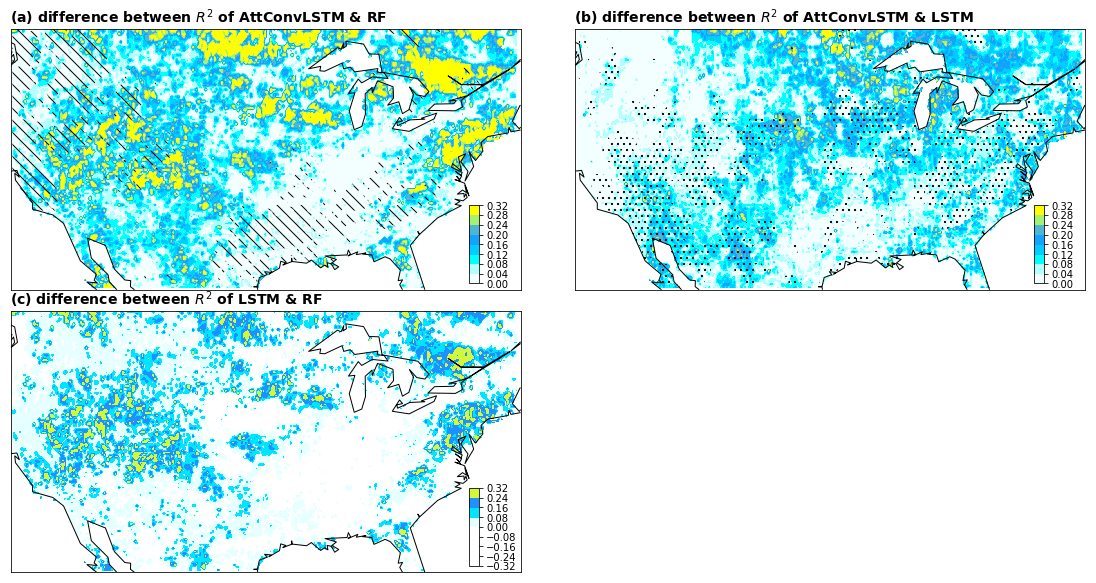

In [23]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.basemap import Basemap
plt.rc('font', family='Times New Roman')

from src.utils import fillna, gen_meshgrid, gen_tac_sac, gen_metric


def figure11():

    # generate DAC
    _, rmse_DAC, r2_DAC = gen_metric(
        '/hard/lilu/1_AttConvLSTM/outputs/figures_DAC/figure5.npz')

    # generate rf
    _, rmse_rf, r2_rf = gen_metric(
        '/hard/lilu/1_AttConvLSTM/outputs/figures_rf/figure5.npz')

    # generate lstm
    _, rmse_lstm, r2_lstm = gen_metric(
        '/hard/lilu/1_AttConvLSTM/outputs/figures_lstm/figure5.npz')

    # generate d()
    a = r2_DAC - r2_rf
    b = r2_DAC - r2_lstm

    print(a > 0)
    print(~np.isnan(a))
    print(sum(sum(a > 0)) / sum(sum(~np.isnan(a))))
    print(sum(sum(b>0))/sum(sum(~np.isnan(b))))


    a[a < 0] = 0
    t1 = str(round(np.nanmean(a[:]), 3))
    a[a > 0.3] = 0.3


    b[b < 0] = 0
    t2 = str(round(np.nanmean(b[:]), 3))
    b[b > 0.3] = 0.3

    # load sac, tac
    tac, sac = gen_tac_sac()

    quartertac, mediumtac, quarter3tac = np.nanpercentile(tac.reshape(-1,), (25,50,75))
    quartertac, mediumsac, quarter3sac = np.nanpercentile(sac.reshape(-1,), (25,50,65))

    high_tac = np.full((tac.shape[0], tac.shape[1]), np.nan)
    high_tac[np.where(tac > quarter3tac)] = 1

    high_sac = np.full((tac.shape[0], tac.shape[1]), np.nan)
    high_sac[np.where(sac > quarter3sac)] = 1
    # plot
    plt.figure(figsize=(20, 10))
    
    # generate colormap
    colors = ('white', 'lightcyan', 'cyan', 
              'deepskyblue', 'dodgerblue', 'lightgreen', 'yellow')
    colors1 = ('white', 'white')
    colors1 = ('red','red')

    clrmap = mcolors.LinearSegmentedColormap.from_list("mycmap", colors)
    whitemap = mcolors.LinearSegmentedColormap.from_list("mycmap", colors1)

    # -----------------------------figure 11(a)---------------------------------
    # subplot
    ax1 = plt.subplot2grid((4, 4), (0, 0), colspan=2, rowspan=2)

    # projection
    m = Basemap(projection='mill', llcrnrlat=27,
                urcrnrlat=50, llcrnrlon=-122.9, urcrnrlon=-70.2,)

    # draw lines
    m.drawcoastlines()
    # m.drawcountries()

    # meshgrid
    lon, lat = gen_meshgrid()
    x, y = m(lon, lat)

    # pcolor
    sc = m.contourf(x, y,
                    a,
                    cmap=clrmap,
                    #color=colors,
                    #levels=levels,
                    vmin=0, vmax=0.3)
    m.contourf(x, y, high_tac, hatches=['\\\\'],cmap=whitemap, alpha=0)
    #m.contourf(x, y, high_sac, hatches=['*'],cmap=whitemap, alpha=0)

    # set edge
    #sc.set_edgecolor('face')

    # text
    x, y = m(-123, 50.5)
    plt.text(x, y, '(a) difference between $R^{2}$ of AttConvLSTM & RF ', fontweight='bold', fontsize=14)
    
    #x, y = m(-122.6, 27.3)
    #plt.text(x, y, '$\overline{\Delta}$ =' + str(t1), fontsize=10, fontweight='bold', c='red')

    #x, y = m(-122.6, 29.0)
    #plt.text(x, y, "\\\ > 75% TAC", fontsize=10, c='red')
    # inset colorbar
    axin1 = ax1.inset_axes([0.899, 0.024, 0.02, 0.3])
    plt.colorbar(sc, cax=axin1,)

    

    # -----------------------------figure 11(b)---------------------------------
    # subplot
    ax2 = plt.subplot2grid((4, 4), (0, 2), rowspan=2, colspan=2)

    # projection
    m = Basemap(projection='mill', llcrnrlat=27,
                urcrnrlat=50, llcrnrlon=-122.9, urcrnrlon=-70.2,)

    # draw lines
    m.drawcoastlines()
    # m.drawcountries()

    # meshgrid
    lon, lat = gen_meshgrid()
    x, y = m(lon, lat)

    # pcolor
    sc = m.contourf(x, y,
                      b,
                      cmap=clrmap, 
                      vmin=0, vmax=0.3)

    # set edge
    #sc.set_edgecolor('face')
    #m.contourf(x, y, high_tac, hatches=['\\\\'],cmap=whitemap, alpha=0)
    m.contourf(x, y, high_sac, hatches=['..'],cmap=whitemap, alpha=0)

    # text
    x, y = m(-123., 50.5)
    plt.text(x, y, '(b) difference between $R^{2}$ of AttConvLSTM & LSTM ',
 fontweight='bold', fontsize=14)

    #x, y = m(-122.6, 27.3)
    #plt.text(x, y, '$\overline{\delta}$ =' + str(t2),fontsize=10, fontweight='bold', c='red')
    #x, y = m(-122.6, 29.0)
    #plt.text(x, y, ".. > 75% SAC",fontsize=10, c='red')
    # inset colorbar
    axin2 = ax2.inset_axes([0.899, 0.024, 0.02, 0.3])
    plt.colorbar(sc, cax=axin2,drawedges=False)

    # -------------------------figure 11(c)-------------------------------------
    # subplot
    ax2 = plt.subplot2grid((4, 4), (2, 0), rowspan=2, colspan=2)

    # projection
    m = Basemap(projection='mill', llcrnrlat=27,
                urcrnrlat=50, llcrnrlon=-122.9, urcrnrlon=-70.2,)

    # draw lines
    m.drawcoastlines()
    # m.drawcountries()

    # meshgrid
    lon, lat = gen_meshgrid()
    x, y = m(lon, lat)

    # pcolor
    sc = m.contourf(x, y,
                      a-b,
                      cmap=clrmap, 
                      vmin=0, vmax=0.3)

    # set edge
    #sc.set_edgecolor('face')
    #m.contourf(x, y, high_tac, hatches=['\\\\'],cmap=whitemap, alpha=0)




    # text
    x, y = m(-123., 50.5)
    plt.text(x, y, '(c) difference between $R^{2}$ of LSTM & RF ',
 fontweight='bold', fontsize=14)

    # inset colorbar
    axin2 = ax2.inset_axes([0.899, 0.024, 0.02, 0.3])
    plt.colorbar(sc, cax=axin2,drawedges=False)

    plt.subplots_adjust(wspace=0.05, hspace=0.18)
    # --------------------------------------------------------------------------
    
    # save
    plt.savefig('figure11.pdf')
    
figure11()


NameError: name 'sc' is not defined

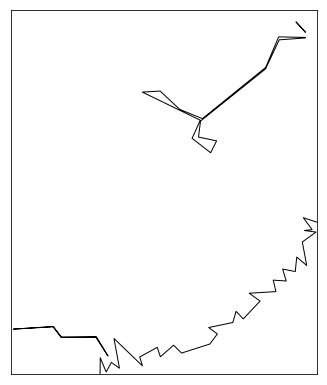

In [4]:
# --------------------------------------------------------------------------
plt.figure(figsize=(12, 6.7))

# draw projection
# m = Basemap(width=5000000, height=3000000,
#             projection='lcc',
#             lat_0=39, lon_0= -96.)  # lambert projection
m = Basemap(projection='mill',
            llcrnrlat=22, urcrnrlat=33,
            llcrnrlon=110, urcrnrlon=120,)  # mill projection

# draw edge lines
m.drawcoastlines()
# m.drawcountries()

# set edge color
sc.set_edgecolor('face')

In [2]:
def cal_kge(y_true, y_pred):
    r = pearsonr(y_true, y_pred)[0]
    beta = np.mean(y_pred)/np.mean(y_true)
    gamma = (np.std(y_pred)/np.mean(y_pred)) / \
        (np.std(y_true)/np.mean(y_true))
    return 1-np.sqrt((r-1)**2+(beta-1)**2+(gamma-1)**2),  beta, gamma

def cal_mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100

def cal_autocorr(x, t=1):
    return np.corrcoef(np.array(x[0:len(x) - t]), np.array(x[t:len(x)]))

def SWDIcount(SM):
    SM_95=np.nanpercentile(SM, 95)
    SM_05 = np.nanpercentile(SM, 5)
    SWDI=(SM-SM_95)/(SM_95-SM_05)*10
    return SWDI

def SWDIlevel(SWDIs):
    SWDILevelList=[]
    for SWDI in SWDIs:
        if SWDI > 0:
            level="No drought"
        if SWDI < 0 and SWDI >-2:
            level="Mild"
        if SWDI < -2 and SWDI >-5:
            level="Moderate"
        if SWDI < -5 and SWDI >-10:
            level="Severe"
        if SWDI < -10 :
            level="Extreme"
        SWDILevelList.append(level)
    return SWDILevelList

# Process multi-sites result

In [3]:
path_output = '/hard/lilu/clstmcases/7DD_threshold-0.5/output/'
path_loss = '/hard/lilu/clstmcases/7DD_threshold-0.5/loss/'
path_info = '/hard/lilu/clstmcases/7DD_threshold-0.5/info/'

l = glob.glob(path_output + '*' + '_out.npy', recursive=True)
N_sites = len(l)

# init
r = np.full((N_sites,3), np.nan)
nse = np.full((N_sites,3), np.nan)
rmse = np.full((N_sites,3), np.nan)
nrmse = np.full((N_sites,3), np.nan)
mape = np.full((N_sites,3), np.nan)
kge = np.full((N_sites,3), np.nan)
bias = np.full((N_sites,3), np.nan)
beta = np.full((N_sites,3), np.nan)
gamma = np.full((N_sites,3), np.nan)
ttest = np.full((N_sites,2), 0)
length = np.full((N_sites,), np.nan)
tac = np.full((N_sites,), np.nan)

site_name_list = []

for i,name_ in enumerate(l):
    
    name = name_.split('/')[-1]
    site_name = name.split('_')[0]
    site_name_list.append(site_name)
    
    output = np.load(name_)
    length[i] = output.shape[0]
    
    # cal metrics
    r[i,0] = pearsonr(output[:,-1], output[:,0])[0]
    r[i,1] = pearsonr(output[:,-1], output[:,1])[0]
    r[i, 2] = pearsonr(output[:, -1], output[:, 2])[0]
    
    kge[i,0],beta[i,0], gamma[i,0]  = cal_kge(output[:,-1], output[:,0])
    kge[i,1],beta[i,1], gamma[i,1] = cal_kge(output[:,-1], output[:,1])
    kge[i, 2],beta[i,2], gamma[i,2] = cal_kge(output[:, -1], output[:, 2])    
    
    nse[i,0] = r2_score(output[:,-1], output[:,0])
    nse[i,1] = r2_score(output[:,-1], output[:,1])
    nse[i, 2] = r2_score(output[:, -1], output[:, 2])
    
    rmse[i,0] = np.sqrt(mean_squared_error(output[:,-1], output[:,0]))
    rmse[i,1] = np.sqrt(mean_squared_error(output[:,-1], output[:,1]))
    rmse[i, 2] = np.sqrt(mean_squared_error(output[:, -1], output[:, 2]))

    
    nrmse[i,0] = np.sqrt(mean_squared_error(output[:,-1], output[:,0]))/np.nanmean(output[:,-1])
    nrmse[i,1] = np.sqrt(mean_squared_error(output[:,-1], output[:,1]))/np.nanmean(output[:,-1])
    nrmse[i, 2] = np.sqrt(mean_squared_error(output[:, -1], output[:, 2]))/np.nanmean(output[:,-1])
    
    mape[i,0] = cal_mape(output[:,-1], output[:,0])
    mape[i,1] = cal_mape(output[:,-1], output[:,1])  
    mape[i, 2] = cal_mape(output[:, -1], output[:, 2])
    
    bias[i,0] = np.mean(output[:, -1])-np.mean(output[:, 0])
    bias[i,1] = np.mean(output[:, -1])-np.mean(output[:, 1])
    bias[i, 2] = np.mean(output[:, -1])-np.mean(output[:, 2])

    tac[i] = cal_autocorr(output[:, -1], t=7)[0, 1]

    t, p = stats.ttest_ind(np.abs(output[:,2]-output[:,-1]), np.abs(output[:,-1]-output[:,1]),alternative='less')
    if p<0.05:
        ttest[i,0] = 1
    
    t, p = stats.ttest_ind(np.abs(output[:,2]-output[:,-1]), np.abs(output[:,-1]-output[:,1]),alternative='greater')
    if p<0.05:
        ttest[i,1] = 1

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


In [4]:
# init
history = np.full((N_sites, 50, 4), np.nan)

# process
for i, site_name in enumerate(site_name_list):
    output = np.load(path_loss + site_name + '_loss.npy')
    history[i, :, 0] = output[0:50]
    history[i,:,1] = output[50:100]
    history[i,:,2] = output[100:150]
    history[i,:,3] = output[150:200]

In [5]:
df = pd.read_csv('/hard/lilu/site_summary.csv')
lat = df['latitude'].values
lon = df['longitude'].values

In [6]:
df['site_name'].values

array(['DE-Geb', 'NL-Hor', 'CH-Cha', 'AU-Tum', 'US-MMS', 'DE-Obe',
       'CN-Cng', 'CH-Dav', 'AU-Fog', 'AU-ASM', 'DE-Gri', 'US-Ton',
       'CA-Qfo', 'US-GLE', 'BE-Vie', 'IT-Ro2', 'CH-Fru', 'AT-Neu',
       'FI-Hyy', 'IT-Col', 'IT-MBo', 'AU-Rig', 'BR-Sa3', 'IT-CA2',
       'US-Whs', 'AU-Stp', 'AU-Wac', 'IT-SRo', 'FI-Sod', 'AU-Gin',
       'US-NR1', 'DE-Lkb', 'FR-Gri', 'FR-LBr', 'DE-Tha', 'AU-DaP',
       'CA-SF1', 'US-WCr', 'AU-DaS', 'IT-Lav', 'DE-Hai', 'ZA-Kru',
       'US-SRM', 'US-Var', 'CA-SF3', 'NL-Loo', 'IT-CA1', 'US-Wkg',
       'US-Blo', 'IT-Cpz', 'US-Me2', 'US-AR2', 'SD-Dem', 'DE-Kli',
       'IT-Tor', 'AU-How', 'US-SRG', 'BE-Lon', 'US-Syv', 'US-AR1',
       'IT-Noe', 'DE-Seh', 'AU-Dry', 'AU-Cpr'], dtype=object)

# Table 1: predictability

In [7]:
#x = [8.15, 4.74, -110.05, 5.74, 131.15, 31.5, 131.31, -106.19,
#     11.04, 8.36, -120.63, 26.63, -106.19, -89.35, -84.71, -52.92]
#y = [40.6, 50.55, 31.74, 52.17, -12.49, -25.02, -14.06, 53.62,
#     46.01, 47.47, 38.9, 67.36, -35.66, 46.24, 45.56, 5.27]
#Duration = ['2011-2014','2005-2012','2008-2014','2002-2012',
#            '2000-2013','2001-2010','2008-2012','1997-2009',
#            '2005-2012','2005-2014','2000-2015','2001-2014',
#            '2002-2012','2002-2008','2002-2013','2004-2010']

output_dict = {
    'SITE_NAME': site_name_list, 
    'BIAS_LSTM': bias[:,1],
    'BIAS_CLSTM': bias[:,2],
    'KGE_LSTM': kge[:,1],
    'KGE_CLSTM': kge[:,2],
    'R_LSTM': r[:,1],
    'R_CLSTM': r[:,2],
    'BETA_LSTM': beta[:,1],
    'BETA_CLSTM': beta[:,2],
    'GAMMA_LSTM': gamma[:,1],
    'GAMMA_CLSTM': gamma[:,2],
    'R2_LSTM': nse[:,1],
    'R2_CLSTM': nse[:,2],
    'RMSE_LSTM': rmse[:,1],
    'RMSE_CLSTM': rmse[:,2],
    'MAPE_LSTM': mape[:,1],
    'MAPE_CLSTM': mape[:,2]
}

import pandas as pd
pd.set_option('precision', 2)

df_7DD = pd.DataFrame(data=output_dict)
df_7DD.to_csv('output_summary_7DD.csv')
df_7DD

SITE_NAME  BIAS_LSTM  BIAS_CLSTM  KGE_LSTM  KGE_CLSTM  R_LSTM  R_CLSTM  \
0     DE-Geb      -1.98       -1.37      0.59       0.78    0.61     0.80   
1     NL-Hor      -1.90       -1.22      0.80       0.85    0.94     0.94   
2     CH-Cha       1.74        1.35      0.68       0.71    0.69     0.71   
3     AU-Tum       2.74        1.46      0.60       0.76    0.71     0.79   
4     US-MMS      -1.00       -0.77      0.77       0.87    0.81     0.87   
..       ...        ...         ...       ...        ...     ...      ...   
59    US-AR1       0.45       -0.50      0.41       0.52    0.44     0.60   
60    IT-Noe       1.62        0.59      0.62       0.82    0.71     0.86   
61    DE-Seh      -5.74       -3.89      0.11       0.27    0.58     0.67   
62    AU-Dry       0.85        0.68      0.58       0.80    0.65     0.83   
63    AU-Cpr       0.38        0.11      0.37       0.36    0.49     0.58   

    BETA_LSTM  BETA_CLSTM  GAMMA_LSTM  GAMMA_CLSTM  R2_LSTM  R2_CLSTM  \
0        1.10        1.07        0.93         0.95    -0.30      0.35   
1        1.02        1.02        0.82         0.86     0.86      0.88   
2        0.97        0.98        1.08         0.95     0.20      0.37   
3        0.91        0.95        0.74         0.90     0.22      0.54   
4        1.03        1.02        0.87         0.97     0.63      0.74   
..        ...         ...         ...          ...      ...       ...   
59       0.98        1.03        0.82         0.73     0.05      0.32   
60       0.94        0.98        0.77         0.90     0.46      0.73   
61       1.25        1.17        0.25         0.37    -0.50      0.04   
62       0.89        0.91        0.81         1.04     0.39      0.66   
63       0.90        0.97        0.63         0.52     0.14      0.33   

    RMSE_LSTM  RMSE_CLSTM  MAPE_LSTM  MAPE_CLSTM  
0        3.20        2.26      14.25        9.91  
1        6.84        6.35       6.46        5.70  
2        4.00        3.54       5.28        4.98  
3        4.57        3.50      11.78        8.60  
4        4.49        3.79      11.74        9.49  
..        ...         ...        ...         ...  
59       3.60        3.03      15.78       12.70  
60       5.78        4.09      13.23        8.94  
61       8.02        6.42      39.47       31.31  
62       4.21        3.16      32.10       39.03  
63       1.11        0.98      11.84       10.81  

[64 rows x 17 columns]

In [8]:
df_describe_7DD = df_7DD.describe()

a = df_describe_7DD['MAPE_LSTM'].values
a[np.isinf(a)] = np.nan

df_describe_7DD['MAPE_LSTM']['std'] = np.nanstd(a)
df_describe_7DD['MAPE_LSTM']['mean'] = np.nanmean(a)
df_describe_7DD['MAPE_LSTM']['max'] = np.nanmax(a)

a = df_describe_7DD['MAPE_CLSTM'].values
a[np.isinf(a)] = np.nan

df_describe_7DD['MAPE_CLSTM']['std'] = np.nanstd(a)
df_describe_7DD['MAPE_CLSTM']['mean'] = np.nanmean(a)
df_describe_7DD['MAPE_CLSTM']['max'] = np.nanmax(a)

df_describe_7DD

BIAS_LSTM  BIAS_CLSTM  KGE_LSTM  KGE_CLSTM  R_LSTM  R_CLSTM  BETA_LSTM  \
count      64.00       64.00     64.00      64.00   64.00    64.00      64.00   
mean       -0.07       -0.08      0.56       0.67    0.66     0.76       1.00   
std         1.84        1.22      0.23       0.19    0.21     0.14       0.08   
min        -6.55       -3.89     -0.21      -0.03    0.09     0.27       0.78   
25%        -0.75       -0.51      0.44       0.59    0.59     0.69       0.97   
50%         0.21       -0.07      0.59       0.70    0.69     0.79       0.99   
75%         0.85        0.56      0.74       0.80    0.81     0.87       1.06   
max         5.84        4.40      0.89       0.96    0.95     0.96       1.25   

       BETA_CLSTM  GAMMA_LSTM  GAMMA_CLSTM  R2_LSTM  R2_CLSTM  RMSE_LSTM  \
count       64.00       64.00        64.00    64.00     64.00      64.00   
mean         1.00        0.81         0.83     0.32      0.53       4.46   
std          0.05        0.21         0.18     0.37      0.23       2.49   
min          0.84        0.16         0.27    -0.50     -0.04       0.67   
25%          0.97        0.70         0.76     0.14      0.37       2.95   
50%          1.01        0.80         0.85     0.34      0.52       3.98   
75%          1.02        0.92         0.94     0.60      0.73       5.60   
max          1.17        1.44         1.18     0.87      0.93      15.69   

       RMSE_CLSTM  MAPE_LSTM  MAPE_CLSTM  
count       64.00      64.00       64.00  
mean         3.80      23.14       21.71  
std          2.39      21.62       22.15  
min          0.61       1.62        1.46  
25%          2.31      11.43        8.51  
50%          3.47      15.11       12.77  
75%          4.52      25.07       21.34  
max         16.31      64.00       64.00

# Figure 1. Fluxnet spatial distribution 

In [9]:
np.sum(length*5)/(64*365)

7.673373287671233

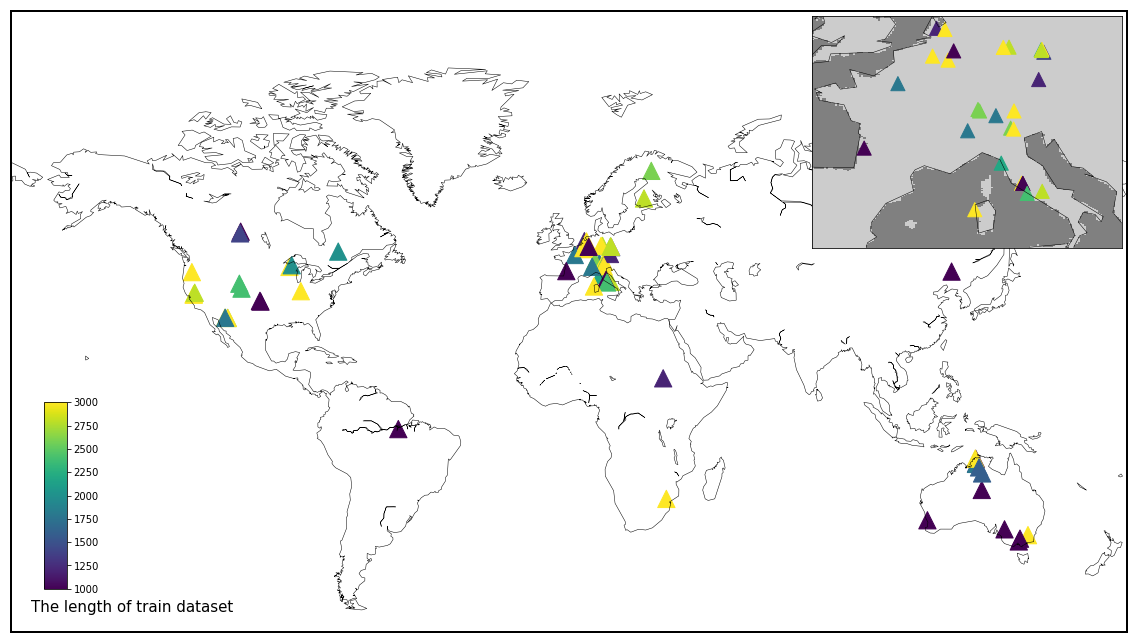

In [10]:
plt.figure(figsize=(20,20))

#
ax = plt.subplot(111)

ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)

#--------------------------------------------------------------
m = Basemap(projection='mill',
            llcrnrlat=-60, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180,
            ax=ax)  # mill projection
m.drawcoastlines(linewidth=0.5)
x, y = m(lon,lat)
sc = m.scatter(x,y, c=length*4, marker='^',s=300, vmin=1000, vmax=3000)

#----------------------------------------------------------------
axins = zoomed_inset_axes(ax, 4, loc=1)

axins.set_xlim(-5,20)
axins.set_ylim(38,53)

submap = Basemap(projection='mill',
                 llcrnrlat=38, urcrnrlat=53,
                 llcrnrlon=-5, urcrnrlon=20,
                 ax=axins)  # mill projection

x,y = submap(lon,lat)
submap.drawcoastlines(linewidth=0.5)
sc1 = submap.scatter(x,y, c=length*4, marker='^',s=200,vmin=1000, vmax=3000)
submap.drawlsmask(ocean_color='grey')

#---------------------------------------------------------------
axin2 = ax.inset_axes([0.03, 0.07, 0.02, 0.3])

# colorbar
cbar = plt.colorbar(sc1, cax=axin2,)

# text colorbar
axin2.text(-160, 750, 'The length of train dataset',
           color='black', fontsize=15)

plt.savefig('figure1.pdf')

# Figure 4: Boxplot of LSTM and Causal LSTM (4 metrics) for 7-day

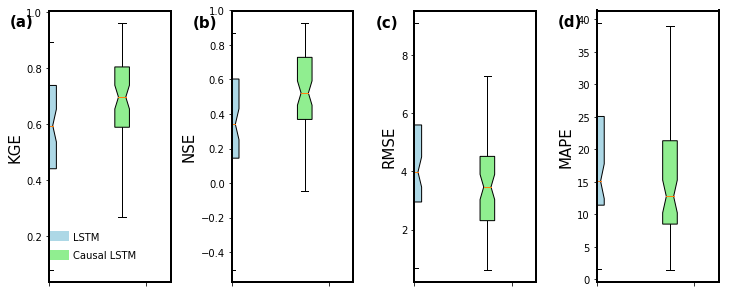

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,5))

#------------------------------------------------------------------------------------------------
ax1 = plt.subplot(1,4,1)

ax1.boxplot(df_7DD['KGE_LSTM'].values, 
                    notch=True,
                    patch_artist=True, 
                    showfliers=False,
                    positions=[0],
                    boxprops=dict(facecolor='lightblue', color='black'))

ax1.boxplot(df_7DD['KGE_CLSTM'].values, 
            boxprops=dict(facecolor='lightgreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.75])
ax1.set_ylabel('KGE', fontsize=15)
ax1.text(-0.4,0.95,'(a)',fontsize=15, fontweight='bold')

#------------------------------------------------------------------------------------------------
ax2 = plt.subplot(1, 4, 2)

ax2.boxplot(df_7DD['R2_LSTM'].values, 
            boxprops=dict(facecolor='lightblue', color='black'),
            notch=True, 
            patch_artist=True,  
            showfliers=False,
            positions=[0])
ax2.boxplot(df_7DD['R2_CLSTM'].values,
            boxprops=dict(facecolor='lightgreen', color='black'),
            notch=True, 
            patch_artist=True, 
            showfliers=False,
            positions=[0.75])
ax2.set_ylabel('NSE', fontsize=15)
ax2.text(-0.4,0.905,'(b)',fontsize=15, fontweight='bold')

#------------------------------------------------------------------------------------------------
ax3 = plt.subplot(1, 4, 3)

ax3.boxplot(df_7DD['RMSE_LSTM'].values, 
            boxprops=dict(facecolor='lightblue', color='black'),
            notch=True, 
            patch_artist=True,  
            showfliers=False,
            positions=[0])
ax3.boxplot(df_7DD['RMSE_CLSTM'].values,
            boxprops=dict(facecolor='lightgreen', color='black'),
            notch=True, 
            patch_artist=True,  
            showfliers=False, 
            positions=[0.75])
ax3.set_ylabel('RMSE', fontsize=15)
ax3.text(-0.4,8.95,'(c)',fontsize=15, fontweight='bold')

#------------------------------------------------------------------------------------------------
ax4 = plt.subplot(1, 4, 4)

ax4.boxplot(df_7DD['MAPE_LSTM'].values,
            boxprops=dict(facecolor='lightblue', color='black'), 
            notch=True,
            patch_artist=True,  
            showfliers=False,
            positions=[0])
ax4.boxplot(df_7DD['MAPE_CLSTM'].values, 
            boxprops=dict(facecolor='lightgreen', color='black'),
            notch=True, 
            patch_artist=True,  
            showfliers=False,
            positions=[0.75])
ax4.set_ylabel('MAPE', fontsize=15)
ax4.text(-0.4,39,'(d)',fontsize=15, fontweight='bold')

#------------------------------------------------------------------------------------------------
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xticks([0,1])
    ax.set_xticklabels(['',''])

    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    

ax1.plot([-0.2,0.15], [0.2,0.2], color='lightblue', linewidth=10)
ax1.plot([-0.2, 0.15], [0.13, 0.13], color='lightgreen', linewidth=10)
ax1.text(0.25, 0.185, 'LSTM')
ax1.text(0.25, 0.12, 'Causal LSTM')

plt.subplots_adjust(wspace=0.5, hspace=0.05)

plt.savefig('figure4.pdf')

# figure 5: relatively improvement

In [20]:
relative_improve_nse = np.full((N_sites,), np.nan)
relative_improve_mape = np.full((N_sites,), np.nan)
relative_improve_kge = np.full((N_sites,), np.nan)
relative_improve_rmse = np.full((N_sites,), np.nan)

for i in range(N_sites):
    if kge[i,1] < 0 and kge[i,2] > 0:
        relative_improve_kge[i] = 100*(kge[i,2]-kge[i,1])/np.abs(kge[i,1])
    else:
        relative_improve_kge[i] = 100*(kge[i,2]-kge[i,1])/kge[i,1]

for i in range(N_sites):
    if nse[i,1] < 0 and nse[i,2] > 0:
        relative_improve_nse[i] = 100*(nse[i,2]-nse[i,1])
    else:
        relative_improve_nse[i] = 100*(nse[i,2]-nse[i,1])

relative_improve_mape = 100*(mape[:,1]-mape[:,2])/mape[:,2]
relative_improve_rmse = 100*(rmse[:,1]-rmse[:,2])/rmse[:,2]

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in subtract


In [13]:
relative_improve_nse

array([ 2.17413219e+02,  2.27357832e+00,  9.03153777e+01,  1.45108218e+02,
        1.65019122e+01,  6.80577444e+01, -1.45906305e+01,  2.05778491e+02,
        1.16006363e+01,  1.95904434e+02,  5.45361150e+01, -5.93217331e+00,
        1.45773499e+02,  1.50022670e+01,  1.53058658e+01,  2.57002079e+01,
        9.97961361e+01,  1.86453674e+02,  4.12691955e+01,  3.35897257e+01,
        4.34682497e+02, -2.62398565e+00, -1.98237334e+02,  2.06665151e+02,
        1.24497287e+02, -4.14081548e-01,  2.71779334e+02,  2.85756122e+01,
        2.03522898e+02,  3.61464076e+01,  1.46504926e+01,  1.04453543e+03,
        5.30209749e+01,  3.78060318e+00,  9.31197859e+01,  6.29133055e+01,
        7.39189458e+00,  3.06600759e+01,  1.75125405e+01,  7.51199424e+01,
        2.02164595e+00,  2.32189524e+01,  3.15263554e+01,  4.37962434e+00,
        7.24172592e+00,  5.95137359e+01,  1.50301315e+02,  1.27913668e+01,
        3.51659406e+00,  1.45285688e+01,  6.80820697e+00,  1.41944411e+02,
        6.82263416e+01,  

In [14]:
print(len(np.where((relative_improve_mape>10) & (relative_improve_rmse>10)& (relative_improve_nse>10)& (relative_improve_kge>10))[0]))
print(len(np.where((relative_improve_mape<0) & (relative_improve_rmse<0)& (relative_improve_nse<0)& (relative_improve_kge<0))[0]))

28
2


[ 0  3  4  5  7 10 13 14 15 16 17 18 19 20 23 24 26 27 28 30 31 32 34 37
 39 42 43 44 45 46 47 48 49 50 51 52 53 54 57 58 59 60 61 62]


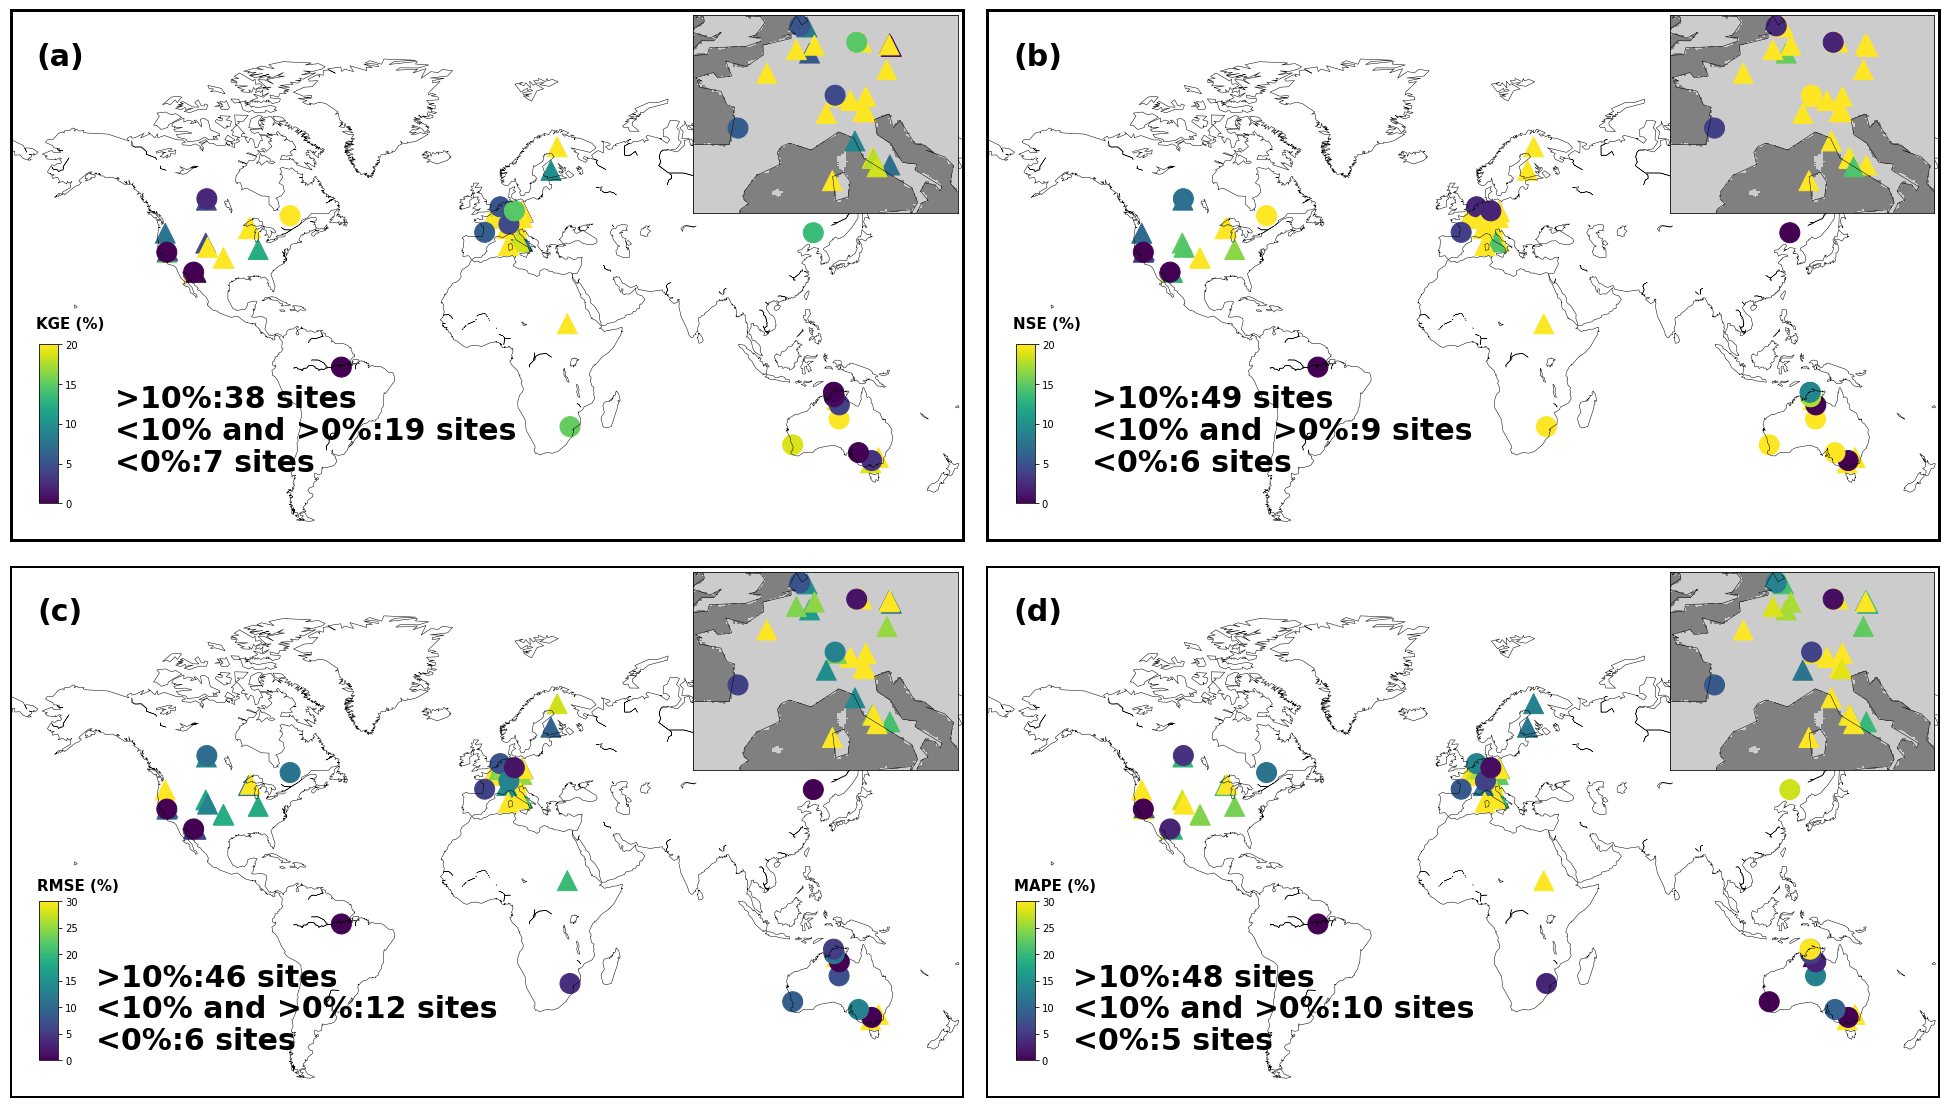

In [15]:
plt.figure(figsize=(35,20))

idx_sign = np.where(ttest[:,0]==1)[0]
idx_nosign = np.where(ttest[:,0]==0)[0]
print(idx_sign)
#-----------------------------------------------------------------------------------
ax1 = plt.subplot2grid((2, 2), (0, 0))

ax1.spines['left'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['top'].set_linewidth(3)

m = Basemap(projection='mill',
            llcrnrlat=-60, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180,
            ax=ax1)  # mill projection
m.drawcoastlines(linewidth=0.5)
x, y = m(lon[idx_sign],lat[idx_sign])
sc = m.scatter(x,y, c=relative_improve_kge[idx_sign],  vmin=0, vmax=20, marker='^', s=400)
x, y = m(lon[idx_nosign],lat[idx_nosign])
sc = m.scatter(x,y, c=relative_improve_kge[idx_nosign],  vmin=0, vmax=20, marker='o', s=400)

axins = zoomed_inset_axes(ax1, 4, loc=1)

axins.set_xlim(-5,20)
axins.set_ylim(38,53)

submap = Basemap(projection='mill',
                 llcrnrlat=38, urcrnrlat=53,
                 llcrnrlon=-5, urcrnrlon=20,
                 ax=axins)  # mill projection

x,y = submap(lon,lat)
submap.drawcoastlines(linewidth=0.5)
x, y = submap(lon[idx_sign],lat[idx_sign])
sc = submap.scatter(x,y, c=relative_improve_kge[idx_sign],  vmin=0, vmax=20, marker='^', s=400)
x, y = submap(lon[idx_nosign],lat[idx_nosign])
sc = submap.scatter(x,y, c=relative_improve_kge[idx_nosign],  vmin=0, vmax=20, marker='o', s=400)
submap.drawlsmask(ocean_color='grey')

axin2 = ax1.inset_axes([0.03, 0.07, 0.02, 0.3])

# colorbar
cbar = plt.colorbar(sc, cax=axin2,)

# text colorbar
axin2.text(-3, 22, 'KGE (%)',color='black', fontsize=15, fontweight='bold')
axin2.text(-3, 55, '(a)',color='black', fontsize=30, fontweight='bold')
axin2.text(80, 12, '>10%:'+str(len(np.where(relative_improve_kge>10)[0]))+' sites', fontsize=30, fontweight='bold')
axin2.text(80, 8, '<10% and >0%:'+str(len(np.where((relative_improve_kge<10) & (relative_improve_kge>0))[0]))+' sites', fontsize=30, fontweight='bold')
axin2.text(80, 4, '<0%:'+str(len(np.where(relative_improve_kge<0)[0]))+' sites', fontsize=30, fontweight='bold')

#-----------------------------------------------------------------------------------
ax1 = plt.subplot2grid((2, 2), (0, 1))

ax1.spines['left'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.spines['top'].set_linewidth(3)

m = Basemap(projection='mill',
            llcrnrlat=-60, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180,
            ax=ax1)  # mill projection
m.drawcoastlines(linewidth=0.5)
x, y = m(lon[idx_sign],lat[idx_sign])
sc = m.scatter(x,y, c=relative_improve_nse[idx_sign],  vmin=0, vmax=20, marker='^', s=400)
x, y = m(lon[idx_nosign],lat[idx_nosign])
sc = m.scatter(x,y, c=relative_improve_nse[idx_nosign],  vmin=0, vmax=20, marker='o', s=400)

axins = zoomed_inset_axes(ax1, 4, loc=1)

axins.set_xlim(-5,20)
axins.set_ylim(38,53)

submap = Basemap(projection='mill',
                 llcrnrlat=38, urcrnrlat=53,
                 llcrnrlon=-5, urcrnrlon=20,
                 ax=axins)  # mill projection

submap.drawcoastlines(linewidth=0.5)
x, y = submap(lon[idx_sign],lat[idx_sign])
sc = submap.scatter(x,y, c=relative_improve_nse[idx_sign],  vmin=0, vmax=20, marker='^', s=400)
x, y = submap(lon[idx_nosign],lat[idx_nosign])
sc = submap.scatter(x,y, c=relative_improve_nse[idx_nosign],  vmin=0, vmax=20, marker='o', s=400)
submap.drawlsmask(ocean_color='grey')

axin2 = ax1.inset_axes([0.03, 0.07, 0.02, 0.3])

# colorbar
cbar = plt.colorbar(sc, cax=axin2,)

# text colorbar
axin2.text(-3, 22, 'NSE (%)',color='black', fontsize=15, fontweight='bold')
axin2.text(-3, 55, '(b)',color='black', fontsize=30, fontweight='bold')
axin2.text(80, 12, '>10%:'+str(len(np.where(relative_improve_nse>10)[0]))+' sites', fontsize=30, fontweight='bold')
axin2.text(80, 8, '<10% and >0%:'+str(len(np.where((relative_improve_nse<10) & (relative_improve_nse>0))[0]))+' sites', fontsize=30, fontweight='bold')
axin2.text(80, 4, '<0%:'+str(len(np.where(relative_improve_nse<0)[0]))+' sites', fontsize=30, fontweight='bold')

#-------------------------------------------------------------------------------------------
ax1 = plt.subplot2grid((2, 2), (1,0))

ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax1.spines['top'].set_linewidth(2)

m = Basemap(projection='mill',
            llcrnrlat=-60, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180,
            ax=ax1)  # mill projection
m.drawcoastlines(linewidth=0.5)
x, y = m(lon[idx_sign],lat[idx_sign])
sc = m.scatter(x,y, c=relative_improve_rmse[idx_sign],  vmin=0, vmax=30, marker='^', s=400)
x, y = m(lon[idx_nosign],lat[idx_nosign])
sc = m.scatter(x,y, c=relative_improve_rmse[idx_nosign],  vmin=0, vmax=30, marker='o', s=400)

axins = zoomed_inset_axes(ax1, 4, loc=1)

axins.set_xlim(-5,20)
axins.set_ylim(38,53)

submap = Basemap(projection='mill',
                 llcrnrlat=38, urcrnrlat=53,
                 llcrnrlon=-5, urcrnrlon=20,
                 ax=axins)  # mill projection

x,y = submap(lon,lat)
submap.drawcoastlines(linewidth=0.5)
x, y = submap(lon[idx_sign],lat[idx_sign])
sc = submap.scatter(x,y, c=relative_improve_rmse[idx_sign],  vmin=0, vmax=30, marker='^', s=400)
x, y = submap(lon[idx_nosign],lat[idx_nosign])
sc = submap.scatter(x,y, c=relative_improve_rmse[idx_nosign],  vmin=0, vmax=30, marker='o', s=400)
submap.drawlsmask(ocean_color='grey')

axin2 = ax1.inset_axes([0.03, 0.07, 0.02, 0.3])

# colorbar
cbar = plt.colorbar(sc, cax=axin2,)

# text colorbar
axin2.text(-3, 32, 'RMSE (%)',color='black', fontsize=15, fontweight='bold')
axin2.text(-3, 83, '(c)',color='black', fontsize=30, fontweight='bold')
axin2.text(90, 14, '>10%:'+str(len(np.where(relative_improve_rmse>10)[0]))+' sites', fontsize=30, fontweight='bold')
axin2.text(90, 8, '<10% and >0%:'+str(len(np.where((relative_improve_rmse<10) & (relative_improve_rmse>0))[0]))+' sites', fontsize=30, fontweight='bold')
axin2.text(90, 2, '<0%:'+str(len(np.where(relative_improve_rmse<0)[0]))+' sites', fontsize=30, fontweight='bold')

#------------------------------------------------------------------------------------------
ax1 = plt.subplot2grid((2, 2), (1, 1))

ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax1.spines['top'].set_linewidth(2)

m = Basemap(projection='mill',
            llcrnrlat=-60, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180,
            ax=ax1)  # mill projection
m.drawcoastlines(linewidth=0.5)
x, y = m(lon,lat)
x, y = m(lon[idx_sign],lat[idx_sign])
sc = m.scatter(x,y, c=relative_improve_mape[idx_sign],  vmin=0, vmax=30, marker='^', s=400)
x, y = m(lon[idx_nosign],lat[idx_nosign])
sc = m.scatter(x,y, c=relative_improve_mape[idx_nosign],  vmin=0, vmax=30, marker='o', s=400)
axins = zoomed_inset_axes(ax1, 4, loc=1)

axins.set_xlim(-5,20)
axins.set_ylim(38,53)

submap = Basemap(projection='mill',
                 llcrnrlat=38, urcrnrlat=53,
                 llcrnrlon=-5, urcrnrlon=20,
                 ax=axins)  # mill projection

x,y = submap(lon,lat)
submap.drawcoastlines(linewidth=0.5)
x, y = submap(lon[idx_sign],lat[idx_sign])
sc = submap.scatter(x,y, c=relative_improve_mape[idx_sign],  vmin=0, vmax=30, marker='^', s=400)
x, y = submap(lon[idx_nosign],lat[idx_nosign])
sc = submap.scatter(x,y, c=relative_improve_mape[idx_nosign],  vmin=0, vmax=30, marker='o', s=400)
submap.drawlsmask(ocean_color='grey')

axin2 = ax1.inset_axes([0.03, 0.07, 0.02, 0.3])

# colorbar
cbar = plt.colorbar(sc, cax=axin2,)

# text colorbar
axin2.text(-3, 32, 'MAPE (%)',color='black', fontsize=15, fontweight='bold')
axin2.text(-3, 83, '(d)',color='black', fontsize=30, fontweight='bold')
axin2.text(90, 14, '>10%:'+str(len(np.where(relative_improve_mape>10)[0]))+' sites', fontsize=30, fontweight='bold')
axin2.text(90, 8, '<10% and >0%:'+str(len(np.where((relative_improve_mape<10) & (relative_improve_mape>0))[0]))+' sites', fontsize=30, fontweight='bold')
axin2.text(90, 2, '<0%:'+str(len(np.where(relative_improve_mape<0)[0]))+' sites', fontsize=30, fontweight='bold')

# -----------------------------------------------------------------------------------
plt.subplots_adjust(wspace=0.0, hspace=0.05)

plt.savefig('figure5.pdf')

Text(0, 0.5, 'improvement of NSE')

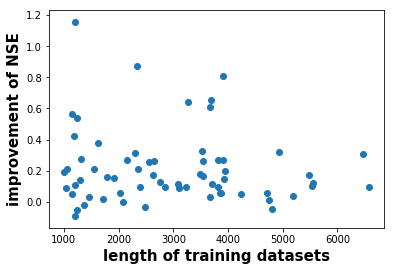

In [44]:
plt.figure()

plt.scatter(x = a, y = relative_improve_nse/100)
plt.xlabel('length of training datasets', fontweight='bold', fontsize=15)
plt.ylabel('improvement of NSE', fontweight='bold', fontsize=15)

In [43]:
a = [5*i+np.random.randint(0,300) for i in length]

# Figure 6: generability

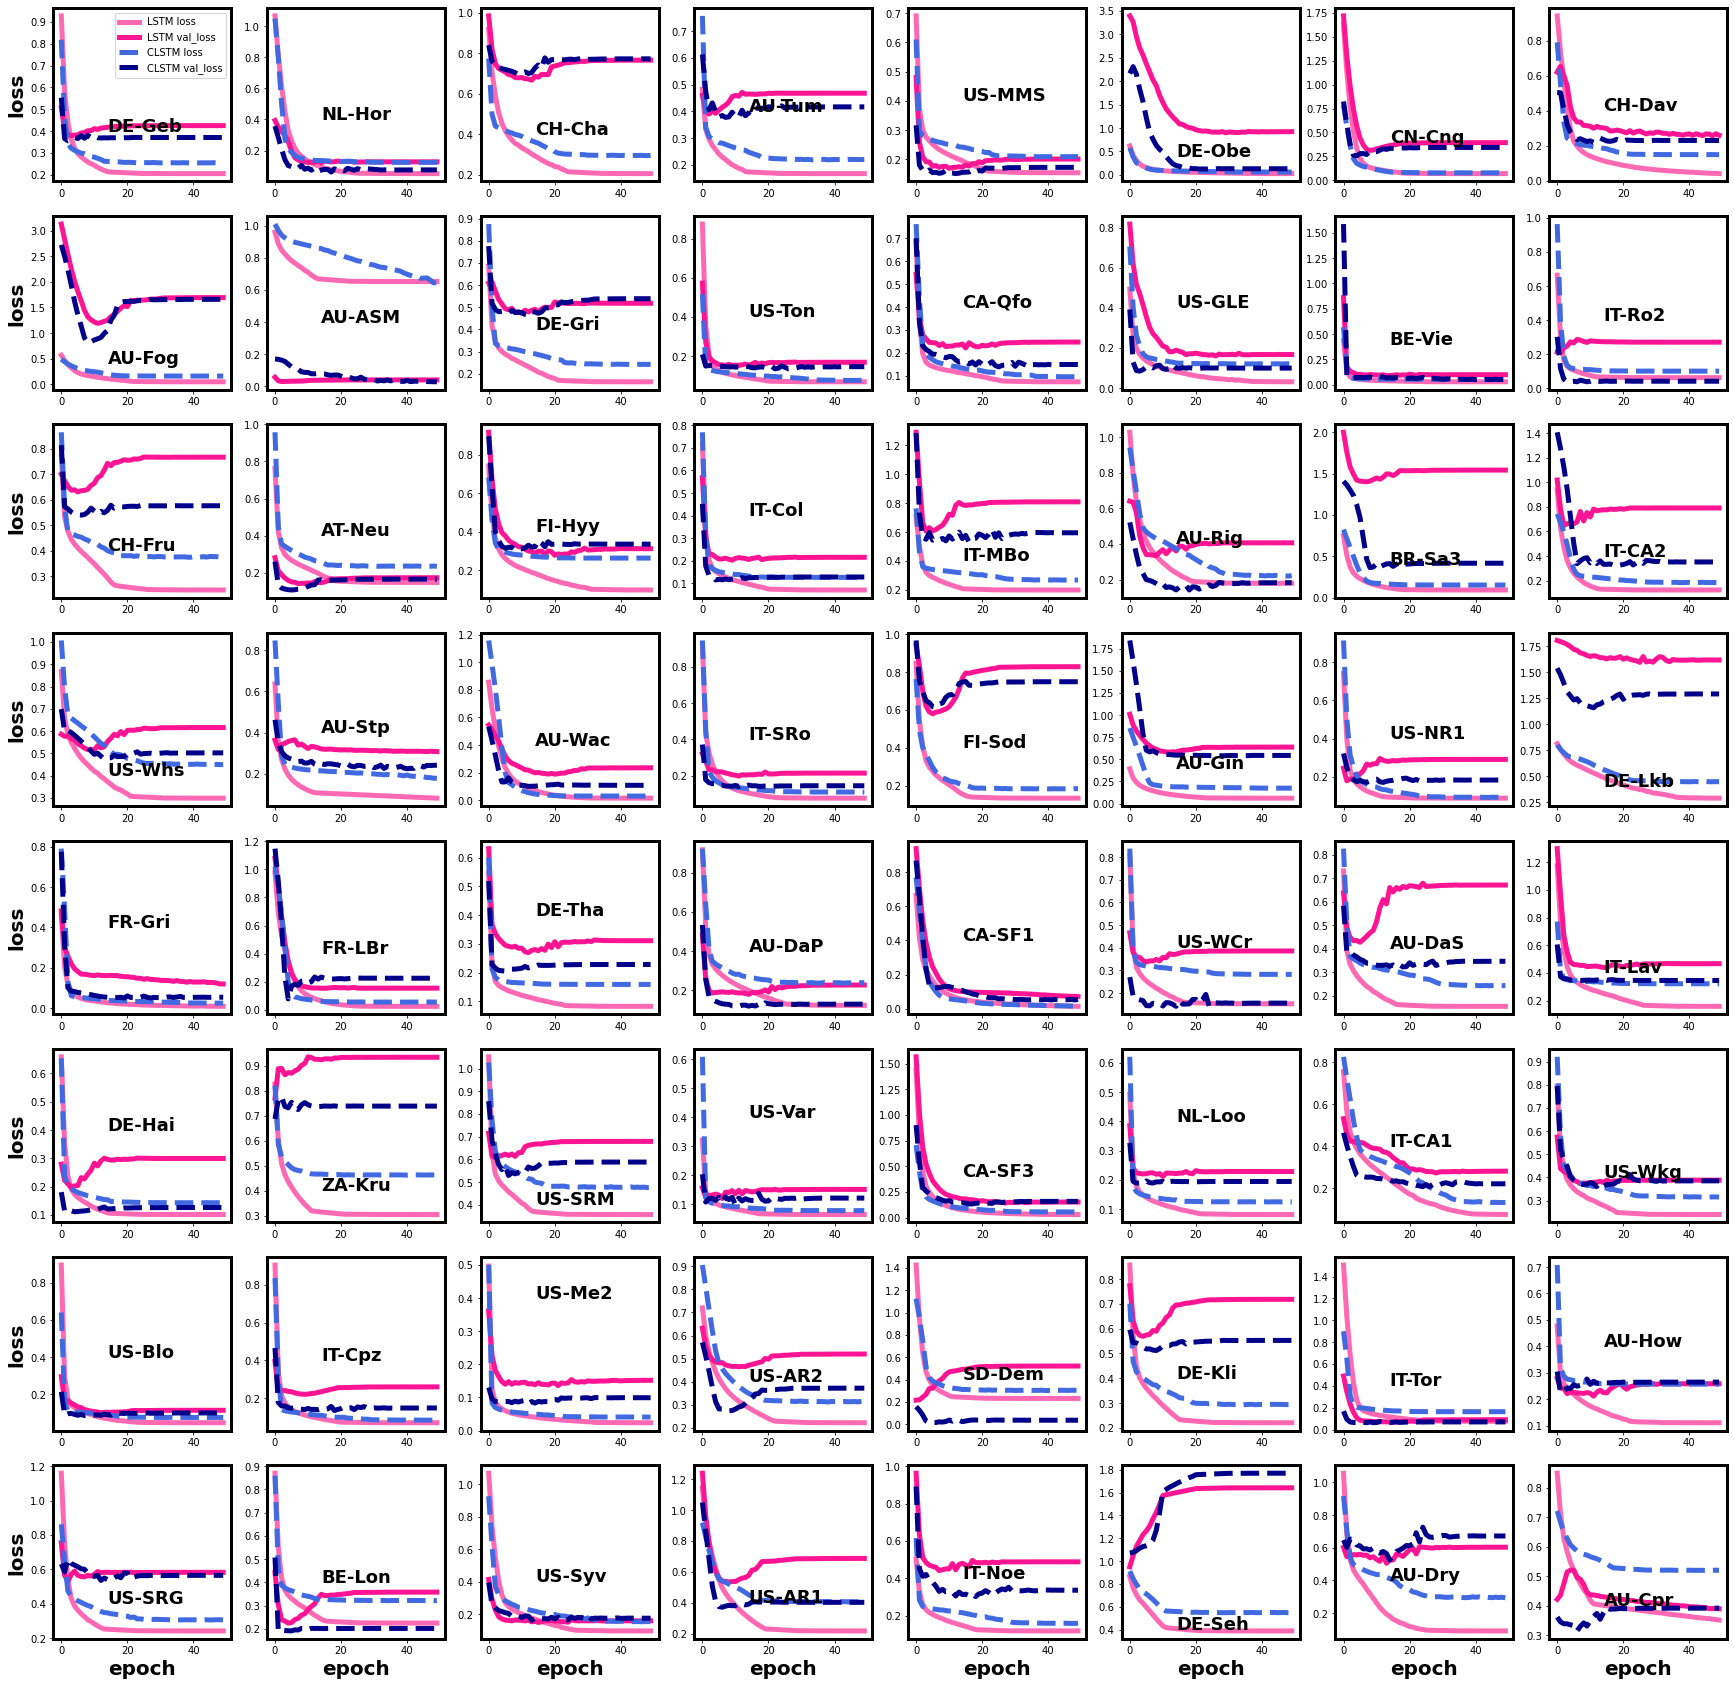

In [37]:
plt.figure(figsize=(30,30))

for i in range(len(site_name_list)):
    ax = plt.subplot(8, 8, i+1)
    
    ax.spines['top'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)

    lstm_loss = history[i,:,0]
    lstm_val_loss = history[i, :, 1]
    clstm_loss = history[i, :, 2]
    clstm_val_loss = history[i, :, 3]

    plt.plot(lstm_loss, linewidth=5, color='hotpink', linestyle='-')
    plt.plot(lstm_val_loss, linewidth=5, color='deeppink', linestyle='-')
    plt.plot(clstm_loss, linewidth=5, color='royalblue', linestyle='--')
    plt.plot(clstm_val_loss, linewidth=5, color='darkblue', linestyle='--')

    if i in np.arange(56,64):
        plt.xlabel('epoch', fontsize=20, fontweight='bold')
        
    if i in np.arange(0,64,8):
        plt.ylabel('loss', fontsize=20, fontweight='bold')
        
    if i==0:
        plt.legend(['LSTM loss','LSTM val_loss','CLSTM loss','CLSTM val_loss'])
        
    plt.text(14, 0.4, site_name_list[i], fontsize=18, fontweight='bold')

plt.savefig('figure6.pdf')

# Figure 7. The relationship between TAC and performance

In [38]:
def linear_(x,y):
    a, b = np.polyfit(x, y, deg=1)
    y_est = a * x + b
    y_err = x.std() * np.sqrt(1/len(x) + (x - x.mean())**2 / np.sum((x - x.mean())**2))
    
    return y_est, y_err, a, b

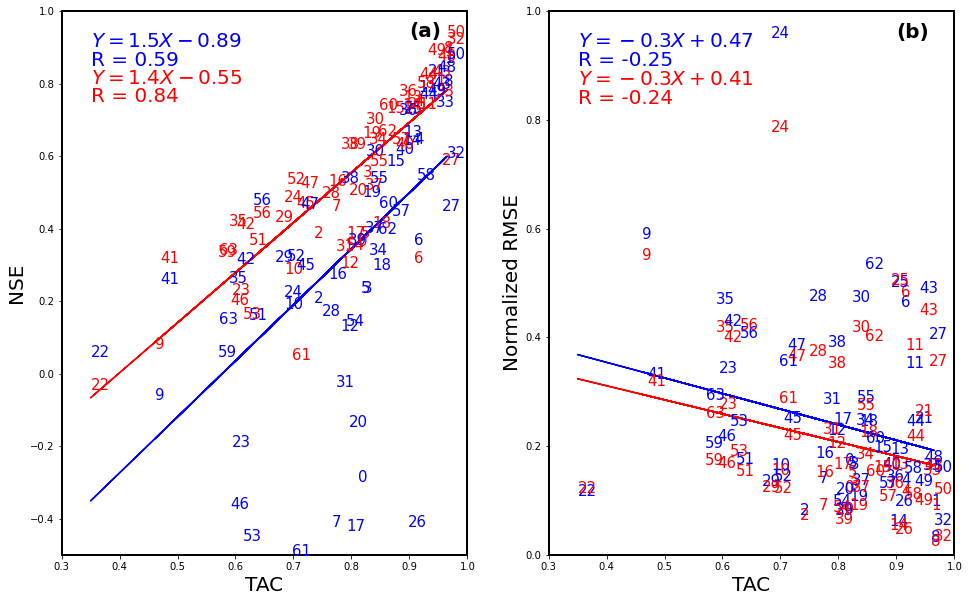

In [39]:
plt.figure(figsize=(16,10))

#-----------------------------------------
y_est_lstm, y_err_lstm, a_lstm, b_lstm = linear_(tac, nse[:,1])
y_est_clstm, y_err_clstm, a_clstm, b_clstm = linear_(tac, nse[:,2])


ax1 = plt.subplot(1,2,1)


ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax1.spines['top'].set_linewidth(2)

for i in range(len(tac)):
    plt.text(tac[i], nse[i,1], str(i),c='blue',fontsize=15)
    plt.text(tac[i], nse[i,2], str(i),c='red', fontsize=15)

#plt.scatter(tac, nse[:,1], c='lightblue')

plt.plot(tac, y_est_lstm, '-', color='blue')

#plt.scatter(tac, nse[:,2], c='lightgreen')
plt.plot(tac, y_est_clstm, '-', color='red')

plt.ylim(-0.5,1)
plt.xlim(0.3,1)

plt.xlabel('TAC', fontsize=20)
plt.ylabel('NSE', fontsize=20)
plt.text(0.35,0.9, '$Y = %.1fX %.2f$' % (a_lstm, b_lstm), c='blue',fontsize=20)
plt.text(0.35,0.85, 'R = '+ str(round(pearsonr(tac, nse[:,-2])[0],2)), c='blue',fontsize=20)

plt.text(0.35,0.8, '$Y = %.1fX %.2f$' % (a_clstm, b_clstm), c='red',fontsize=20)
plt.text(0.35,0.75, 'R = '+ str(round(pearsonr(tac, nse[:,-1])[0],2)), c='red',fontsize=20)
plt.text(0.9,0.93, '(a)',fontsize=20, fontweight='bold')


#-----------------------------------------
y_est_lstm, y_err_lstm, a_lstm, b_lstm = linear_(tac, nrmse[:,1])
y_est_clstm, y_err_clstm, a_clstm, b_clstm = linear_(tac, nrmse[:,2])

ax1 = plt.subplot(1,2,2)


ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax1.spines['top'].set_linewidth(2)

for i in range(len(tac)):
    plt.text(tac[i], nrmse[i,1], str(i),c='blue',fontsize=15)
    plt.text(tac[i], nrmse[i,2], str(i),c='red', fontsize=15)

#plt.scatter(tac, nse[:,1], c='lightblue')

plt.plot(tac, y_est_lstm, '-', color='blue')

#plt.scatter(tac, nse[:,2], c='lightgreen')
plt.plot(tac, y_est_clstm, '-', color='red')

plt.ylim(0,1)
plt.xlim(0.3,1)
plt.xlabel('TAC', fontsize=20)
plt.ylabel('Normalized RMSE', fontsize=20)
plt.text(0.35,0.935, '$Y = %.1fX + %.2f$' % (a_lstm, b_lstm), c='blue',fontsize=20)
plt.text(0.35,0.9, 'R = '+ str(round(pearsonr(tac, nrmse[:,-2])[0],2)), c='blue',fontsize=20)

plt.text(0.35,0.865, '$Y = %.1fX + %.2f$' % (a_clstm, b_clstm), c='red',fontsize=20)
plt.text(0.35,0.83, 'R = '+ str(round(pearsonr(tac, nrmse[:,-1])[0],2)), c='red',fontsize=20)
plt.text(0.9,0.95, '(b)',fontsize=20, fontweight='bold')


plt.savefig('figure7.pdf')

# Figure 8,9. drought, precipitation events.

In [41]:
mean_p = np.full((N_sites,), np.nan)
num_arid = np.full((N_sites,), np.nan)

for i, idx in enumerate(np.arange(N_sites)):
    
    name = site_name_list[idx]
    name_ = path_output+name+'_out.npy'
    output = np.load(name_)
    name_ = path_output+name+'_feature.npy'
    feature = np.load(name_)
    mean_p[i] = np.nanmean(feature[:,5])  #
    SWDI = SWDIcount(output[:,-1])    
    num_arid[i] = np.sum(SWDI<-10)

idx_arid = np.argsort(num_arid)
idx_wet = np.argsort(mean_p)

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


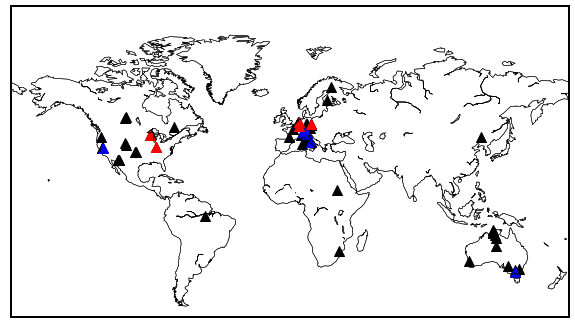

In [72]:
plt.figure(figsize=(10,10))

#
ax = plt.subplot(111)

ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)

#--------------------------------------------------------------
m = Basemap(projection='mill',
            llcrnrlat=-60, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180,
            ax=ax)  # mill projection
m.drawcoastlines(linewidth=0.5)
x, y = m(lon,lat)
sc = m.scatter(x,y, marker='^',s=100, vmin=1000, vmax=3000, c='black')

x, y = m(lon[[26,48,39,19,2]],lat[[26,48,39,19,2]])
sc = m.scatter(x,y, marker='^',s=100, vmin=1000, vmax=3000, c='blue')

m = Basemap(projection='mill',
            llcrnrlat=-60, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180,
            ax=ax)  # mill projection
m.drawcoastlines(linewidth=0.5)
x, y = m(lon[[idx_arid[-5:]]],lat[[idx_arid[-5:]]])
sc = m.scatter(x,y, marker='^',s=100, vmin=1000, vmax=3000, c='red')

plt.savefig('figureS1.pdf')

AU-Wac
US-Blo
IT-Lav
IT-Col
CH-Cha


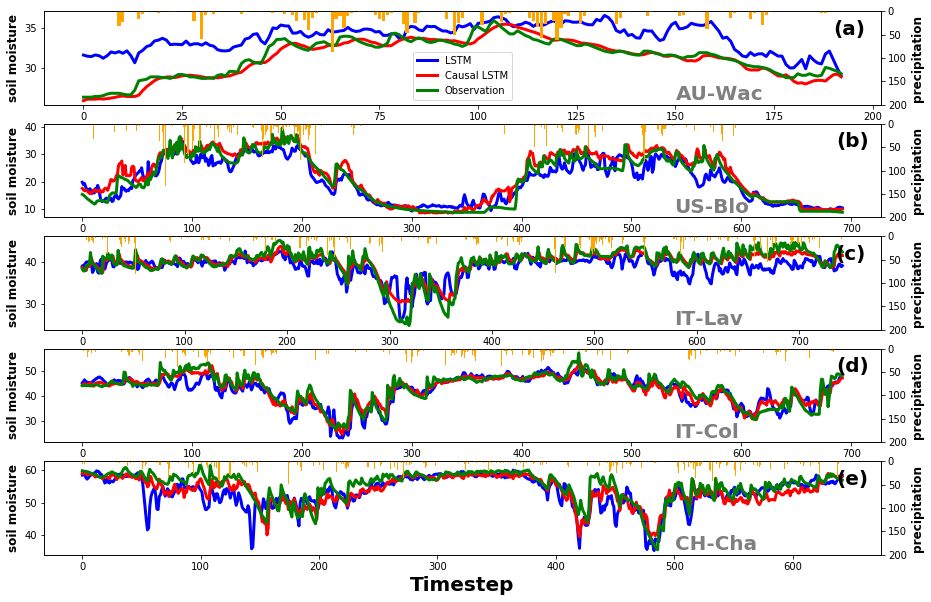

In [34]:
plt.figure(figsize=(15,10))
label = ['(a)','(b)','(c)','(d)','(e)']

for i, idx_ in enumerate([26,48,39,19,2]):
    
    plt.subplot(5,1,i+1)
    name = site_name_list[idx_]
    print(name)
    name_ = path_output+name+'_out.npy'
    output = np.load(name_)
    name_ = path_output+name+'_feature.npy'
    feature = np.load(name_)

    plt.plot(output[7:, 1], color='blue', linewidth=3)
    plt.plot(output[7:, 2], color='red', linewidth=3)
    plt.plot(output[:-7, -1], color='green', linewidth=3)
    plt.ylabel('soil moisture', fontsize=12, fontweight='bold')
    if i==4:
        plt.xlabel('Timestep', fontsize=20,fontweight='bold')
        
    if i==0:
        plt.legend(['LSTM', 'Causal LSTM', 'Observation'])

    ax1 = plt.twinx()
    plt.ylim(0,200)
    plt.ylabel('precipitation',fontsize=12, fontweight='bold')

    ax1.bar(x=np.arange(feature.shape[0]-7),height=feature[:-7,5], color='orange')
    plt.gca().invert_yaxis()
    if i==0:
        plt.text(150, 190, name,color='grey',fontweight='bold', fontsize=20)
        plt.text(190, 50, label[i],color='black',fontweight='bold', fontsize=20)
    else:
        plt.text(0.77*output.shape[0], 190, name,color='grey',fontweight='bold', fontsize=20)
        plt.text(0.98*output.shape[0], 50, label[i],color='black',fontweight='bold', fontsize=20)
        

plt.savefig('figure8.pdf')

NL-Loo
US-WCr
US-MMS
DE-Tha
BE-Vie


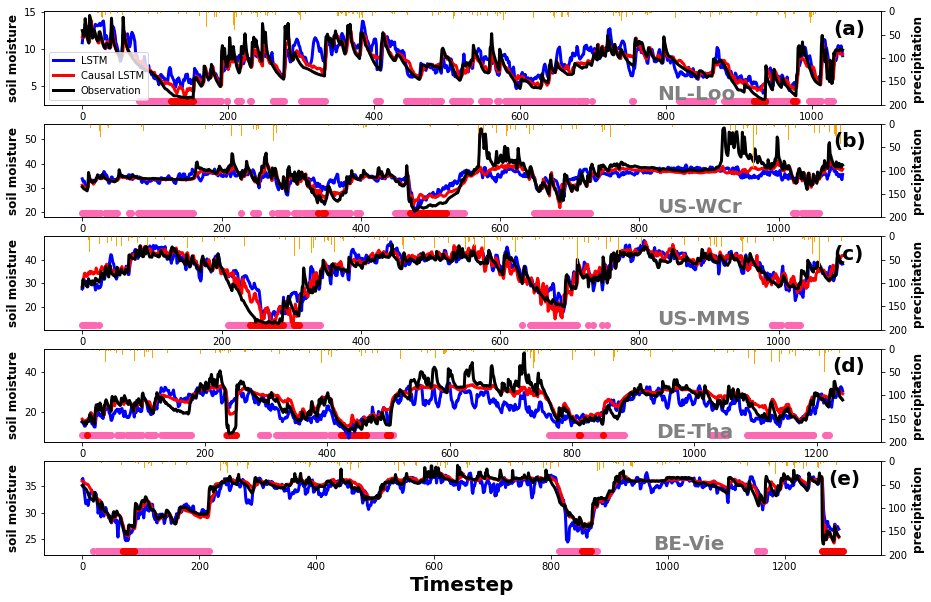

In [78]:
plt.figure(figsize=(15,10))

for i, idx_ in enumerate(idx_arid[-5:]):
    
    plt.subplot(5,1,i+1)
    name = site_name_list[idx_]
    print(name)
    name_ = path_output+name+'_out.npy'
    output = np.load(name_)
    name_ = path_output+name+'_feature.npy'
    feature = np.load(name_)
    SWDI = SWDIcount(output[:,-1])   
    SWDI_severe = np.zeros_like((SWDI))    
    SWDI_severe[(SWDI<-5) & (SWDI>-10)]=0.95*np.nanmin(output[:,-1])
    SWDI_extreme = np.zeros_like((SWDI))    
    SWDI_extreme[SWDI<-10]=0.95*np.nanmin(output[:,-1])

    SWDI_severe[(SWDI>-5)|(SWDI<-10)]=np.nan
    SWDI_extreme[SWDI>-10]=np.nan

    plt.plot(output[7:, 1], color='blue', linewidth=3)
    plt.plot(output[7:, 2], color='red', linewidth=3)
    plt.plot(output[:-7, -1], color='black', linewidth=3)
    plt.ylabel('soil moisture', fontsize=12, fontweight='bold')

    if i==0:
        plt.legend(['LSTM', 'Causal LSTM', 'Observation'])
    if i==4:
        plt.xlabel('Timestep', fontsize=20,fontweight='bold')
        
    plt.scatter(x=np.arange(SWDI_severe.shape[0]),y=SWDI_severe, c='hotpink')
    plt.scatter(x=np.arange(SWDI_extreme.shape[0]),y=SWDI_extreme, c='red')

    ax1 = plt.twinx()
    plt.ylim(0,200)
    plt.ylabel('precipitation',fontsize=12, fontweight='bold')
    ax1.bar(x=np.arange(feature.shape[0]-7),height=feature[:-7,5], color='orange')

    plt.gca().invert_yaxis()

    plt.text(0.75*output.shape[0], 190, name,color='grey',fontweight='bold', fontsize=20)
    plt.text(0.98*output.shape[0], 50, label[i],color='black',fontweight='bold', fontsize=20)
        
plt.savefig('figure9.pdf')

# Figure 10. multiscale forecast

In [86]:
path_output = '/hard/lilu/clstmcases/1DD/output/'
path_loss = '/hard/lilu/clstmcases/1DD/loss/'
path_info = '/hard/lilu/clstmcases/1DD/info/'

l = glob.glob(path_output + '*' + '_out.npy', recursive=True)
N_sites = len(site_name_list)

# init
r = np.full((N_sites,3), np.nan)
nse = np.full((N_sites,3), np.nan)
rmse = np.full((N_sites,3), np.nan)
nrmse = np.full((N_sites,3), np.nan)
mape = np.full((N_sites,3), np.nan)
kge = np.full((N_sites,3), np.nan)
bias = np.full((N_sites,3), np.nan)
ttest = np.full((N_sites,2), 0)
length = np.full((N_sites,), np.nan)
tac = np.full((N_sites,), np.nan)

for i,name_ in enumerate(site_name_list):
        
    output = np.load(path_output+name_+'_out.npy')
    length[i] = output.shape[0]
    
    # cal metrics
    r[i,0] = pearsonr(output[:,-1], output[:,0])[0]
    r[i,1] = pearsonr(output[:,-1], output[:,1])[0]
    r[i, 2] = pearsonr(output[:, -1], output[:, 2])[0]
    
    kge[i,0],beta[i,0], gamma[i,0]  = cal_kge(output[:,-1], output[:,0])
    kge[i,1],beta[i,1], gamma[i,1] = cal_kge(output[:,-1], output[:,1])
    kge[i, 2],beta[i,2], gamma[i,2] = cal_kge(output[:, -1], output[:, 2])    
    
    nse[i,0] = r2_score(output[:,-1], output[:,0])
    nse[i,1] = r2_score(output[:,-1], output[:,1])
    nse[i, 2] = r2_score(output[:, -1], output[:, 2])
    
    rmse[i,0] = np.sqrt(mean_squared_error(output[:,-1], output[:,0]))
    rmse[i,1] = np.sqrt(mean_squared_error(output[:,-1], output[:,1]))
    rmse[i, 2] = np.sqrt(mean_squared_error(output[:, -1], output[:, 2]))

    
    nrmse[i,0] = np.sqrt(mean_squared_error(output[:,-1], output[:,0]))/np.nanmean(output[:,-1])
    nrmse[i,1] = np.sqrt(mean_squared_error(output[:,-1], output[:,1]))/np.nanmean(output[:,-1])
    nrmse[i, 2] = np.sqrt(mean_squared_error(output[:, -1], output[:, 2]))/np.nanmean(output[:,-1])
    
    mape[i,0] = cal_mape(output[:,-1], output[:,0])
    mape[i,1] = cal_mape(output[:,-1], output[:,1])  
    mape[i, 2] = cal_mape(output[:, -1], output[:, 2])
    
    bias[i,0] = np.mean(output[:, -1])-np.mean(output[:, 0])
    bias[i,1] = np.mean(output[:, -1])-np.mean(output[:, 1])
    bias[i, 2] = np.mean(output[:, -1])-np.mean(output[:, 2])

    tac[i] = cal_autocorr(output[:, -1], t=7)[0, 1]

    t, p = stats.ttest_ind(np.abs(output[:,2]-output[:,-1]), np.abs(output[:,-1]-output[:,1]),alternative='less')
    if p<0.05:
        ttest[i,0] = 1
    
    t, p = stats.ttest_ind(np.abs(output[:,2]-output[:,-1]), np.abs(output[:,-1]-output[:,1]),alternative='greater')
    if p<0.05:
        ttest[i,1] = 1

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


In [87]:
output_dict = {
    'SITE_NAME': site_name_list, 
    'BIAS_LSTM': bias[:,1],
    'BIAS_CLSTM': bias[:,2],
    'KGE_LSTM': kge[:,1],
    'KGE_CLSTM': kge[:,2],
    'R_LSTM': r[:,1],
    'R_CLSTM': r[:,2],
    'BETA_LSTM': beta[:,1],
    'BETA_CLSTM': beta[:,2],
    'GAMMA_LSTM': gamma[:,1],
    'GAMMA_CLSTM': gamma[:,2],
    'R2_LSTM': nse[:,1],
    'R2_CLSTM': nse[:,2],
    'RMSE_LSTM': rmse[:,1],
    'RMSE_CLSTM': rmse[:,2],
    'MAPE_LSTM': mape[:,1],
    'MAPE_CLSTM': mape[:,2]
}

pd.set_option('precision', 2)

df_1DD = pd.DataFrame(data=output_dict)
df_1DD.to_csv('output_summary_1DD.csv')
df_1DD

SITE_NAME  BIAS_LSTM  BIAS_CLSTM  KGE_LSTM  KGE_CLSTM  R_LSTM  R_CLSTM  \
0     DE-Geb      -1.00       -0.44      0.83       0.90    0.84     0.91   
1     NL-Hor      -1.46       -0.40      0.84       0.95    0.97     0.99   
2     CH-Cha       0.84        0.27      0.90       0.88    0.90     0.91   
3     AU-Tum       1.53        0.74      0.80       0.87    0.90     0.92   
4     US-MMS      -0.37       -0.27      0.95       0.96    0.95     0.97   
..       ...        ...         ...       ...        ...     ...      ...   
59    US-AR1       0.61       -0.10      0.74       0.87    0.76     0.91   
60    IT-Noe       1.11        0.13      0.77       0.92    0.89     0.95   
61    DE-Seh      -4.64       -2.55      0.21       0.51    0.65     0.82   
62    AU-Dry       0.58        0.43      0.82       0.93    0.89     0.95   
63    AU-Cpr       0.23        0.10      0.73       0.72    0.85     0.88   

    BETA_LSTM  BETA_CLSTM  GAMMA_LSTM  GAMMA_CLSTM  R2_LSTM  R2_CLSTM  \
0        1.05        1.02        1.02         1.02     0.53      0.78   
1        1.02        1.01        0.85         0.95     0.93      0.97   
2        0.98        1.00        0.98         0.92     0.77      0.82   
3        0.95        0.97        0.84         0.90     0.72      0.82   
4        1.01        1.01        0.98         0.98     0.90      0.93   
..        ...         ...         ...          ...      ...       ...   
59       0.97        1.01        0.91         0.92     0.54      0.82   
60       0.96        1.00        0.80         0.94     0.76      0.90   
61       1.20        1.11        0.32         0.56    -0.14      0.48   
62       0.93        0.95        0.88         1.00     0.78      0.90   
63       0.94        0.98        0.79         0.75     0.67      0.74   

    RMSE_LSTM  RMSE_CLSTM  MAPE_LSTM  MAPE_CLSTM  
0        1.91        1.30       7.92        5.08  
1        4.84        2.87       4.95        2.37  
2        2.15        1.92       2.59        2.37  
3        2.78        2.21       6.86        5.02  
4        2.31        1.94       5.47        4.28  
..        ...         ...        ...         ...  
59       2.68        1.67      10.35        5.43  
60       3.79        2.49       7.56        3.91  
61       7.07        4.79      33.66       22.74  
62       2.54        1.73      17.25       14.16  
63       0.70        0.63       8.94        6.00  

[64 rows x 17 columns]

In [88]:
df_describe_1DD = df_1DD.describe()

a = df_describe_1DD['MAPE_LSTM'].values
a[np.isinf(a)] = np.nan

df_describe_1DD['MAPE_LSTM']['std'] = np.nanstd(a)
df_describe_1DD['MAPE_LSTM']['mean'] = np.nanmean(a)
df_describe_1DD['MAPE_LSTM']['max'] = np.nanmax(a)

a = df_describe_1DD['MAPE_CLSTM'].values
a[np.isinf(a)] = np.nan

df_describe_1DD['MAPE_CLSTM']['std'] = np.nanstd(a)
df_describe_1DD['MAPE_CLSTM']['mean'] = np.nanmean(a)
df_describe_1DD['MAPE_CLSTM']['max'] = np.nanmax(a)

df_describe_1DD

BIAS_LSTM  BIAS_CLSTM  KGE_LSTM  KGE_CLSTM  R_LSTM  R_CLSTM  BETA_LSTM  \
count      64.00       64.00     64.00      64.00   64.00    64.00      64.00   
mean       -0.06       -0.04      0.78       0.87    0.88     0.93       1.00   
std         1.17        0.65      0.14       0.10    0.09     0.05       0.05   
min        -4.64       -2.55      0.21       0.51    0.54     0.76       0.82   
25%        -0.57       -0.28      0.75       0.85    0.86     0.90       0.98   
50%        -0.11        0.01      0.81       0.90    0.90     0.93       1.01   
75%         0.51        0.15      0.86       0.94    0.94     0.97       1.03   
max         4.74        3.13      0.95       0.99    0.99     1.00       1.20   

       BETA_CLSTM  GAMMA_LSTM  GAMMA_CLSTM  R2_LSTM  R2_CLSTM  RMSE_LSTM  \
count       64.00       64.00        64.00    64.00     64.00      64.00   
mean         1.00        0.85         0.91     0.72      0.85       2.80   
std          0.03        0.14         0.10     0.22      0.11       1.64   
min          0.88        0.32         0.56    -0.16      0.48       0.44   
25%          0.99        0.80         0.89     0.67      0.78       1.83   
50%          1.00        0.85         0.94     0.78      0.86       2.54   
75%          1.01        0.94         0.97     0.85      0.93       3.43   
max          1.11        1.24         1.07     0.97      0.99       8.86   

       RMSE_CLSTM  MAPE_LSTM  MAPE_CLSTM  
count       64.00      64.00       64.00  
mean         2.07      21.55       17.01  
std          1.37      28.40       17.55  
min          0.30       0.94        0.34  
25%          1.33       6.69        4.04  
50%          1.83       9.26        6.05  
75%          2.50      15.54        9.31  
max          8.60     229.24      132.62

In [89]:
# init
history = np.full((N_sites, 50, 4), np.nan)

# process
for i, site_name in enumerate(site_name_list):
    output = np.load(path_loss + site_name + '_loss.npy')
    history[i, :, 0] = output[0:50]
    history[i,:,1] = output[50:100]
    history[i,:,2] = output[100:150]
    history[i,:,3] = output[150:200]

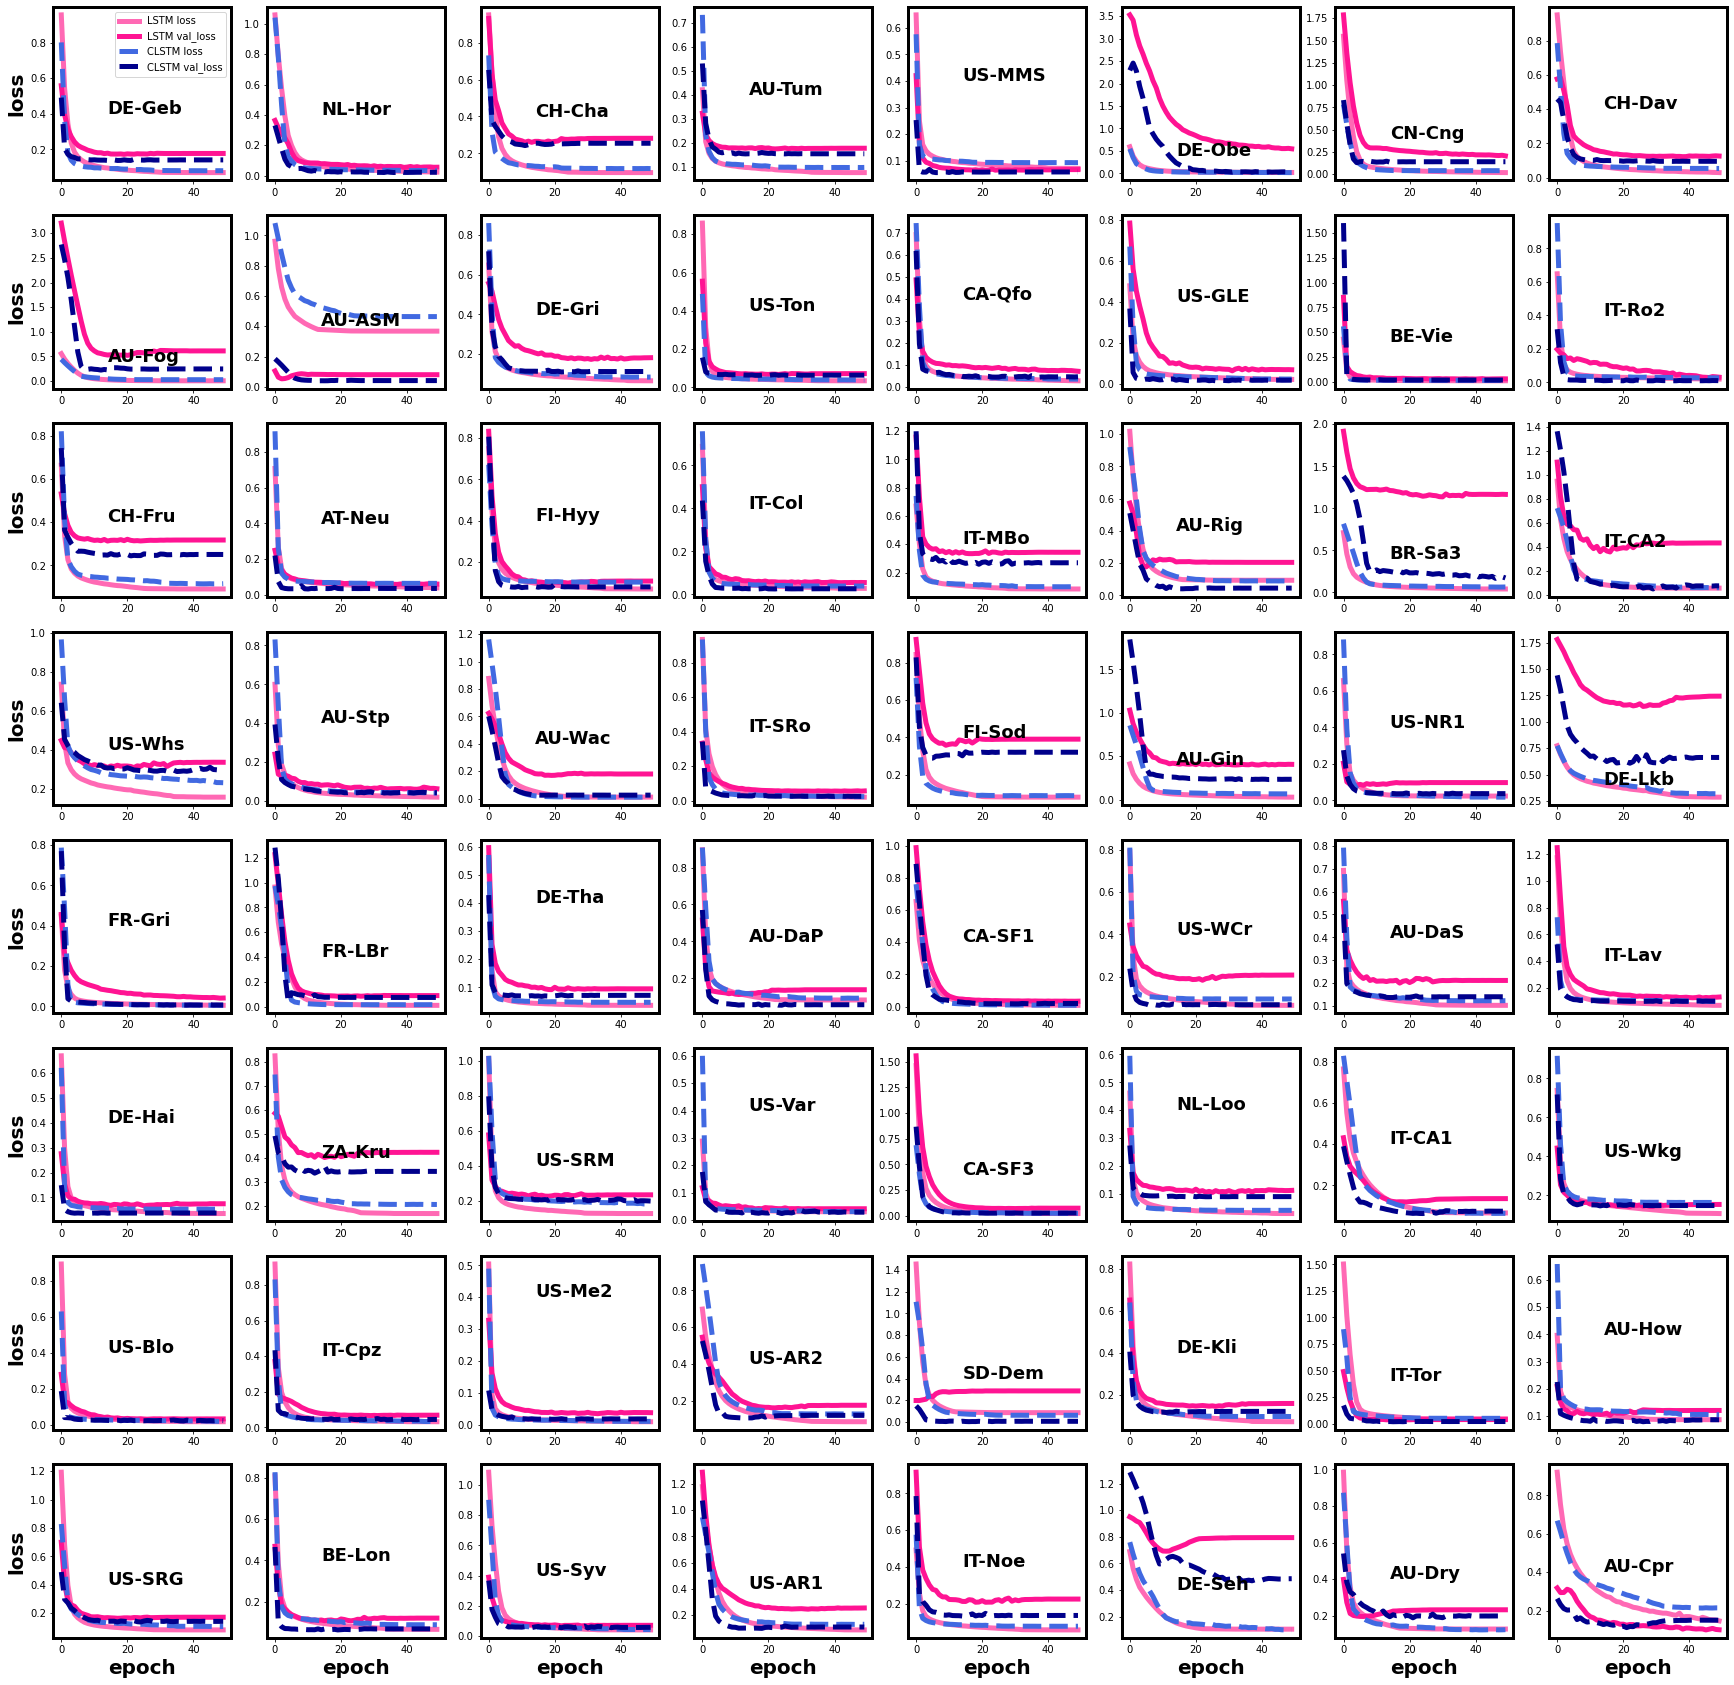

In [90]:
plt.figure(figsize=(30,30))

for i in range(len(site_name_list)):
    ax = plt.subplot(8, 8, i+1)
    
    ax.spines['top'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)

    lstm_loss = history[i,:,0]
    lstm_val_loss = history[i, :, 1]
    clstm_loss = history[i, :, 2]
    clstm_val_loss = history[i, :, 3]

    plt.plot(lstm_loss, linewidth=5, color='hotpink', linestyle='-')
    plt.plot(lstm_val_loss, linewidth=5, color='deeppink', linestyle='-')
    plt.plot(clstm_loss, linewidth=5, color='royalblue', linestyle='--')
    plt.plot(clstm_val_loss, linewidth=5, color='darkblue', linestyle='--')

    if i in np.arange(56,64):
        plt.xlabel('epoch', fontsize=20, fontweight='bold')
        
    if i in np.arange(0,64,8):
        plt.ylabel('loss', fontsize=20, fontweight='bold')
        
    if i==0:
        plt.legend(['LSTM loss','LSTM val_loss','CLSTM loss','CLSTM val_loss'])
        
    plt.text(14, 0.4, site_name_list[i], fontsize=18, fontweight='bold')

plt.savefig('figureS2.pdf')

In [223]:
path_output = '/hard/lilu/clstmcases/15DD/output/'
path_loss = '/hard/lilu/clstmcases/15DD/loss/'
path_info = '/hard/lilu/clstmcases/15DD/info/'

l = glob.glob(path_output + '*' + '_out.npy', recursive=True)
N_sites = len(site_name_list)

# init
r = np.full((N_sites,3), np.nan)
nse = np.full((N_sites,3), np.nan)
rmse = np.full((N_sites,3), np.nan)
nrmse = np.full((N_sites,3), np.nan)
mape = np.full((N_sites,3), np.nan)
kge = np.full((N_sites,3), np.nan)
bias = np.full((N_sites,3), np.nan)
ttest = np.full((N_sites,2), 0)
length = np.full((N_sites,), np.nan)
tac = np.full((N_sites,), np.nan)

for i,name_ in enumerate(site_name_list):
        
    output = np.load(path_output+name_+'_out.npy')
    length[i] = output.shape[0]
    
    # cal metrics
    r[i,0] = pearsonr(output[:,-1], output[:,0])[0]
    r[i,1] = pearsonr(output[:,-1], output[:,1])[0]
    r[i, 2] = pearsonr(output[:, -1], output[:, 2])[0]
    
    kge[i,0],beta[i,0], gamma[i,0]  = cal_kge(output[:,-1], output[:,0])
    kge[i,1],beta[i,1], gamma[i,1] = cal_kge(output[:,-1], output[:,1])
    kge[i, 2],beta[i,2], gamma[i,2] = cal_kge(output[:, -1], output[:, 2])    
    
    nse[i,0] = r2_score(output[:,-1], output[:,0])
    nse[i,1] = r2_score(output[:,-1], output[:,1])
    nse[i, 2] = r2_score(output[:, -1], output[:, 2])
    
    rmse[i,0] = np.sqrt(mean_squared_error(output[:,-1], output[:,0]))
    rmse[i,1] = np.sqrt(mean_squared_error(output[:,-1], output[:,1]))
    rmse[i, 2] = np.sqrt(mean_squared_error(output[:, -1], output[:, 2]))

    
    nrmse[i,0] = np.sqrt(mean_squared_error(output[:,-1], output[:,0]))/np.nanmean(output[:,-1])
    nrmse[i,1] = np.sqrt(mean_squared_error(output[:,-1], output[:,1]))/np.nanmean(output[:,-1])
    nrmse[i, 2] = np.sqrt(mean_squared_error(output[:, -1], output[:, 2]))/np.nanmean(output[:,-1])
    
    mape[i,0] = cal_mape(output[:,-1], output[:,0])
    mape[i,1] = cal_mape(output[:,-1], output[:,1])  
    mape[i, 2] = cal_mape(output[:, -1], output[:, 2])
    
    bias[i,0] = np.mean(output[:, -1])-np.mean(output[:, 0])
    bias[i,1] = np.mean(output[:, -1])-np.mean(output[:, 1])
    bias[i, 2] = np.mean(output[:, -1])-np.mean(output[:, 2])

    tac[i] = cal_autocorr(output[:, -1], t=7)[0, 1]

    t, p = stats.ttest_ind(np.abs(output[:,2]-output[:,-1]), np.abs(output[:,-1]-output[:,1]),alternative='less')
    if p<0.05:
        ttest[i,0] = 1
    
    t, p = stats.ttest_ind(np.abs(output[:,2]-output[:,-1]), np.abs(output[:,-1]-output[:,1]),alternative='greater')
    if p<0.05:
        ttest[i,1] = 1

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


In [224]:
output_dict = {
    'SITE_NAME': site_name_list, 
    'BIAS_LSTM': bias[:,1],
    'BIAS_CLSTM': bias[:,2],
    'KGE_LSTM': kge[:,1],
    'KGE_CLSTM': kge[:,2],
    'R_LSTM': r[:,1],
    'R_CLSTM': r[:,2],
    'BETA_LSTM': beta[:,1],
    'BETA_CLSTM': beta[:,2],
    'GAMMA_LSTM': gamma[:,1],
    'GAMMA_CLSTM': gamma[:,2],
    'R2_LSTM': nse[:,1],
    'R2_CLSTM': nse[:,2],
    'RMSE_LSTM': rmse[:,1],
    'RMSE_CLSTM': rmse[:,2],
    'MAPE_LSTM': mape[:,1],
    'MAPE_CLSTM': mape[:,2]
}

pd.set_option('precision', 2)

df_15DD = pd.DataFrame(data=output_dict)
df_15DD.to_csv('output_summary_15DD.csv')
df_15DD

SITE_NAME  BIAS_LSTM  BIAS_CLSTM  KGE_LSTM  KGE_CLSTM  R_LSTM  R_CLSTM  \
0     DE-Geb      -2.15       -2.06  4.24e-01       0.66    0.44     0.69   
1     NL-Hor      -3.35       -2.57  7.15e-01       0.73    0.87     0.89   
2     CH-Cha       1.89        2.04  4.79e-01       0.43    0.48     0.43   
3     AU-Tum       3.12        1.61  5.53e-01       0.71    0.62     0.72   
4     US-MMS      -1.37       -1.65  5.86e-01       0.61    0.72     0.64   
..       ...        ...         ...       ...        ...     ...      ...   
59    US-AR1       2.32       -0.32  1.37e-01       0.16    0.15     0.18   
60    IT-Noe       1.43        1.17  6.22e-01       0.75    0.68     0.77   
61    DE-Seh      -6.92       -8.66 -8.12e-03      -0.73    0.53    -0.41   
62    AU-Dry       0.27        0.91  5.54e-01       0.76    0.61     0.80   
63    AU-Cpr       0.19        0.09 -3.23e-02       0.21    0.13     0.48   

    BETA_LSTM  BETA_CLSTM  GAMMA_LSTM  GAMMA_CLSTM  R2_LSTM  R2_CLSTM  \
0        1.11        1.11        0.91         0.91    -0.76     -0.21   
1        1.04        1.03        0.75         0.76     0.72      0.76   
2        0.97        0.96        1.02         1.08    -0.20     -0.39   
3        0.89        0.94        0.79         0.94     0.01      0.39   
4        1.04        1.05        0.70         0.85     0.48      0.30   
..        ...         ...         ...          ...      ...       ...   
59       0.88        1.02        0.98         0.82    -1.02     -0.41   
60       0.95        0.96        0.80         0.90     0.43      0.56   
61       1.30        1.38        0.16         0.06    -1.00     -1.93   
62       0.97        0.88        0.79         1.06     0.35      0.60   
63       0.95        0.98        0.44         0.41    -0.09      0.21   

    RMSE_LSTM  RMSE_CLSTM  MAPE_LSTM  MAPE_CLSTM  
0        3.58        2.97      16.24       13.58  
1        9.55        8.82       9.49        8.92  
2        4.87        5.24       6.37        7.15  
3        5.14        4.03      13.56       10.62  
4        5.34        6.20      14.07       15.96  
..        ...         ...        ...         ...  
59       4.49        3.76      17.27       15.95  
60       5.90        5.15      14.76       12.04  
61       9.01       10.91      44.96       54.45  
62       4.46        3.50      38.54       52.39  
63       1.26        1.07      17.30       14.58  

[64 rows x 17 columns]

In [226]:
df_describe_15DD = df_15DD.describe()

a = df_describe_15DD['MAPE_LSTM'].values
a[np.isinf(a)] = np.nan

df_describe_15DD['MAPE_LSTM']['std'] = np.nanstd(a)
df_describe_15DD['MAPE_LSTM']['mean'] = np.nanmean(a)
df_describe_15DD['MAPE_LSTM']['max'] = np.nanmax(a)

a = df_describe_15DD['MAPE_CLSTM'].values
a[np.isinf(a)] = np.nan

df_describe_15DD['MAPE_CLSTM']['std'] = np.nanstd(a)
df_describe_15DD['MAPE_CLSTM']['mean'] = np.nanmean(a)
df_describe_15DD['MAPE_CLSTM']['max'] = np.nanmax(a)

df_describe_15DD

BIAS_LSTM  BIAS_CLSTM  KGE_LSTM  KGE_CLSTM  R_LSTM  R_CLSTM  BETA_LSTM  \
count      64.00       64.00     64.00      64.00   64.00    64.00      64.00   
mean       -0.04       -0.15      0.44       0.52    0.56     0.62       1.00   
std         2.36        1.88      0.27       0.29    0.26     0.25       0.10   
min        -6.92       -8.66     -0.42      -0.73   -0.35    -0.41       0.72   
25%        -1.18       -0.80      0.34       0.43    0.44     0.55       0.96   
50%         0.21       -0.03      0.48       0.55    0.61     0.68       0.99   
75%         1.32        0.93      0.62       0.71    0.72     0.78       1.07   
max         7.56        5.84      0.85       0.93    0.96     0.94       1.30   

       BETA_CLSTM  GAMMA_LSTM  GAMMA_CLSTM  R2_LSTM  R2_CLSTM  RMSE_LSTM  \
count       64.00       64.00        64.00    64.00     64.00      64.00   
mean         1.01        0.79         0.80     0.09      0.26       5.27   
std          0.09        0.27         0.25     0.51      0.44       3.08   
min          0.78        0.12         0.06    -1.49     -1.93       0.59   
25%          0.96        0.60         0.69    -0.12      0.09       3.56   
50%          1.00        0.78         0.81     0.20      0.33       4.69   
75%          1.03        0.94         0.92     0.44      0.54       6.53   
max          1.38        1.68         1.52     0.73      0.87      20.13   

       RMSE_CLSTM  MAPE_LSTM  MAPE_CLSTM  
count       64.00      64.00       64.00  
mean         4.83      24.96       23.88  
std          3.28      21.15       21.50  
min          0.69       2.75        2.60  
25%          2.94      12.32       10.59  
50%          4.04      19.22       16.47  
75%          6.22      30.32       28.10  
max         22.23      64.00       64.00

In [227]:
# init
history = np.full((N_sites, 50, 4), np.nan)

# process
for i, site_name in enumerate(site_name_list):
    output = np.load(path_loss + site_name + '_loss.npy')
    history[i, :, 0] = output[0:50]
    history[i,:,1] = output[50:100]
    history[i,:,2] = output[100:150]
    history[i,:,3] = output[150:200]

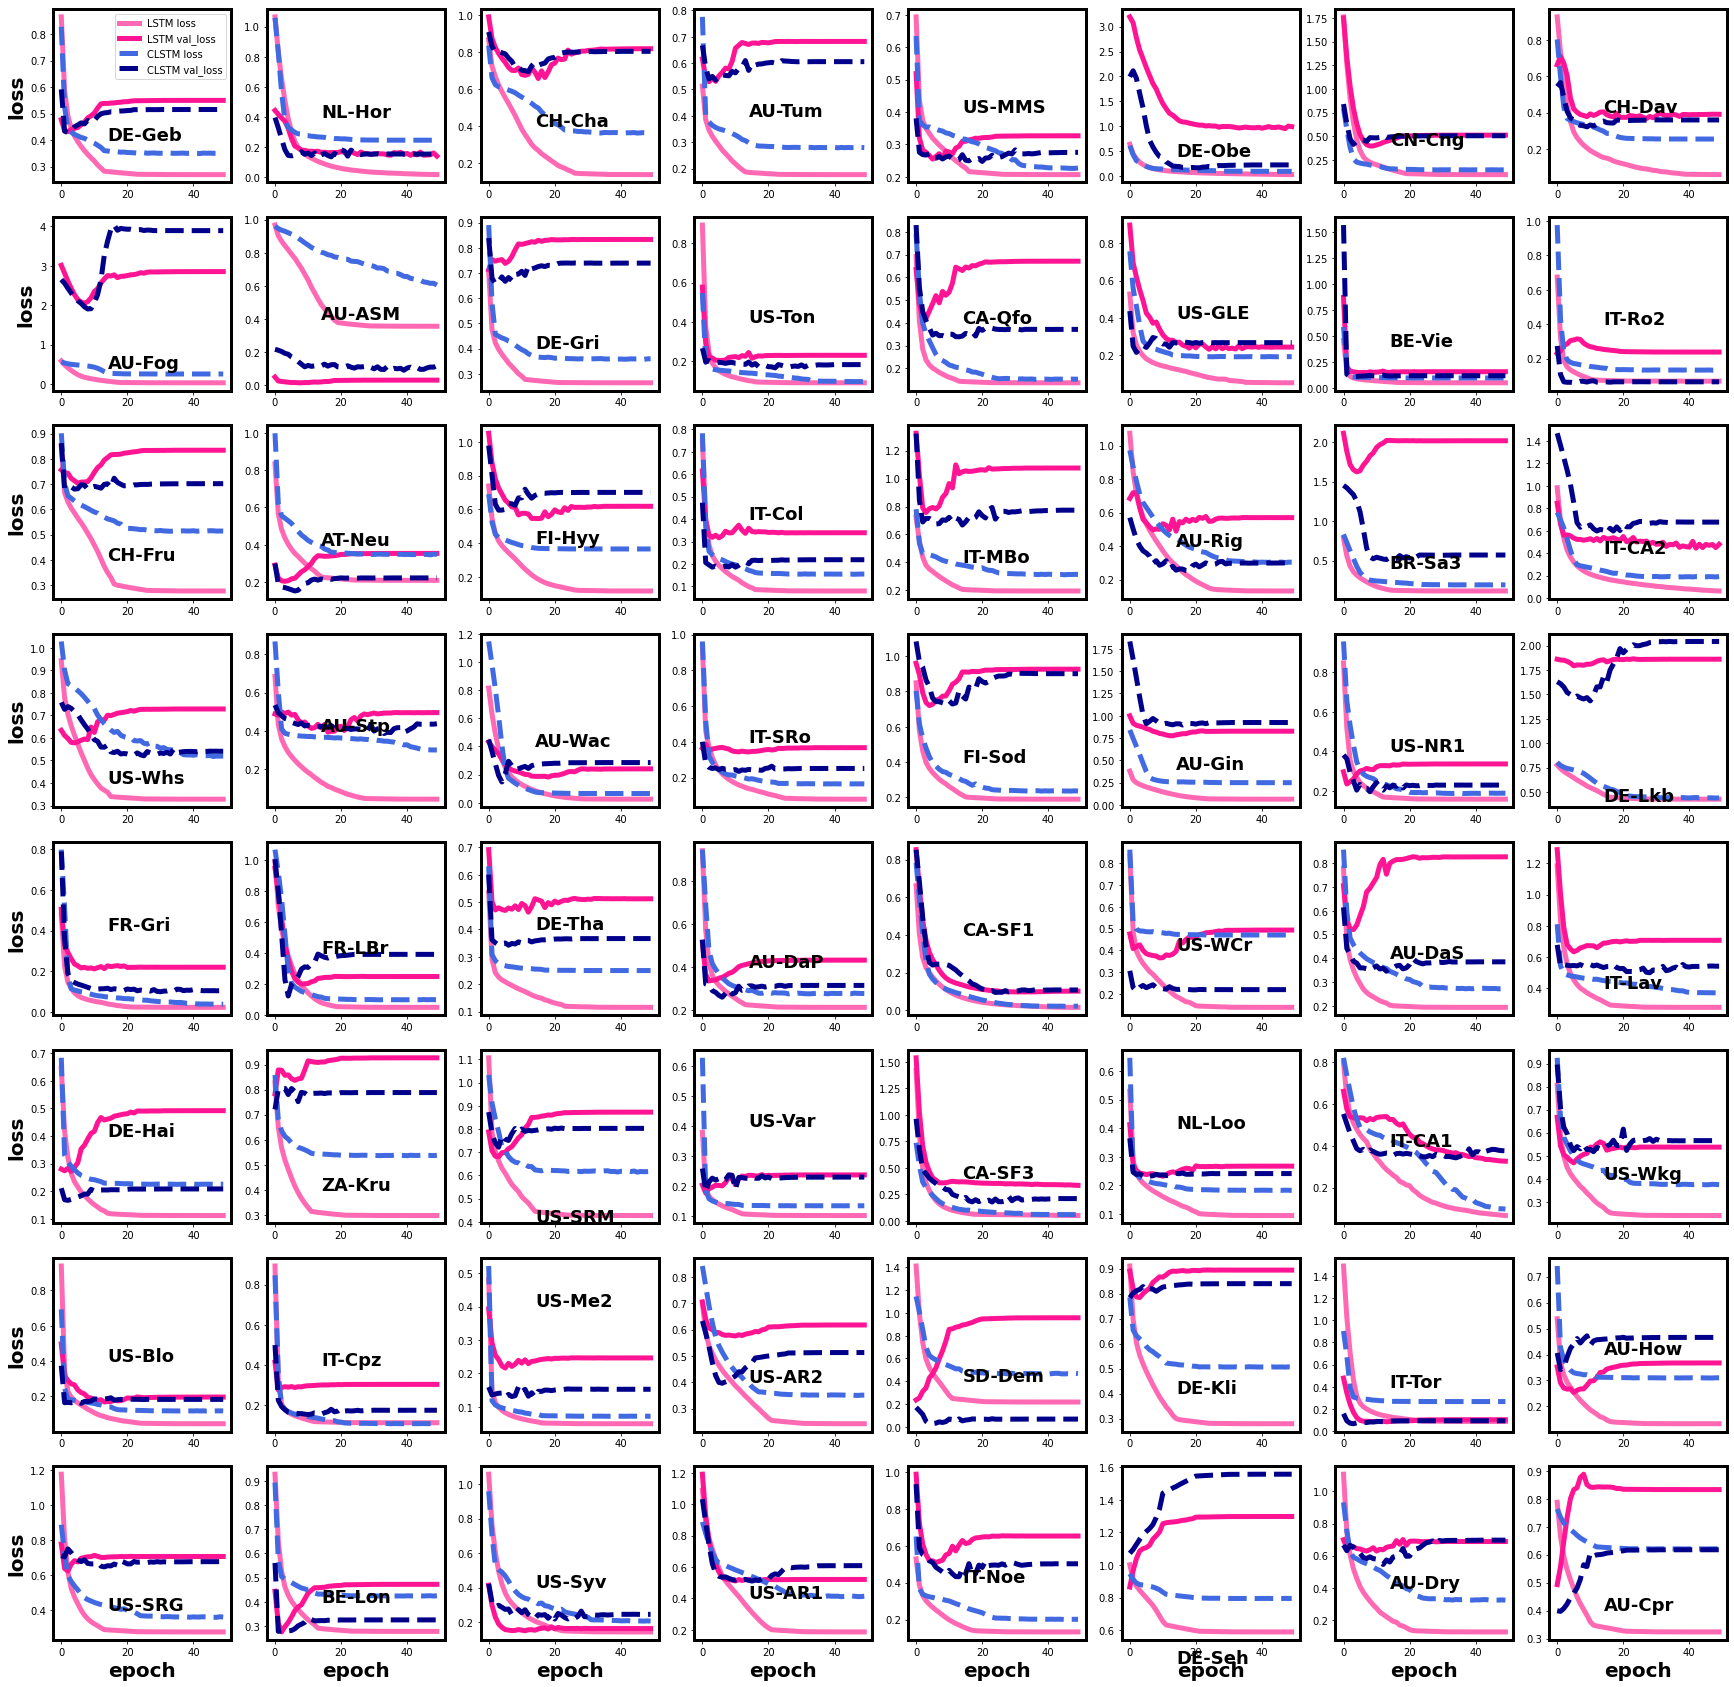

In [228]:
plt.figure(figsize=(30,30))

for i in range(len(site_name_list)):
    ax = plt.subplot(8, 8, i+1)
    
    ax.spines['top'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)

    lstm_loss = history[i,:,0]
    lstm_val_loss = history[i, :, 1]
    clstm_loss = history[i, :, 2]
    clstm_val_loss = history[i, :, 3]

    plt.plot(lstm_loss, linewidth=5, color='hotpink', linestyle='-')
    plt.plot(lstm_val_loss, linewidth=5, color='deeppink', linestyle='-')
    plt.plot(clstm_loss, linewidth=5, color='royalblue', linestyle='--')
    plt.plot(clstm_val_loss, linewidth=5, color='darkblue', linestyle='--')

    if i in np.arange(56,64):
        plt.xlabel('epoch', fontsize=20, fontweight='bold')
        
    if i in np.arange(0,64,8):
        plt.ylabel('loss', fontsize=20, fontweight='bold')
        
    if i==0:
        plt.legend(['LSTM loss','LSTM val_loss','CLSTM loss','CLSTM val_loss'])
        
    plt.text(14, 0.4, site_name_list[i], fontsize=18, fontweight='bold')

plt.savefig('figureS3.pdf')

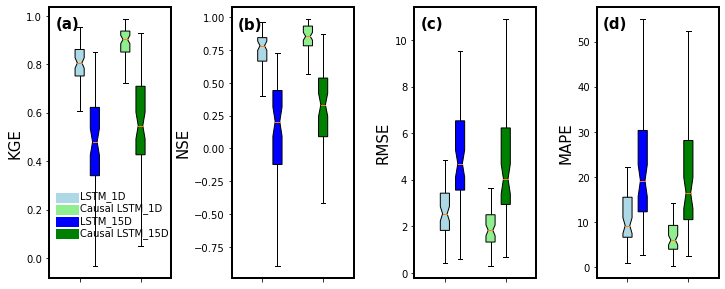

In [95]:
fig = plt.figure(figsize=(12,5))

#------------------------------------------------------------------------------------------------
ax1 = plt.subplot(1,4,1)

ax1.boxplot(df_1DD['KGE_LSTM'].values, 
                    notch=True,
                    patch_artist=True, 
                    showfliers=False,
                    positions=[0],
                    boxprops=dict(facecolor='lightblue', color='black'))
ax1.boxplot(df_15DD['KGE_LSTM'].values, 
                    notch=True,
                    patch_artist=True, 
                    showfliers=False,
                    positions=[0.25],
                    boxprops=dict(facecolor='blue', color='black'))

ax1.boxplot(df_1DD['KGE_CLSTM'].values, 
            boxprops=dict(facecolor='lightgreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.75])

ax1.boxplot(df_15DD['KGE_CLSTM'].values, 
            boxprops=dict(facecolor='green', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[1])

ax1.set_ylabel('KGE', fontsize=15)
ax1.text(-0.4,0.95,'(a)',fontsize=15, fontweight='bold')

#------------------------------------------------------------------------------------------------
ax2 = plt.subplot(1, 4, 2)

ax2.boxplot(df_1DD['R2_LSTM'].values, 
            boxprops=dict(facecolor='lightblue', color='black'),
            notch=True, 
            patch_artist=True,  
            showfliers=False,
            positions=[0])
ax2.boxplot(df_15DD['R2_LSTM'].values, 
            boxprops=dict(facecolor='blue', color='black'),
            notch=True, 
            patch_artist=True,  
            showfliers=False,
            positions=[0.25])

ax2.boxplot(df_1DD['R2_CLSTM'].values,
            boxprops=dict(facecolor='lightgreen', color='black'),
            notch=True, 
            patch_artist=True, 
            showfliers=False,
            positions=[0.75])
ax2.boxplot(df_15DD['R2_CLSTM'].values,
            boxprops=dict(facecolor='green', color='black'),
            notch=True, 
            patch_artist=True, 
            showfliers=False,
            positions=[1])

ax2.set_ylabel('NSE', fontsize=15)
ax2.text(-0.4,0.905,'(b)',fontsize=15, fontweight='bold')

#------------------------------------------------------------------------------------------------
ax3 = plt.subplot(1, 4, 3)

ax3.boxplot(df_1DD['RMSE_LSTM'].values, 
            boxprops=dict(facecolor='lightblue', color='black'),
            notch=True, 
            patch_artist=True,  
            showfliers=False,
            positions=[0])
ax3.boxplot(df_15DD['RMSE_LSTM'].values, 
            boxprops=dict(facecolor='blue', color='black'),
            notch=True, 
            patch_artist=True,  
            showfliers=False,
            positions=[0.25])

ax3.boxplot(df_1DD['RMSE_CLSTM'].values,
            boxprops=dict(facecolor='lightgreen', color='black'),
            notch=True, 
            patch_artist=True,  
            showfliers=False, 
            positions=[0.75])
ax3.boxplot(df_15DD['RMSE_CLSTM'].values,
            boxprops=dict(facecolor='green', color='black'),
            notch=True, 
            patch_artist=True,  
            showfliers=False, 
            positions=[1])

ax3.set_ylabel('RMSE', fontsize=15)
ax3.text(-0.4,10.5,'(c)',fontsize=15, fontweight='bold')

#------------------------------------------------------------------------------------------------
ax4 = plt.subplot(1, 4, 4)

ax4.boxplot(df_1DD['MAPE_LSTM'].values,
            boxprops=dict(facecolor='lightblue', color='black'), 
            notch=True,
            patch_artist=True,  
            showfliers=False,
            positions=[0])
ax4.boxplot(df_15DD['MAPE_LSTM'].values,
            boxprops=dict(facecolor='blue', color='black'), 
            notch=True,
            patch_artist=True,  
            showfliers=False,
            positions=[0.25])

ax4.boxplot(df_1DD['MAPE_CLSTM'].values, 
            boxprops=dict(facecolor='lightgreen', color='black'),
            notch=True, 
            patch_artist=True,  
            showfliers=False,
            positions=[0.75])
ax4.boxplot(df_15DD['MAPE_CLSTM'].values, 
            boxprops=dict(facecolor='green', color='black'),
            notch=True, 
            patch_artist=True,  
            showfliers=False,
            positions=[1])

ax4.set_ylabel('MAPE', fontsize=15)
ax4.text(-0.4,53,'(d)',fontsize=15, fontweight='bold')

#------------------------------------------------------------------------------------------------
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xticks([0,1])
    ax.set_xticklabels(['',''])

    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    

ax1.plot([-0.3,-0.1], [0.25,0.25], color='lightblue', linewidth=10)
ax1.plot([-0.3, -0.1], [0.2, 0.2], color='lightgreen', linewidth=10)
ax1.plot([-0.3, -0.1], [0.15, 0.15], color='blue', linewidth=10)
ax1.plot([-0.3, -0.1], [0.1, 0.1], color='green', linewidth=10)
ax1.text(0., 0.245, 'LSTM_1D')
ax1.text(0., 0.195, 'Causal LSTM_1D')
ax1.text(0., 0.145, 'LSTM_15D')
ax1.text(0., 0.095, 'Causal LSTM_15D')

plt.subplots_adjust(wspace=0.5, hspace=0.05)

plt.savefig('figure10.pdf')

# Figure S4: Physical-constrained

In [87]:
path_output = '/hard/lilu/pclstmcases/p_lh_constrain/output/'
path_loss = '/hard/lilu/pclstmcases/p_lh_constrain/loss/'
path_info = '/hard/lilu/pclstmcases/p_lh_constrain/info/'

l = glob.glob(path_output + '*' + '_out.npy', recursive=True)
N_sites = len(site_name_list)

# init
r = np.full((N_sites,3), np.nan)
nse = np.full((N_sites,3), np.nan)
rmse = np.full((N_sites,3), np.nan)
nrmse = np.full((N_sites,3), np.nan)
mape = np.full((N_sites,3), np.nan)
kge = np.full((N_sites,3), np.nan)
bias = np.full((N_sites,3), np.nan)
ttest = np.full((N_sites,2), 0)
length = np.full((N_sites,), np.nan)
tac = np.full((N_sites,), np.nan)

for i,name_ in enumerate(site_name_list):
        
    output = np.load(path_output+name_+'_out.npy')
    length[i] = output.shape[0]
    
    # cal metrics
    r[i,0] = pearsonr(output[:,-1], output[:,0])[0]
    r[i,1] = pearsonr(output[:,-1], output[:,1])[0]
    r[i, 2] = pearsonr(output[:, -1], output[:, 2])[0]
    
    kge[i,0],beta[i,0], gamma[i,0]  = cal_kge(output[:,-1], output[:,0])
    kge[i,1],beta[i,1], gamma[i,1] = cal_kge(output[:,-1], output[:,1])
    kge[i, 2],beta[i,2], gamma[i,2] = cal_kge(output[:, -1], output[:, 2])    
    
    nse[i,0] = r2_score(output[:,-1], output[:,0])
    nse[i,1] = r2_score(output[:,-1], output[:,1])
    nse[i, 2] = r2_score(output[:, -1], output[:, 2])
    
    rmse[i,0] = np.sqrt(mean_squared_error(output[:,-1], output[:,0]))
    rmse[i,1] = np.sqrt(mean_squared_error(output[:,-1], output[:,1]))
    rmse[i, 2] = np.sqrt(mean_squared_error(output[:, -1], output[:, 2]))

    
    nrmse[i,0] = np.sqrt(mean_squared_error(output[:,-1], output[:,0]))/np.nanmean(output[:,-1])
    nrmse[i,1] = np.sqrt(mean_squared_error(output[:,-1], output[:,1]))/np.nanmean(output[:,-1])
    nrmse[i, 2] = np.sqrt(mean_squared_error(output[:, -1], output[:, 2]))/np.nanmean(output[:,-1])
    
    mape[i,0] = cal_mape(output[:,-1], output[:,0])
    mape[i,1] = cal_mape(output[:,-1], output[:,1])  
    mape[i, 2] = cal_mape(output[:, -1], output[:, 2])
    
    bias[i,0] = np.mean(output[:, -1])-np.mean(output[:, 0])
    bias[i,1] = np.mean(output[:, -1])-np.mean(output[:, 1])
    bias[i, 2] = np.mean(output[:, -1])-np.mean(output[:, 2])

    tac[i] = cal_autocorr(output[:, -1], t=7)[0, 1]

    t, p = stats.ttest_ind(np.abs(output[:,2]-output[:,-1]), np.abs(output[:,-1]-output[:,1]),alternative='less')
    if p<0.05:
        ttest[i,0] = 1
    
    t, p = stats.ttest_ind(np.abs(output[:,2]-output[:,-1]), np.abs(output[:,-1]-output[:,1]),alternative='greater')
    if p<0.05:
        ttest[i,1] = 1

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


In [88]:
output_dict = {
    'SITE_NAME': site_name_list, 
    'BIAS_LSTM': bias[:,1],
    'BIAS_CLSTM': bias[:,2],
    'KGE_LSTM': kge[:,1],
    'KGE_CLSTM': kge[:,2],
    'R_LSTM': r[:,1],
    'R_CLSTM': r[:,2],
    'BETA_LSTM': beta[:,1],
    'BETA_CLSTM': beta[:,2],
    'GAMMA_LSTM': gamma[:,1],
    'GAMMA_CLSTM': gamma[:,2],
    'R2_LSTM': nse[:,1],
    'R2_CLSTM': nse[:,2],
    'RMSE_LSTM': rmse[:,1],
    'RMSE_CLSTM': rmse[:,2],
    'MAPE_LSTM': mape[:,1],
    'MAPE_CLSTM': mape[:,2]
}

pd.set_option('precision', 2)

df_7DD_p_lh = pd.DataFrame(data=output_dict)
df_7DD_p_lh.to_csv('output_summary_7DD_p_lh.csv')
df_7DD_p_lh

SITE_NAME  BIAS_LSTM  BIAS_CLSTM  KGE_LSTM  KGE_CLSTM  R_LSTM  R_CLSTM  \
0     DE-Geb      -1.47       -1.39      0.63       0.77    0.64     0.79   
1     NL-Hor      -1.63       -1.18      0.82       0.86    0.94     0.94   
2     CH-Cha       1.50        1.31      0.51       0.66    0.52     0.68   
3     AU-Tum       2.41        1.65      0.68       0.72    0.73     0.79   
4     US-MMS      -1.67       -0.63      0.75       0.88    0.79     0.89   
..       ...        ...         ...       ...        ...     ...      ...   
59    US-AR1       0.72       -0.19      0.24       0.52    0.24     0.57   
60    IT-Noe       3.89        0.85      0.40       0.80    0.45     0.84   
61    DE-Seh      -8.80       -4.46     -0.77       0.21   -0.47     0.64   
62    AU-Dry       0.60        0.80      0.65       0.75    0.75     0.78   
63    AU-Cpr       0.51       -0.18      0.35       0.31    0.55     0.59   

    BETA_LSTM  BETA_CLSTM  GAMMA_LSTM  GAMMA_CLSTM  R2_LSTM  R2_CLSTM  \
0        1.08        1.07        1.02         0.94    -0.08      0.33   
1        1.02        1.02        0.83         0.87     0.86      0.88   
2        0.97        0.98        1.10         1.12    -0.14      0.21   
3        0.92        0.94        0.86         0.83     0.32      0.52   
4        1.05        1.02        0.87         1.02     0.56      0.75   
..        ...         ...         ...          ...      ...       ...   
59       0.96        1.01        0.92         0.79    -0.40      0.26   
60       0.86        0.97        0.80         0.88    -0.10      0.70   
61       1.38        1.19        0.09         0.33    -1.95     -0.12   
62       0.93        0.90        0.77         1.01     0.54      0.56   
63       0.87        1.05        0.56         0.44     0.11      0.31   

    RMSE_LSTM  RMSE_CLSTM  MAPE_LSTM  MAPE_CLSTM  
0        2.91        2.30      12.57       10.19  
1        6.78        6.29       6.49        5.53  
2        4.76        3.96       6.03        5.41  
3        4.29        3.59      11.22        8.90  
4        4.94        3.69      13.68        9.06  
..        ...         ...        ...         ...  
59       4.35        3.16      18.39       13.83  
60       8.23        4.29      17.11        8.96  
61      11.24        6.92      55.67       34.05  
62       3.63        3.57      28.70       39.89  
63       1.12        0.99      12.40       16.27  

[64 rows x 17 columns]

In [89]:
df_describe_7DD_p_lh = df_7DD_p_lh.describe()

a = df_describe_7DD_p_lh['MAPE_LSTM'].values
a[np.isinf(a)] = np.nan

df_describe_7DD_p_lh['MAPE_LSTM']['std'] = np.nanstd(a)
df_describe_7DD_p_lh['MAPE_LSTM']['mean'] = np.nanmean(a)
df_describe_7DD_p_lh['MAPE_LSTM']['max'] = np.nanmax(a)

a =df_describe_7DD_p_lh['MAPE_CLSTM'].values
a[np.isinf(a)] = np.nan

df_describe_7DD_p_lh['MAPE_CLSTM']['std'] = np.nanstd(a)
df_describe_7DD_p_lh['MAPE_CLSTM']['mean'] = np.nanmean(a)
df_describe_7DD_p_lh['MAPE_CLSTM']['max'] = np.nanmax(a)

df_describe_7DD_p_lh

BIAS_LSTM  BIAS_CLSTM  KGE_LSTM  KGE_CLSTM  R_LSTM  R_CLSTM  BETA_LSTM  \
count      64.00       64.00     64.00      64.00   64.00    64.00      64.00   
mean       -0.08       -0.03      0.54       0.67    0.64     0.76       1.01   
std         1.96        1.15      0.28       0.18    0.25     0.15       0.09   
min        -8.80       -4.46     -0.77       0.09   -0.47     0.31       0.78   
25%        -0.90       -0.50      0.40       0.61    0.54     0.69       0.96   
50%         0.02        0.01      0.61       0.70    0.69     0.78       1.00   
75%         0.78        0.58      0.74       0.81    0.80     0.88       1.05   
max         5.81        4.17      0.90       0.96    0.95     0.96       1.38   

       BETA_CLSTM  GAMMA_LSTM  GAMMA_CLSTM   R2_LSTM  R2_CLSTM  RMSE_LSTM  \
count       64.00       64.00        64.00  6.40e+01     64.00      64.00   
mean         1.00        0.81         0.84  2.82e-01      0.53       4.63   
std          0.06        0.24         0.18  4.61e-01      0.24       3.05   
min          0.84        0.09         0.33 -1.95e+00     -0.12       0.66   
25%          0.98        0.71         0.77  2.86e-03      0.36       3.04   
50%          1.00        0.82         0.85  3.49e-01      0.53       4.15   
75%          1.02        0.92         0.94  5.62e-01      0.72       5.47   
max          1.19        1.45         1.25  8.64e-01      0.93      21.59   

       RMSE_CLSTM  MAPE_LSTM  MAPE_CLSTM  
count       64.00      64.00       64.00  
mean         3.78      23.49       22.00  
std          2.25      21.59       22.03  
min          0.64       1.17        1.62  
25%          2.35      11.30        8.81  
50%          3.53      17.30       13.38  
75%          4.80      25.57       22.17  
max         15.34      64.00       64.00

In [90]:
path_output = '/hard/lilu/pclstmcases/p_constrain/output/'
path_loss = '/hard/lilu/pclstmcases/p_constrain/loss/'
path_info = '/hard/lilu/pclstmcases/p_constrain/info/'

l = glob.glob(path_output + '*' + '_out.npy', recursive=True)
N_sites = len(site_name_list)

# init
r = np.full((N_sites,3), np.nan)
nse = np.full((N_sites,3), np.nan)
rmse = np.full((N_sites,3), np.nan)
nrmse = np.full((N_sites,3), np.nan)
mape = np.full((N_sites,3), np.nan)
kge = np.full((N_sites,3), np.nan)
bias = np.full((N_sites,3), np.nan)
ttest = np.full((N_sites,2), 0)
length = np.full((N_sites,), np.nan)
tac = np.full((N_sites,), np.nan)

for i,name_ in enumerate(site_name_list):
        
    output = np.load(path_output+name_+'_out.npy')
    length[i] = output.shape[0]
    
    # cal metrics
    r[i,0] = pearsonr(output[:,-1], output[:,0])[0]
    r[i,1] = pearsonr(output[:,-1], output[:,1])[0]
    r[i, 2] = pearsonr(output[:, -1], output[:, 2])[0]
    
    kge[i,0],beta[i,0], gamma[i,0]  = cal_kge(output[:,-1], output[:,0])
    kge[i,1],beta[i,1], gamma[i,1] = cal_kge(output[:,-1], output[:,1])
    kge[i, 2],beta[i,2], gamma[i,2] = cal_kge(output[:, -1], output[:, 2])    
    
    nse[i,0] = r2_score(output[:,-1], output[:,0])
    nse[i,1] = r2_score(output[:,-1], output[:,1])
    nse[i, 2] = r2_score(output[:, -1], output[:, 2])
    
    rmse[i,0] = np.sqrt(mean_squared_error(output[:,-1], output[:,0]))
    rmse[i,1] = np.sqrt(mean_squared_error(output[:,-1], output[:,1]))
    rmse[i, 2] = np.sqrt(mean_squared_error(output[:, -1], output[:, 2]))

    
    nrmse[i,0] = np.sqrt(mean_squared_error(output[:,-1], output[:,0]))/np.nanmean(output[:,-1])
    nrmse[i,1] = np.sqrt(mean_squared_error(output[:,-1], output[:,1]))/np.nanmean(output[:,-1])
    nrmse[i, 2] = np.sqrt(mean_squared_error(output[:, -1], output[:, 2]))/np.nanmean(output[:,-1])
    
    mape[i,0] = cal_mape(output[:,-1], output[:,0])
    mape[i,1] = cal_mape(output[:,-1], output[:,1])  
    mape[i, 2] = cal_mape(output[:, -1], output[:, 2])
    
    bias[i,0] = np.mean(output[:, -1])-np.mean(output[:, 0])
    bias[i,1] = np.mean(output[:, -1])-np.mean(output[:, 1])
    bias[i, 2] = np.mean(output[:, -1])-np.mean(output[:, 2])

    tac[i] = cal_autocorr(output[:, -1], t=7)[0, 1]

    t, p = stats.ttest_ind(np.abs(output[:,2]-output[:,-1]), np.abs(output[:,-1]-output[:,1]),alternative='less')
    if p<0.05:
        ttest[i,0] = 1
    
    t, p = stats.ttest_ind(np.abs(output[:,2]-output[:,-1]), np.abs(output[:,-1]-output[:,1]),alternative='greater')
    if p<0.05:
        ttest[i,1] = 1

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


In [91]:
output_dict = {
    'SITE_NAME': site_name_list, 
    'BIAS_LSTM': bias[:,1],
    'BIAS_CLSTM': bias[:,2],
    'KGE_LSTM': kge[:,1],
    'KGE_CLSTM': kge[:,2],
    'R_LSTM': r[:,1],
    'R_CLSTM': r[:,2],
    'BETA_LSTM': beta[:,1],
    'BETA_CLSTM': beta[:,2],
    'GAMMA_LSTM': gamma[:,1],
    'GAMMA_CLSTM': gamma[:,2],
    'R2_LSTM': nse[:,1],
    'R2_CLSTM': nse[:,2],
    'RMSE_LSTM': rmse[:,1],
    'RMSE_CLSTM': rmse[:,2],
    'MAPE_LSTM': mape[:,1],
    'MAPE_CLSTM': mape[:,2]
}

pd.set_option('precision', 2)

df_7DD_p = pd.DataFrame(data=output_dict)
df_7DD_p.to_csv('output_summary_7DD_p.csv')
df_7DD_p

SITE_NAME  BIAS_LSTM  BIAS_CLSTM  KGE_LSTM  KGE_CLSTM  R_LSTM  R_CLSTM  \
0     DE-Geb      -2.14       -1.35  6.03e-01       0.75    0.66     0.76   
1     NL-Hor      -1.85       -1.54  7.67e-01       0.82    0.90     0.94   
2     CH-Cha       1.39        1.12  4.30e-01       0.69    0.44     0.69   
3     AU-Tum       2.27        1.62  6.94e-01       0.74    0.77     0.77   
4     US-MMS      -1.48       -0.70  7.62e-01       0.88    0.79     0.88   
..       ...        ...         ...       ...        ...     ...      ...   
59    US-AR1       0.17       -0.37  3.03e-01       0.52    0.32     0.59   
60    IT-Noe       3.23        0.43  5.63e-01       0.81    0.65     0.85   
61    DE-Seh      -8.17       -3.17 -5.40e-01       0.44   -0.22     0.69   
62    AU-Dry       0.94        1.03  6.66e-01       0.72    0.77     0.77   
63    AU-Cpr       0.03        0.14  4.93e-03       0.31    0.21     0.53   

    BETA_LSTM  BETA_CLSTM  GAMMA_LSTM  GAMMA_CLSTM   R2_LSTM  R2_CLSTM  \
0        1.11        1.07        1.18         0.98 -5.58e-01      0.27   
1        1.02        1.02        0.79         0.84  7.91e-01      0.86   
2        0.97        0.98        0.90         0.98 -9.64e-02      0.33   
3        0.92        0.94        0.82         0.87  3.99e-01      0.50   
4        1.04        1.02        0.89         0.99  5.70e-01      0.75   
..        ...         ...         ...          ...       ...       ...   
59       0.99        1.02        0.85         0.75 -1.71e-01      0.30   
60       0.89        0.98        0.76         0.88  2.55e-01      0.73   
61       1.35        1.14        0.13         0.55 -1.67e+00      0.24   
62       0.88        0.87        0.79         1.09  5.54e-01      0.53   
63       0.99        0.97        0.40         0.49  9.19e-03      0.27   

    RMSE_LSTM  RMSE_CLSTM  MAPE_LSTM  MAPE_CLSTM  
0        3.51        2.40      14.66       10.58  
1        8.28        6.69       8.32        6.40  
2        4.68        3.65       6.18        4.98  
3        4.02        3.67       9.93        9.12  
4        4.87        3.68      13.09        9.29  
..        ...         ...        ...         ...  
59       3.98        3.08      18.29       12.94  
60       6.77        4.10      14.22        9.21  
61      10.68        5.72      53.39       27.32  
62       3.59        3.70      23.86       47.73  
63       1.19        1.02      17.50       11.51  

[64 rows x 17 columns]

In [92]:
df_describe_7DD_p = df_7DD_p.describe()

a = df_describe_7DD_p['MAPE_LSTM'].values
a[np.isinf(a)] = np.nan

df_describe_7DD_p['MAPE_LSTM']['std'] = np.nanstd(a)
df_describe_7DD_p['MAPE_LSTM']['mean'] = np.nanmean(a)
df_describe_7DD_p['MAPE_LSTM']['max'] = np.nanmax(a)

a = df_describe_7DD_p['MAPE_CLSTM'].values
a[np.isinf(a)] = np.nan

df_describe_7DD_p['MAPE_CLSTM']['std'] = np.nanstd(a)
df_describe_7DD_p['MAPE_CLSTM']['mean'] = np.nanmean(a)
df_describe_7DD_p['MAPE_CLSTM']['max'] = np.nanmax(a)

df_describe_7DD_p

BIAS_LSTM  BIAS_CLSTM  KGE_LSTM  KGE_CLSTM  R_LSTM  R_CLSTM  BETA_LSTM  \
count      64.00       64.00     64.00      64.00   64.00    64.00      64.00   
mean       -0.04       -0.09      0.54       0.68    0.64     0.76       1.00   
std         1.99        1.05      0.27       0.17    0.24     0.14       0.09   
min        -8.17       -3.17     -0.54       0.06   -0.22     0.33       0.75   
25%        -1.02       -0.62      0.41       0.59    0.54     0.69       0.96   
50%         0.05       -0.06      0.60       0.70    0.70     0.77       0.99   
75%         1.03        0.44      0.75       0.80    0.81     0.88       1.05   
max         6.65        3.74      0.89       0.96    0.94     0.96       1.35   

       BETA_CLSTM  GAMMA_LSTM  GAMMA_CLSTM  R2_LSTM  R2_CLSTM  RMSE_LSTM  \
count       64.00       64.00        64.00    64.00     64.00      64.00   
mean         1.00        0.80         0.84     0.27      0.54       4.63   
std          0.05        0.23         0.16     0.45      0.22       2.66   
min          0.86        0.13         0.35    -1.67      0.09       0.61   
25%          0.98        0.70         0.75     0.13      0.39       3.16   
50%          1.01        0.81         0.85     0.37      0.53       4.00   
75%          1.02        0.91         0.93     0.57      0.74       5.80   
max          1.15        1.53         1.14     0.88      0.93      16.61   

       RMSE_CLSTM  MAPE_LSTM  MAPE_CLSTM  
count       64.00      64.00       64.00  
mean         3.75      23.30       21.76  
std          2.30      21.41       22.13  
min          0.63       2.48        1.54  
25%          2.37      10.39        8.53  
50%          3.49      17.36       12.84  
75%          4.58      24.15       21.54  
max         16.11      64.00       64.00

In [93]:
path_output = '/hard/lilu/pclstmcases/lh_constrain/output/'
path_loss = '/hard/lilu/pclstmcases/lh_constrain/loss/'
path_info = '/hard/lilu/pclstmcases/lh_constrain/info/'

l = glob.glob(path_output + '*' + '_out.npy', recursive=True)
N_sites = len(site_name_list)

# init
r = np.full((N_sites,3), np.nan)
nse = np.full((N_sites,3), np.nan)
rmse = np.full((N_sites,3), np.nan)
nrmse = np.full((N_sites,3), np.nan)
mape = np.full((N_sites,3), np.nan)
kge = np.full((N_sites,3), np.nan)
bias = np.full((N_sites,3), np.nan)
ttest = np.full((N_sites,2), 0)
length = np.full((N_sites,), np.nan)
tac = np.full((N_sites,), np.nan)

for i,name_ in enumerate(site_name_list):
        
    output = np.load(path_output+name_+'_out.npy')
    length[i] = output.shape[0]
    
    # cal metrics
    r[i,0] = pearsonr(output[:,-1], output[:,0])[0]
    r[i,1] = pearsonr(output[:,-1], output[:,1])[0]
    r[i, 2] = pearsonr(output[:, -1], output[:, 2])[0]
    
    kge[i,0],beta[i,0], gamma[i,0]  = cal_kge(output[:,-1], output[:,0])
    kge[i,1],beta[i,1], gamma[i,1] = cal_kge(output[:,-1], output[:,1])
    kge[i, 2],beta[i,2], gamma[i,2] = cal_kge(output[:, -1], output[:, 2])    
    
    nse[i,0] = r2_score(output[:,-1], output[:,0])
    nse[i,1] = r2_score(output[:,-1], output[:,1])
    nse[i, 2] = r2_score(output[:, -1], output[:, 2])
    
    rmse[i,0] = np.sqrt(mean_squared_error(output[:,-1], output[:,0]))
    rmse[i,1] = np.sqrt(mean_squared_error(output[:,-1], output[:,1]))
    rmse[i, 2] = np.sqrt(mean_squared_error(output[:, -1], output[:, 2]))

    
    nrmse[i,0] = np.sqrt(mean_squared_error(output[:,-1], output[:,0]))/np.nanmean(output[:,-1])
    nrmse[i,1] = np.sqrt(mean_squared_error(output[:,-1], output[:,1]))/np.nanmean(output[:,-1])
    nrmse[i, 2] = np.sqrt(mean_squared_error(output[:, -1], output[:, 2]))/np.nanmean(output[:,-1])
    
    mape[i,0] = cal_mape(output[:,-1], output[:,0])
    mape[i,1] = cal_mape(output[:,-1], output[:,1])  
    mape[i, 2] = cal_mape(output[:, -1], output[:, 2])
    
    bias[i,0] = np.mean(output[:, -1])-np.mean(output[:, 0])
    bias[i,1] = np.mean(output[:, -1])-np.mean(output[:, 1])
    bias[i, 2] = np.mean(output[:, -1])-np.mean(output[:, 2])

    tac[i] = cal_autocorr(output[:, -1], t=7)[0, 1]

    t, p = stats.ttest_ind(np.abs(output[:,2]-output[:,-1]), np.abs(output[:,-1]-output[:,1]),alternative='less')
    if p<0.05:
        ttest[i,0] = 1
    
    t, p = stats.ttest_ind(np.abs(output[:,2]-output[:,-1]), np.abs(output[:,-1]-output[:,1]),alternative='greater')
    if p<0.05:
        ttest[i,1] = 1

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


In [94]:
output_dict = {
    'SITE_NAME': site_name_list, 
    'BIAS_LSTM': bias[:,1],
    'BIAS_CLSTM': bias[:,2],
    'KGE_LSTM': kge[:,1],
    'KGE_CLSTM': kge[:,2],
    'R_LSTM': r[:,1],
    'R_CLSTM': r[:,2],
    'BETA_LSTM': beta[:,1],
    'BETA_CLSTM': beta[:,2],
    'GAMMA_LSTM': gamma[:,1],
    'GAMMA_CLSTM': gamma[:,2],
    'R2_LSTM': nse[:,1],
    'R2_CLSTM': nse[:,2],
    'RMSE_LSTM': rmse[:,1],
    'RMSE_CLSTM': rmse[:,2],
    'MAPE_LSTM': mape[:,1],
    'MAPE_CLSTM': mape[:,2]
}

pd.set_option('precision', 2)

df_7DD_lh = pd.DataFrame(data=output_dict)
df_7DD_lh.to_csv('output_summary_7DD_lh.csv')
df_7DD_lh

SITE_NAME  BIAS_LSTM  BIAS_CLSTM  KGE_LSTM  KGE_CLSTM  R_LSTM  R_CLSTM  \
0     DE-Geb      -1.46       -1.51      0.66       0.76    0.69     0.78   
1     NL-Hor      -1.88       -0.67      0.81       0.87    0.91     0.94   
2     CH-Cha       1.74        0.97      0.66       0.66    0.67     0.67   
3     AU-Tum       2.17        1.65      0.65       0.74    0.74     0.78   
4     US-MMS      -1.83       -0.50      0.69       0.88    0.79     0.88   
..       ...        ...         ...       ...        ...     ...      ...   
59    US-AR1       0.05       -0.19      0.39       0.55    0.45     0.60   
60    IT-Noe       2.79        0.84      0.48       0.82    0.55     0.84   
61    DE-Seh      -7.72       -4.18     -0.34       0.27    0.07     0.64   
62    AU-Dry      -0.64        0.69      0.71       0.79    0.77     0.81   
63    AU-Cpr       0.45       -0.19      0.49       0.27    0.61     0.56   

    BETA_LSTM  BETA_CLSTM  GAMMA_LSTM  GAMMA_CLSTM  R2_LSTM  R2_CLSTM  \
0        1.08        1.08        0.89         0.94     0.12      0.26   
1        1.02        1.01        0.84         0.88     0.81      0.88   
2        0.97        0.98        0.93         1.08     0.24      0.26   
3        0.93        0.94        0.77         0.88     0.37      0.51   
4        1.05        1.01        0.78         1.03     0.57      0.74   
..        ...         ...         ...          ...      ...       ...   
59       1.00        1.01        0.73         0.78     0.13      0.33   
60       0.90        0.97        0.75         0.93     0.17      0.69   
61       1.33        1.18        0.10         0.39    -1.39     -0.03   
62       1.08        0.91        0.85         1.03     0.56      0.62   
63       0.88        1.05        0.71         0.42     0.22      0.28   

    RMSE_LSTM  RMSE_CLSTM  MAPE_LSTM  MAPE_CLSTM  
0        2.63        2.42      11.81       10.88  
1        7.97        6.22       7.65        5.21  
2        3.90        3.84       5.21        5.29  
3        4.10        3.64      10.81        9.01  
4        4.89        3.77      13.32        9.29  
..        ...         ...        ...         ...  
59       3.44        3.02      13.98       13.31  
60       7.16        4.33      15.85        9.22  
61      10.12        6.64      49.88       32.62  
62       3.56        3.33      33.79       39.90  
63       1.05        1.01      14.58       17.38  

[64 rows x 17 columns]

In [95]:
df_describe_7DD_lh = df_7DD_lh.describe()

a = df_describe_7DD_lh['MAPE_LSTM'].values
a[np.isinf(a)] = np.nan

df_describe_7DD_lh['MAPE_LSTM']['std'] = np.nanstd(a)
df_describe_7DD_lh['MAPE_LSTM']['mean'] = np.nanmean(a)
df_describe_7DD_lh['MAPE_LSTM']['max'] = np.nanmax(a)

a = df_describe_7DD_lh['MAPE_CLSTM'].values
a[np.isinf(a)] = np.nan

df_describe_7DD_lh['MAPE_CLSTM']['std'] = np.nanstd(a)
df_describe_7DD_lh['MAPE_CLSTM']['mean'] = np.nanmean(a)
df_describe_7DD_lh['MAPE_CLSTM']['max'] = np.nanmax(a)

df_describe_7DD_lh

BIAS_LSTM  BIAS_CLSTM  KGE_LSTM  KGE_CLSTM  R_LSTM  R_CLSTM  BETA_LSTM  \
count      64.00       64.00     64.00      64.00   64.00    64.00      64.00   
mean        0.06       -0.05      0.56       0.67    0.66     0.76       1.00   
std         1.94        1.18      0.25       0.19    0.21     0.15       0.09   
min        -7.72       -4.18     -0.34       0.04    0.07     0.25       0.71   
25%        -0.85       -0.60      0.45       0.59    0.57     0.70       0.97   
50%         0.02       -0.04      0.65       0.72    0.72     0.78       1.00   
75%         1.09        0.52      0.73       0.80    0.78     0.88       1.05   
max         7.70        4.86      0.90       0.96    0.93     0.97       1.33   

       BETA_CLSTM  GAMMA_LSTM  GAMMA_CLSTM  R2_LSTM  R2_CLSTM  RMSE_LSTM  \
count       64.00       64.00        64.00    64.00     64.00      64.00   
mean         1.00        0.80         0.83     0.32      0.53       4.62   
std          0.05        0.22         0.18     0.41      0.24       2.84   
min          0.82        0.10         0.35    -1.39     -0.03       0.60   
25%          0.98        0.70         0.78     0.16      0.36       2.83   
50%          1.00        0.81         0.85     0.39      0.53       4.06   
75%          1.03        0.93         0.94     0.56      0.72       5.55   
max          1.18        1.31         1.27     0.83      0.93      16.57   

       RMSE_CLSTM  MAPE_LSTM  MAPE_CLSTM  
count       64.00      64.00       64.00  
mean         3.80      23.47       21.71  
std          2.32      21.66       22.10  
min          0.57       1.44        1.48  
25%          2.35      10.92        8.55  
50%          3.45      16.25       13.27  
75%          4.63      26.56       20.87  
max         15.48      64.00       64.00

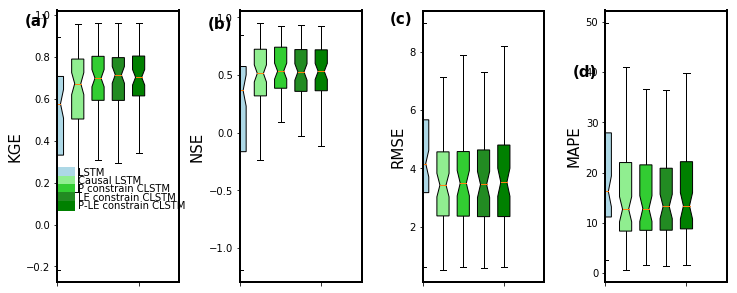

In [96]:
fig = plt.figure(figsize=(12,5))

#------------------------------------------------------------------------------------------------
ax1 = plt.subplot(1,4,1)

ax1.boxplot(df_7DD['KGE_LSTM'].values, 
                    notch=True,
                    patch_artist=True, 
                    showfliers=False,
                    positions=[0],
                    boxprops=dict(facecolor='lightblue', color='black'))

ax1.boxplot(df_7DD['KGE_CLSTM'].values, 
            boxprops=dict(facecolor='lightgreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.25])

ax1.boxplot(df_7DD_p['KGE_CLSTM'].values, 
            boxprops=dict(facecolor='limegreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.5])

ax1.boxplot(df_7DD_lh['KGE_CLSTM'].values, 
            boxprops=dict(facecolor='forestgreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.75])

ax1.boxplot(df_7DD_p_lh['KGE_CLSTM'].values, 
            boxprops=dict(facecolor='green', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[1])

ax1.set_ylabel('KGE', fontsize=15)
ax1.text(-0.4,0.95,'(a)',fontsize=15, fontweight='bold')
#------------------------------------------------------------------------------------------------
ax2 = plt.subplot(1, 4, 2)


ax2.boxplot(df_7DD['R2_LSTM'].values, 
                    notch=True,
                    patch_artist=True, 
                    showfliers=False,
                    positions=[0],
                    boxprops=dict(facecolor='lightblue', color='black'))

ax2.boxplot(df_7DD['R2_CLSTM'].values, 
            boxprops=dict(facecolor='lightgreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.25])

ax2.boxplot(df_7DD_p['R2_CLSTM'].values, 
            boxprops=dict(facecolor='limegreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.5])

ax2.boxplot(df_7DD_lh['R2_CLSTM'].values, 
            boxprops=dict(facecolor='forestgreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.75])

ax2.boxplot(df_7DD_p_lh['R2_CLSTM'].values, 
            boxprops=dict(facecolor='green', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[1])

ax2.set_ylabel('NSE', fontsize=15)
ax2.text(-0.4,0.905,'(b)',fontsize=15, fontweight='bold')

#------------------------------------------------------------------------------------------------
ax3 = plt.subplot(1, 4, 3)

ax3.boxplot(df_7DD['RMSE_LSTM'].values, 
                    notch=True,
                    patch_artist=True, 
                    showfliers=False,
                    positions=[0],
                    boxprops=dict(facecolor='lightblue', color='black'))

ax3.boxplot(df_7DD['RMSE_CLSTM'].values, 
            boxprops=dict(facecolor='lightgreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.25])

ax3.boxplot(df_7DD_p['RMSE_CLSTM'].values, 
            boxprops=dict(facecolor='limegreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.5])

ax3.boxplot(df_7DD_lh['RMSE_CLSTM'].values, 
            boxprops=dict(facecolor='forestgreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.75])

ax3.boxplot(df_7DD_p_lh['RMSE_CLSTM'].values, 
            boxprops=dict(facecolor='green', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[1])

ax3.set_ylabel('RMSE', fontsize=15)
ax3.text(-0.4,8.95,'(c)',fontsize=15, fontweight='bold')

#------------------------------------------------------------------------------------------------
ax4 = plt.subplot(1, 4, 4)


ax4.boxplot(df_7DD['MAPE_LSTM'].values, 
                    notch=True,
                    patch_artist=True, 
                    showfliers=False,
                    positions=[0],
                    boxprops=dict(facecolor='lightblue', color='black'))

ax4.boxplot(df_7DD['MAPE_CLSTM'].values, 
            boxprops=dict(facecolor='lightgreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.25])

ax4.boxplot(df_7DD_p['MAPE_CLSTM'].values, 
            boxprops=dict(facecolor='limegreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.5])

ax4.boxplot(df_7DD_lh['MAPE_CLSTM'].values, 
            boxprops=dict(facecolor='forestgreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.75])

ax4.boxplot(df_7DD_p_lh['MAPE_CLSTM'].values, 
            boxprops=dict(facecolor='green', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[1])

ax4.set_ylabel('MAPE', fontsize=15)
ax4.text(-0.4,39,'(d)',fontsize=15, fontweight='bold')

#------------------------------------------------------------------------------------------------
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xticks([0,1])
    ax.set_xticklabels(['',''])

    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    

ax1.plot([-0.2,0.15], [0.25,0.25], color='lightblue', linewidth=10)
ax1.plot([-0.2, 0.15], [0.21, 0.21], color='lightgreen', linewidth=10)
ax1.plot([-0.2,0.15], [0.17,0.17], color='limegreen', linewidth=10)
ax1.plot([-0.2, 0.15], [0.13, 0.13], color='forestgreen', linewidth=10)
ax1.plot([-0.2,0.15], [0.09,0.09], color='green', linewidth=10)
ax1.text(0.25, 0.235, 'LSTM')
ax1.text(0.25, 0.195, 'Causal LSTM')
ax1.text(0.25, 0.155, 'P constrain CLSTM')
ax1.text(0.25, 0.115, 'LE constrain CLSTM')
ax1.text(0.25, 0.075, 'P-LE constrain CLSTM')

plt.subplots_adjust(wspace=0.5, hspace=0.05)

plt.savefig('figureS4.pdf')

In [97]:
c_clstm_p = np.zeros((len(site_name_list),))
c_clstm_lh = np.zeros((len(site_name_list),))
c_clstm_p_lh = np.zeros((len(site_name_list),))
c_clstm = np.zeros((len(site_name_list),))
c_lstm = np.zeros((len(site_name_list),))
c_ob = np.zeros((len(site_name_list),))

for k,name_ in enumerate(site_name_list):
        
    output = np.load( '/hard/lilu/clstmcases/7DD_threshold-0.5/output/'+name_+'_out.npy')
    feature = np.load( '/hard/lilu/clstmcases/7DD_threshold-0.5/output/'+name_+'_feature.npy')

    output_p = np.load( '/hard/lilu/pclstmcases/p_constrain/output/'+name_+'_out.npy')
    output_lh = np.load( '/hard/lilu/pclstmcases/lh_constrain/output/'+name_+'_out.npy')
    output_p_lh = np.load( '/hard/lilu/pclstmcases/p_lh_constrain/output/'+name_+'_out.npy')
    
    p = feature[:,5]
    clstm_p = output_p[:,2]
    clstm_lh = output_lh[:,2]
    clstm_p_lh = output_p_lh[:,2]
    clstm = output[:,2]
    lstm = output[:,1]
    ob = output[:,-1]

    count_clstm_p = 0
    count_clstm_lh = 0
    count_clstm_p_lh = 0
    count_clstm = 0
    count_lstm = 0
    count = 0

    for i in range(p.shape[0]):
        if p[i-1] == 0 and p[i] > 20:
            if ob[i]-ob[i-1]>0:
                if clstm[i]-clstm[i-1] > 0:
                    count_clstm += 1
                if lstm[i]-lstm[i-1]>0:
                    count_lstm +=1
                if clstm_p[i]-clstm_p[i-1] > 0:
                    count_clstm_p += 1
                if clstm_lh[i]-clstm_lh[i-1]>0:
                    count_clstm_lh +=1
                if clstm_p_lh[i]-clstm_p_lh[i-1]>0:
                    count_clstm_p_lh +=1
                    
                count +=1
    
    c_clstm_p[k] = count_clstm_p
    c_clstm_lh[k] = count_clstm_lh
    c_clstm_p_lh[k] = count_clstm_p_lh
    c_clstm[k] = count_clstm
    c_lstm[k] = count_lstm
    c_ob[k] = count

In [98]:
len(np.where((c_clstm >= c_clstm_p) & (c_clstm >= c_clstm_lh) & (c_clstm >= c_clstm_p_lh))[0])

52

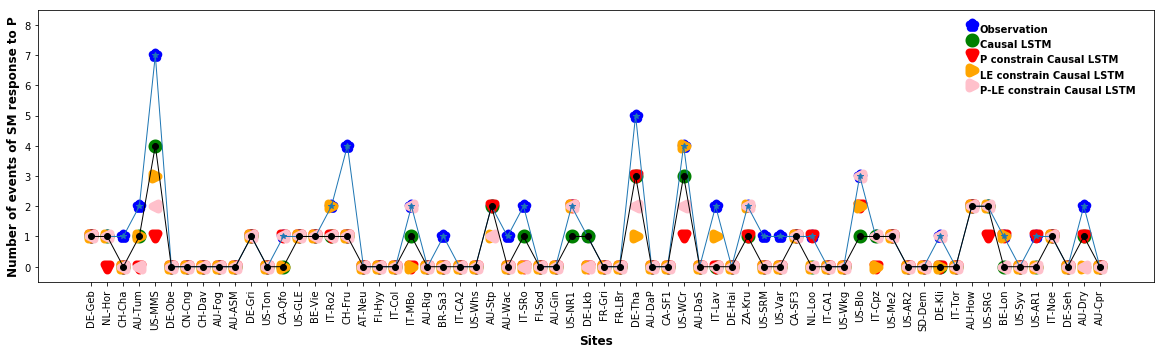

In [99]:
plt.figure(figsize=(20,5))
ax = plt.subplot(111)
plt.scatter(np.arange(len(site_name_list)),c_ob, marker='*', linewidth=8,c='blue')
plt.plot(np.arange(len(site_name_list)),c_ob, marker='*', linewidth=1)

#plt.scatter(np.arange(len(site_name_list)),c_lstm, marker='^', linewidth=3)
#plt.plot(np.arange(len(site_name_list)),c_lstm, marker='^', linewidth=3)

plt.scatter(np.arange(len(site_name_list)),c_clstm, marker='o', linewidth=8, c='green')
plt.plot(np.arange(len(site_name_list)),c_clstm, marker='o', linewidth=1, c='black')

plt.scatter(np.arange(len(site_name_list)),c_clstm_p, marker='v', linewidth=8, c='red')
plt.scatter(np.arange(len(site_name_list)),c_clstm_lh, marker='>', linewidth=8, c='orange')
plt.scatter(np.arange(len(site_name_list)),c_clstm_p_lh, marker='<', linewidth=8, c='pink')
plt.xlabel('Sites',fontweight='bold',fontsize=12)
plt.ylabel('Number of events of SM response to P',fontweight='bold',fontsize=12)
#plt.legend(['ob','clstm','clstm_p','clstm_lh','clstm_p_lh'])

ax.set_xticks(np.arange(len(site_name_list)))
ax.set_xticklabels(site_name_list, rotation=90)


plt.scatter(55, 8, marker='*',c='blue',linewidth=8)
plt.text(55.5, 7.75, 'Observation', fontweight='bold',fontsize=10)
plt.scatter(55, 7.5, marker='o',c='green',linewidth=8)
plt.text(55.5, 7.25, 'Causal LSTM', fontweight='bold',fontsize=10)
plt.scatter(55, 7, marker='v',c='red',linewidth=8)
plt.text(55.5, 6.75, 'P constrain Causal LSTM', fontweight='bold',fontsize=10)
plt.scatter(55, 6.5, marker='>',c='orange',linewidth=8)
plt.text(55.5, 6.25, 'LE constrain Causal LSTM', fontweight='bold',fontsize=10)
plt.scatter(55, 6, marker='>',c='pink',linewidth=8)
plt.text(55.5, 5.75, 'P-LE constrain Causal LSTM', fontweight='bold',fontsize=10)

plt.savefig('figureS5.pdf')

In [100]:
a = df_7DD_p['KGE_CLSTM']-df_7DD['KGE_CLSTM']
a = a.values
idx_improve = np.argsort(a)
idx_improve

array([ 9, 53, 41, 31, 22, 63, 56, 37, 23, 16, 24, 35, 55, 45, 17, 12, 29,
       61,  6,  3,  0,  1,  2, 20, 15, 28, 13,  4,  5, 30, 49, 46, 19, 47,
       42, 43, 58, 48, 33, 52, 44, 18, 38, 27, 60, 39, 32, 14, 54, 34, 40,
       36, 50,  8, 62, 25, 26, 21, 51, 57, 59, 11,  7, 10, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

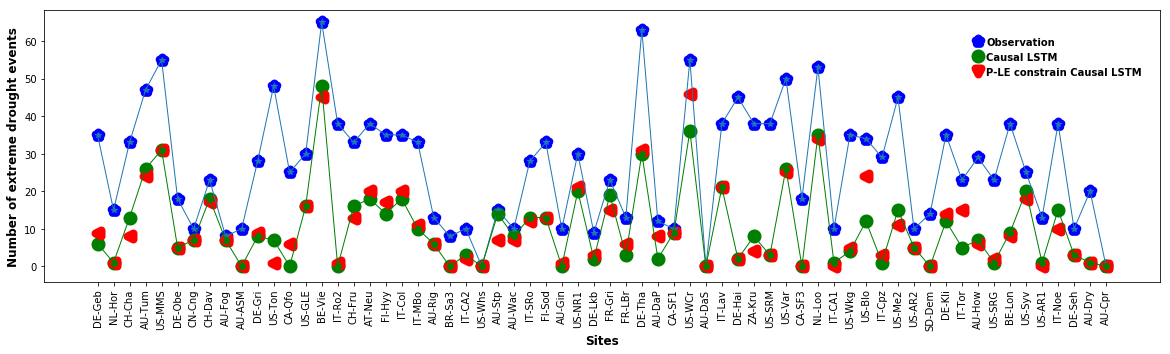

In [102]:
c_clstm_p = np.zeros((len(site_name_list),))
c_clstm_lh = np.zeros((len(site_name_list),))
c_clstm_p_lh = np.zeros((len(site_name_list),))
c_clstm = np.zeros((len(site_name_list),))
c_lstm = np.zeros((len(site_name_list),))
c_ob = np.zeros((len(site_name_list),))

for k, name_ in enumerate(site_name_list):
    output = np.load( '/hard/lilu/clstmcases/7DD_threshold-0.5/output/'+name_+'_out.npy')
    feature = np.load( '/hard/lilu/clstmcases/7DD_threshold-0.5/output/'+name_+'_feature.npy')

    output_p = np.load( '/hard/lilu/pclstmcases/p_constrain/output/'+name_+'_out.npy')
    output_lh = np.load( '/hard/lilu/pclstmcases/lh_constrain/output/'+name_+'_out.npy')
    output_p_lh = np.load( '/hard/lilu/pclstmcases/p_lh_constrain/output/'+name_+'_out.npy')
    
    SWDI = SWDIcount(output[:,-1])   
    SWDI_clstm = SWDIcount(output[:,2])   
    SWDI_p = SWDIcount(output_p[:,2])   
    SWDI_lh = SWDIcount(output_lh[:,2])   
    SWDI_p_lh = SWDIcount(output_p_lh[:,2])   

    count_clstm_p = 0
    count_clstm_lh = 0
    count_clstm_p_lh = 0
    count_clstm = 0
    count_lstm = 0
    count = 0

    """
    for i in range(SWDI.shape[0]):
        if (SWDI[i]<-5) and (SWDI[i]>-10):
            if (SWDI_clstm[i]<-5) and (SWDI_clstm[i]>-10):
                count_clstm += 1
            if (SWDI_p[i]<-5) and (SWDI_p[i]>-10):
                count_clstm_p += 1
            if (SWDI_lh[i]<-5) and (SWDI_lh[i]>-10):
                count_clstm_lh += 1
            if (SWDI_p_lh[i]<-5) and (SWDI_p_lh[i]>-10):
                count_clstm_p_lh += 1
            count += 1    
    """
    
    for i in range(SWDI.shape[0]):
        if (SWDI[i]<-10):
            if (SWDI_clstm[i]<-10):
                count_clstm += 1
            if (SWDI_p[i]<-10):
                count_clstm_p += 1
            if (SWDI_lh[i]<-10):
                count_clstm_lh += 1
            if (SWDI_p_lh[i]<-10):
                count_clstm_p_lh += 1
            count += 1    
            
    c_clstm_p[k] = count_clstm_p
    c_clstm_lh[k] = count_clstm_lh
    c_clstm_p_lh[k] = count_clstm_p_lh
    c_clstm[k] = count_clstm
    c_lstm[k] = count_lstm
    c_ob[k] = count
                
plt.figure(figsize=(20,5))
ax = plt.subplot(111)
plt.scatter(np.arange(len(site_name_list)),c_ob, marker='*', linewidth=8,c='blue')
plt.plot(np.arange(len(site_name_list)),c_ob, marker='*', linewidth=1)

#plt.scatter(np.arange(len(site_name_list)),c_lstm, marker='^', linewidth=3)
#plt.plot(np.arange(len(site_name_list)),c_lstm, marker='^', linewidth=3)

plt.scatter(np.arange(len(site_name_list)),c_clstm, marker='o', linewidth=8, c='green')
plt.plot(np.arange(len(site_name_list)),c_clstm, marker='o', linewidth=1, c='green')

#plt.scatter(np.arange(len(site_name_list)),c_clstm_p, marker='v', linewidth=8, c='red')
#plt.plot(np.arange(len(site_name_list)),c_clstm_p, marker='v', linewidth=1, c='red')

#plt.scatter(np.arange(len(site_name_list)),c_clstm_lh, marker='>', linewidth=8, c='orange')
plt.scatter(np.arange(len(site_name_list)),c_clstm_p_lh, marker='<', linewidth=8, c='red')
plt.xlabel('Sites',fontweight='bold',fontsize=12)
plt.ylabel('Number of extreme drought events',fontweight='bold',fontsize=12)
#plt.legend(['ob','clstm','clstm_p','clstm_lh','clstm_p_lh'])

ax.set_xticks(np.arange(len(site_name_list)))
ax.set_xticklabels(site_name_list, rotation=90)

plt.scatter(55, 60, marker='*',c='blue',linewidth=8)
plt.text(55.5, 59, 'Observation', fontweight='bold',fontsize=10)
plt.scatter(55, 56, marker='o',c='green',linewidth=8)
plt.text(55.5, 55, 'Causal LSTM', fontweight='bold',fontsize=10)
#plt.scatter(55, 52, marker='v',c='red',linewidth=8)
#plt.text(55.5, 51, 'P constrain Causal LSTM', fontweight='bold',fontsize=10)
#plt.scatter(55, 48, marker='>',c='orange',linewidth=8)
#plt.text(55.5, 47, 'LE constrain Causal LSTM', fontweight='bold',fontsize=10)
plt.scatter(55, 52, marker='v',c='red',linewidth=8)
plt.text(55.5, 51, 'P-LE constrain Causal LSTM', fontweight='bold',fontsize=10)


#plt.ylim(0,20)
        
plt.savefig('figure11.pdf')

In [103]:
print(len(np.where(c_clstm_p>c_clstm)[0]))
print(len(np.where(c_clstm_p==c_clstm)[0]))
print(len(np.where(c_clstm_p<c_clstm)[0]))

24
23
17


In [104]:
a = c_clstm_p_lh-c_clstm
idx_improve = np.argsort(a)

1


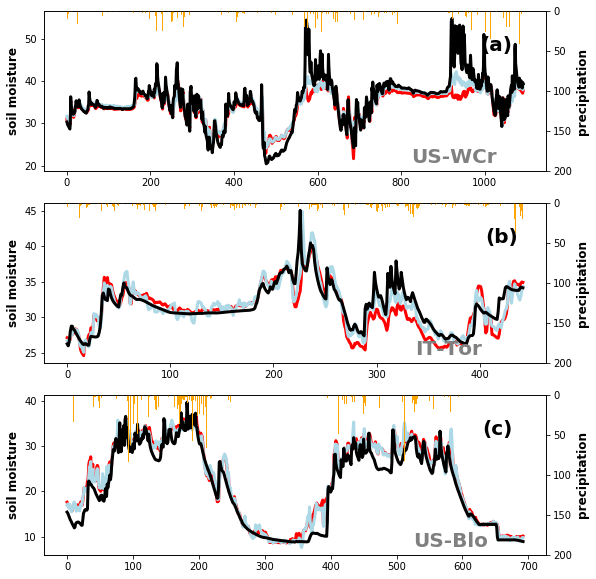

In [106]:
plt.figure(figsize=(9,10))

for i, idx_ in enumerate(idx_improve[-3:]):
    
    plt.subplot(3,1,i+1)
    name_ = site_name_list[idx_]
    
    output = np.load( '/hard/lilu/clstmcases/7DD_threshold-0.5/output/'+name_+'_out.npy')
    feature = np.load( '/hard/lilu/clstmcases/7DD_threshold-0.5/output/'+name_+'_feature.npy')

    output_p = np.load( '/hard/lilu/pclstmcases/p_constrain/output/'+name_+'_out.npy')
    output_lh = np.load( '/hard/lilu/pclstmcases/lh_constrain/output/'+name_+'_out.npy')
    output_p_lh = np.load( '/hard/lilu/pclstmcases/p_lh_constrain/output/'+name_+'_out.npy')
    
    plt.plot(output[7:, 2], color='red', linewidth=3)
    plt.plot(output_p[7:, 2], color='lightblue', linewidth=3)
    #plt.plot(output_lh[7:, 2], color='blue', linewidth=3)
    #plt.plot(output_p_lh[7:, 2], color='darkblue', linewidth=3)

    plt.plot(output[:-7, -1], color='black', linewidth=3)
    plt.ylabel('soil moisture', fontsize=12, fontweight='bold')

    if i==0:
        print('1')
        #plt.legend(['Causal LSTM', 'P-constrained Causal LSTM', 'LE-constrained Causal LSTM','P-LE-constrained Causal LSTM','Observation'])
    if i==4:
        plt.xlabel('Timestep', fontsize=20,fontweight='bold')
        
    ax1 = plt.twinx()
    plt.ylim(0,200)
    plt.ylabel('precipitation',fontsize=12, fontweight='bold')
    ax1.bar(x=np.arange(feature.shape[0]-7),height=feature[:-7,5], color='orange')

    plt.gca().invert_yaxis()

    plt.text(0.75*output.shape[0], 190, name_,color='grey',fontweight='bold', fontsize=20)
    plt.text(0.9*output.shape[0], 50, label[i],color='black',fontweight='bold', fontsize=20)
        
plt.savefig('figureS6.pdf')

# tune parameter tree level

In [36]:
path_output = '/hard/lilu/clstmcases/7DD_depth-2/output/'
path_loss = '/hard/lilu/clstmcases/7DD_depth-2/loss/'
path_info = '/hard/lilu/clstmcases/7DD_depth-2/info/'

l = glob.glob(path_output + '*' + '_out.npy', recursive=True)
N_sites = len(site_name_list)

# init
r = np.full((N_sites,3), np.nan)
nse = np.full((N_sites,3), np.nan)
rmse = np.full((N_sites,3), np.nan)
nrmse = np.full((N_sites,3), np.nan)
mape = np.full((N_sites,3), np.nan)
kge = np.full((N_sites,3), np.nan)
bias = np.full((N_sites,3), np.nan)
ttest = np.full((N_sites,2), 0)
length = np.full((N_sites,), np.nan)
tac = np.full((N_sites,), np.nan)

for i,name_ in enumerate(site_name_list):
        
    output = np.load(path_output+name_+'_out.npy')
    length[i] = output.shape[0]
    
    # cal metrics
    r[i,0] = pearsonr(output[:,-1], output[:,0])[0]
    r[i,1] = pearsonr(output[:,-1], output[:,1])[0]
    r[i, 2] = pearsonr(output[:, -1], output[:, 2])[0]
    
    kge[i,0],beta[i,0], gamma[i,0]  = cal_kge(output[:,-1], output[:,0])
    kge[i,1],beta[i,1], gamma[i,1] = cal_kge(output[:,-1], output[:,1])
    kge[i, 2],beta[i,2], gamma[i,2] = cal_kge(output[:, -1], output[:, 2])    
    
    nse[i,0] = r2_score(output[:,-1], output[:,0])
    nse[i,1] = r2_score(output[:,-1], output[:,1])
    nse[i, 2] = r2_score(output[:, -1], output[:, 2])
    
    rmse[i,0] = np.sqrt(mean_squared_error(output[:,-1], output[:,0]))
    rmse[i,1] = np.sqrt(mean_squared_error(output[:,-1], output[:,1]))
    rmse[i, 2] = np.sqrt(mean_squared_error(output[:, -1], output[:, 2]))

    
    nrmse[i,0] = np.sqrt(mean_squared_error(output[:,-1], output[:,0]))/np.nanmean(output[:,-1])
    nrmse[i,1] = np.sqrt(mean_squared_error(output[:,-1], output[:,1]))/np.nanmean(output[:,-1])
    nrmse[i, 2] = np.sqrt(mean_squared_error(output[:, -1], output[:, 2]))/np.nanmean(output[:,-1])
    
    mape[i,0] = cal_mape(output[:,-1], output[:,0])
    mape[i,1] = cal_mape(output[:,-1], output[:,1])  
    mape[i, 2] = cal_mape(output[:, -1], output[:, 2])
    
    bias[i,0] = np.mean(output[:, -1])-np.mean(output[:, 0])
    bias[i,1] = np.mean(output[:, -1])-np.mean(output[:, 1])
    bias[i, 2] = np.mean(output[:, -1])-np.mean(output[:, 2])

    tac[i] = cal_autocorr(output[:, -1], t=7)[0, 1]

    t, p = stats.ttest_ind(np.abs(output[:,2]-output[:,-1]), np.abs(output[:,-1]-output[:,1]),alternative='less')
    if p<0.05:
        ttest[i,0] = 1
    
    t, p = stats.ttest_ind(np.abs(output[:,2]-output[:,-1]), np.abs(output[:,-1]-output[:,1]),alternative='greater')
    if p<0.05:
        ttest[i,1] = 1

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


In [37]:
output_dict = {
    'SITE_NAME': site_name_list, 
    'BIAS_LSTM': bias[:,1],
    'BIAS_CLSTM': bias[:,2],
    'KGE_LSTM': kge[:,1],
    'KGE_CLSTM': kge[:,2],
    'R_LSTM': r[:,1],
    'R_CLSTM': r[:,2],
    'BETA_LSTM': beta[:,1],
    'BETA_CLSTM': beta[:,2],
    'GAMMA_LSTM': gamma[:,1],
    'GAMMA_CLSTM': gamma[:,2],
    'R2_LSTM': nse[:,1],
    'R2_CLSTM': nse[:,2],
    'RMSE_LSTM': rmse[:,1],
    'RMSE_CLSTM': rmse[:,2],
    'MAPE_LSTM': mape[:,1],
    'MAPE_CLSTM': mape[:,2]
}

pd.set_option('precision', 2)

df_7DD_depth_2 = pd.DataFrame(data=output_dict)

In [38]:
df_describe_7DD_depth_2 = df_7DD_depth_2.describe()

a = df_describe_7DD_depth_2['MAPE_LSTM'].values
a[np.isinf(a)] = np.nan

df_describe_7DD_depth_2['MAPE_LSTM']['std'] = np.nanstd(a)
df_describe_7DD_depth_2['MAPE_LSTM']['mean'] = np.nanmean(a)
df_describe_7DD_depth_2['MAPE_LSTM']['max'] = np.nanmax(a)

a = df_describe_7DD_depth_2['MAPE_CLSTM'].values
a[np.isinf(a)] = np.nan

df_describe_7DD_depth_2['MAPE_CLSTM']['std'] = np.nanstd(a)
df_describe_7DD_depth_2['MAPE_CLSTM']['mean'] = np.nanmean(a)
df_describe_7DD_depth_2['MAPE_CLSTM']['max'] = np.nanmax(a)

df_describe_7DD_depth_2

BIAS_LSTM  BIAS_CLSTM  KGE_LSTM  KGE_CLSTM  R_LSTM  R_CLSTM  BETA_LSTM  \
count      64.00       64.00     64.00      64.00   64.00    64.00      64.00   
mean        0.06        0.02      0.55       0.67    0.65     0.76       1.00   
std         1.83        1.04      0.24       0.19    0.21     0.15       0.09   
min        -5.85       -3.63     -0.18      -0.01    0.07     0.26       0.77   
25%        -0.98       -0.51      0.40       0.57    0.54     0.70       0.96   
50%         0.08        0.06      0.62       0.69    0.69     0.78       0.99   
75%         1.10        0.62      0.72       0.81    0.82     0.88       1.04   
max         6.04        3.23      0.89       0.96    0.94     0.97       1.25   

       BETA_CLSTM  GAMMA_LSTM  GAMMA_CLSTM  R2_LSTM  R2_CLSTM  RMSE_LSTM  \
count       64.00       64.00        64.00    64.00     64.00      64.00   
mean         1.00        0.79         0.82     0.31      0.54       4.61   
std          0.05        0.20         0.17     0.38      0.24       3.03   
min          0.88        0.24         0.32    -0.82     -0.02       0.55   
25%          0.97        0.68         0.73     0.10      0.39       2.98   
50%          0.99        0.80         0.85     0.39      0.53       4.02   
75%          1.02        0.93         0.91     0.58      0.74       5.56   
max          1.16        1.33         1.21     0.86      0.93      22.00   

       RMSE_CLSTM  MAPE_LSTM  MAPE_CLSTM  
count       64.00      64.00       64.00  
mean         3.73      23.22       21.37  
std          2.35      21.38       22.27  
min          0.60       2.46        1.37  
25%          2.35      11.19        8.15  
50%          3.44      16.36       12.07  
75%          4.26      23.96       20.37  
max         16.82      64.00       64.00

In [39]:
path_output = '/hard/lilu/clstmcases/7DD_depth-4/output/'
path_loss = '/hard/lilu/clstmcases/7DD_depth-4/loss/'
path_info = '/hard/lilu/clstmcases/7DD_depth-4/info/'

l = glob.glob(path_output + '*' + '_out.npy', recursive=True)
N_sites = len(site_name_list)

# init
r = np.full((N_sites,3), np.nan)
nse = np.full((N_sites,3), np.nan)
rmse = np.full((N_sites,3), np.nan)
nrmse = np.full((N_sites,3), np.nan)
mape = np.full((N_sites,3), np.nan)
kge = np.full((N_sites,3), np.nan)
bias = np.full((N_sites,3), np.nan)
ttest = np.full((N_sites,2), 0)
length = np.full((N_sites,), np.nan)
tac = np.full((N_sites,), np.nan)

for i,name_ in enumerate(site_name_list):
        
    output = np.load(path_output+name_+'_out.npy')
    length[i] = output.shape[0]
    
    # cal metrics
    r[i,0] = pearsonr(output[:,-1], output[:,0])[0]
    r[i,1] = pearsonr(output[:,-1], output[:,1])[0]
    r[i, 2] = pearsonr(output[:, -1], output[:, 2])[0]
    
    kge[i,0],beta[i,0], gamma[i,0]  = cal_kge(output[:,-1], output[:,0])
    kge[i,1],beta[i,1], gamma[i,1] = cal_kge(output[:,-1], output[:,1])
    kge[i, 2],beta[i,2], gamma[i,2] = cal_kge(output[:, -1], output[:, 2])    
    
    nse[i,0] = r2_score(output[:,-1], output[:,0])
    nse[i,1] = r2_score(output[:,-1], output[:,1])
    nse[i, 2] = r2_score(output[:, -1], output[:, 2])
    
    rmse[i,0] = np.sqrt(mean_squared_error(output[:,-1], output[:,0]))
    rmse[i,1] = np.sqrt(mean_squared_error(output[:,-1], output[:,1]))
    rmse[i, 2] = np.sqrt(mean_squared_error(output[:, -1], output[:, 2]))

    
    nrmse[i,0] = np.sqrt(mean_squared_error(output[:,-1], output[:,0]))/np.nanmean(output[:,-1])
    nrmse[i,1] = np.sqrt(mean_squared_error(output[:,-1], output[:,1]))/np.nanmean(output[:,-1])
    nrmse[i, 2] = np.sqrt(mean_squared_error(output[:, -1], output[:, 2]))/np.nanmean(output[:,-1])
    
    mape[i,0] = cal_mape(output[:,-1], output[:,0])
    mape[i,1] = cal_mape(output[:,-1], output[:,1])  
    mape[i, 2] = cal_mape(output[:, -1], output[:, 2])
    
    bias[i,0] = np.mean(output[:, -1])-np.mean(output[:, 0])
    bias[i,1] = np.mean(output[:, -1])-np.mean(output[:, 1])
    bias[i, 2] = np.mean(output[:, -1])-np.mean(output[:, 2])

    tac[i] = cal_autocorr(output[:, -1], t=7)[0, 1]

    t, p = stats.ttest_ind(np.abs(output[:,2]-output[:,-1]), np.abs(output[:,-1]-output[:,1]),alternative='less')
    if p<0.05:
        ttest[i,0] = 1
    
    t, p = stats.ttest_ind(np.abs(output[:,2]-output[:,-1]), np.abs(output[:,-1]-output[:,1]),alternative='greater')
    if p<0.05:
        ttest[i,1] = 1

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


In [40]:
output_dict = {
    'SITE_NAME': site_name_list, 
    'BIAS_LSTM': bias[:,1],
    'BIAS_CLSTM': bias[:,2],
    'KGE_LSTM': kge[:,1],
    'KGE_CLSTM': kge[:,2],
    'R_LSTM': r[:,1],
    'R_CLSTM': r[:,2],
    'BETA_LSTM': beta[:,1],
    'BETA_CLSTM': beta[:,2],
    'GAMMA_LSTM': gamma[:,1],
    'GAMMA_CLSTM': gamma[:,2],
    'R2_LSTM': nse[:,1],
    'R2_CLSTM': nse[:,2],
    'RMSE_LSTM': rmse[:,1],
    'RMSE_CLSTM': rmse[:,2],
    'MAPE_LSTM': mape[:,1],
    'MAPE_CLSTM': mape[:,2]
}

pd.set_option('precision', 2)

df_7DD_depth_4 = pd.DataFrame(data=output_dict)

In [41]:
df_describe_7DD_depth_4 = df_7DD_depth_4.describe()

a = df_describe_7DD_depth_4['MAPE_LSTM'].values
a[np.isinf(a)] = np.nan

df_describe_7DD_depth_4['MAPE_LSTM']['std'] = np.nanstd(a)
df_describe_7DD_depth_4['MAPE_LSTM']['mean'] = np.nanmean(a)
df_describe_7DD_depth_4['MAPE_LSTM']['max'] = np.nanmax(a)

a = df_describe_7DD_depth_4['MAPE_CLSTM'].values
a[np.isinf(a)] = np.nan

df_describe_7DD_depth_4['MAPE_CLSTM']['std'] = np.nanstd(a)
df_describe_7DD_depth_4['MAPE_CLSTM']['mean'] = np.nanmean(a)
df_describe_7DD_depth_4['MAPE_CLSTM']['max'] = np.nanmax(a)

df_describe_7DD_depth_4

BIAS_LSTM  BIAS_CLSTM  KGE_LSTM  KGE_CLSTM  R_LSTM  R_CLSTM  BETA_LSTM  \
count   6.40e+01       64.00     64.00      64.00   64.00    64.00      64.00   
mean   -5.59e-03       -0.12      0.56       0.67    0.67     0.75       1.00   
std     1.80e+00        1.26      0.24       0.19    0.21     0.15       0.09   
min    -7.18e+00       -4.73     -0.09       0.03    0.07     0.32       0.75   
25%    -1.02e+00       -0.52      0.47       0.58    0.51     0.68       0.96   
50%    -7.38e-02       -0.04      0.64       0.69    0.70     0.74       1.00   
75%     1.05e+00        0.44      0.73       0.81    0.82     0.87       1.06   
max     5.99e+00        4.93      0.90       0.97    0.92     0.97       1.31   

       BETA_CLSTM  GAMMA_LSTM  GAMMA_CLSTM  R2_LSTM  R2_CLSTM  RMSE_LSTM  \
count       64.00       64.00        64.00    64.00     64.00      64.00   
mean         1.00        0.83         0.83     0.29      0.51       4.64   
std          0.06        0.25         0.18     0.41      0.26       3.16   
min          0.82        0.15         0.27    -1.09     -0.23       0.73   
25%          0.98        0.71         0.75     0.05      0.32       2.85   
50%          1.00        0.83         0.86     0.38      0.51       4.19   
75%          1.03        0.92         0.95     0.63      0.72       5.74   
max          1.21        1.77         1.20     0.84      0.93      23.16   

       RMSE_CLSTM  MAPE_LSTM  MAPE_CLSTM  
count       64.00      64.00       64.00  
mean         3.88      23.27       22.13  
std          2.40      21.71       22.12  
min          0.62       1.71        1.45  
25%          2.47      10.26        8.52  
50%          3.57      15.77       13.24  
75%          4.66      26.16       23.42  
max         15.52      64.00       64.00

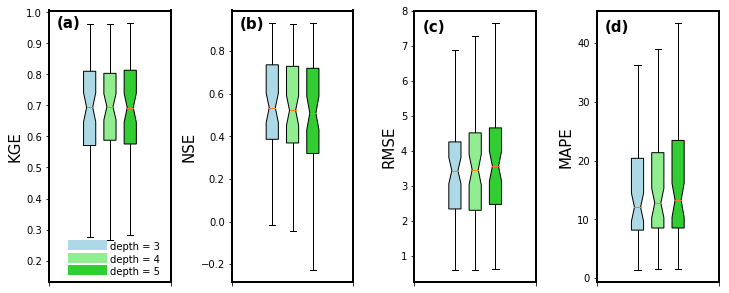

In [44]:
fig = plt.figure(figsize=(12,5))

#------------------------------------------------------------------------------------------------
ax1 = plt.subplot(1,4,1)

ax1.boxplot(df_7DD_depth_2['KGE_CLSTM'].values, 
                    notch=True,
                    patch_artist=True, 
                    showfliers=False,
                    positions=[0],
                    boxprops=dict(facecolor='lightblue', color='black'))

ax1.boxplot(df_7DD['KGE_CLSTM'].values, 
            boxprops=dict(facecolor='lightgreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.25])

ax1.boxplot(df_7DD_depth_4['KGE_CLSTM'].values, 
            boxprops=dict(facecolor='limegreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.5])

ax1.set_ylabel('KGE', fontsize=15)
ax1.text(-0.4,0.95,'(a)',fontsize=15, fontweight='bold')
#------------------------------------------------------------------------------------------------
ax2 = plt.subplot(1, 4, 2)


ax2.boxplot(df_7DD_depth_2['R2_CLSTM'].values, 
                    notch=True,
                    patch_artist=True, 
                    showfliers=False,
                    positions=[0],
                    boxprops=dict(facecolor='lightblue', color='black'))

ax2.boxplot(df_7DD['R2_CLSTM'].values, 
            boxprops=dict(facecolor='lightgreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.25])

ax2.boxplot(df_7DD_depth_4['R2_CLSTM'].values, 
            boxprops=dict(facecolor='limegreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.5])

ax2.set_ylabel('NSE', fontsize=15)
ax2.text(-0.4,0.905,'(b)',fontsize=15, fontweight='bold')

#------------------------------------------------------------------------------------------------
ax3 = plt.subplot(1, 4, 3)

ax3.boxplot(df_7DD_depth_2['RMSE_CLSTM'].values, 
                    notch=True,
                    patch_artist=True, 
                    showfliers=False,
                    positions=[0],
                    boxprops=dict(facecolor='lightblue', color='black'))

ax3.boxplot(df_7DD['RMSE_CLSTM'].values, 
            boxprops=dict(facecolor='lightgreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.25])

ax3.boxplot(df_7DD_depth_4['RMSE_CLSTM'].values, 
            boxprops=dict(facecolor='limegreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.5])

ax3.set_ylabel('RMSE', fontsize=15)
ax3.text(-0.4,7.4,'(c)',fontsize=15, fontweight='bold')

#------------------------------------------------------------------------------------------------
ax4 = plt.subplot(1, 4, 4)


ax4.boxplot(df_7DD_depth_2['MAPE_CLSTM'].values, 
                    notch=True,
                    patch_artist=True, 
                    showfliers=False,
                    positions=[0],
                    boxprops=dict(facecolor='lightblue', color='black'))

ax4.boxplot(df_7DD['MAPE_CLSTM'].values, 
            boxprops=dict(facecolor='lightgreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.25])

ax4.boxplot(df_7DD_depth_4['MAPE_CLSTM'].values, 
            boxprops=dict(facecolor='limegreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.5])

ax4.set_ylabel('MAPE', fontsize=15)
ax4.text(-0.4,42,'(d)',fontsize=15, fontweight='bold')

#------------------------------------------------------------------------------------------------
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xticks([-0.5,1])
    ax.set_xticklabels(['',''])

    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    

ax1.plot([-0.2,0.15], [0.25,0.25], color='lightblue', linewidth=10)
ax1.plot([-0.2, 0.15], [0.21, 0.21], color='lightgreen', linewidth=10)
ax1.plot([-0.2,0.15], [0.17,0.17], color='limegreen', linewidth=10)

ax1.text(0.25, 0.235, 'depth = 3')
ax1.text(0.25, 0.195, 'depth = 4')
ax1.text(0.25, 0.155, 'depth = 5')

plt.subplots_adjust(wspace=0.5, hspace=0.05)

plt.savefig('figureS7.pdf')

# threshold

In [45]:
path_output = '/hard/lilu/clstmcases/7DD_threshold-0.3/output/'
path_loss = '/hard/lilu/clstmcases/7DD_threshold-0.3/loss/'
path_info = '/hard/lilu/clstmcases/7DD_threshold-0.3/info/'

l = glob.glob(path_output + '*' + '_out.npy', recursive=True)
N_sites = len(site_name_list)

# init
r = np.full((N_sites,3), np.nan)
nse = np.full((N_sites,3), np.nan)
rmse = np.full((N_sites,3), np.nan)
nrmse = np.full((N_sites,3), np.nan)
mape = np.full((N_sites,3), np.nan)
kge = np.full((N_sites,3), np.nan)
bias = np.full((N_sites,3), np.nan)
ttest = np.full((N_sites,2), 0)
length = np.full((N_sites,), np.nan)
tac = np.full((N_sites,), np.nan)

for i,name_ in enumerate(site_name_list):
        
    output = np.load(path_output+name_+'_out.npy')
    length[i] = output.shape[0]
    
    # cal metrics
    r[i,0] = pearsonr(output[:,-1], output[:,0])[0]
    r[i,1] = pearsonr(output[:,-1], output[:,1])[0]
    r[i, 2] = pearsonr(output[:, -1], output[:, 2])[0]
    
    kge[i,0],beta[i,0], gamma[i,0]  = cal_kge(output[:,-1], output[:,0])
    kge[i,1],beta[i,1], gamma[i,1] = cal_kge(output[:,-1], output[:,1])
    kge[i, 2],beta[i,2], gamma[i,2] = cal_kge(output[:, -1], output[:, 2])    
    
    nse[i,0] = r2_score(output[:,-1], output[:,0])
    nse[i,1] = r2_score(output[:,-1], output[:,1])
    nse[i, 2] = r2_score(output[:, -1], output[:, 2])
    
    rmse[i,0] = np.sqrt(mean_squared_error(output[:,-1], output[:,0]))
    rmse[i,1] = np.sqrt(mean_squared_error(output[:,-1], output[:,1]))
    rmse[i, 2] = np.sqrt(mean_squared_error(output[:, -1], output[:, 2]))

    
    nrmse[i,0] = np.sqrt(mean_squared_error(output[:,-1], output[:,0]))/np.nanmean(output[:,-1])
    nrmse[i,1] = np.sqrt(mean_squared_error(output[:,-1], output[:,1]))/np.nanmean(output[:,-1])
    nrmse[i, 2] = np.sqrt(mean_squared_error(output[:, -1], output[:, 2]))/np.nanmean(output[:,-1])
    
    mape[i,0] = cal_mape(output[:,-1], output[:,0])
    mape[i,1] = cal_mape(output[:,-1], output[:,1])  
    mape[i, 2] = cal_mape(output[:, -1], output[:, 2])
    
    bias[i,0] = np.mean(output[:, -1])-np.mean(output[:, 0])
    bias[i,1] = np.mean(output[:, -1])-np.mean(output[:, 1])
    bias[i, 2] = np.mean(output[:, -1])-np.mean(output[:, 2])

    tac[i] = cal_autocorr(output[:, -1], t=7)[0, 1]

    t, p = stats.ttest_ind(np.abs(output[:,2]-output[:,-1]), np.abs(output[:,-1]-output[:,1]),alternative='less')
    if p<0.05:
        ttest[i,0] = 1
    
    t, p = stats.ttest_ind(np.abs(output[:,2]-output[:,-1]), np.abs(output[:,-1]-output[:,1]),alternative='greater')
    if p<0.05:
        ttest[i,1] = 1

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


In [46]:
output_dict = {
    'SITE_NAME': site_name_list, 
    'BIAS_LSTM': bias[:,1],
    'BIAS_CLSTM': bias[:,2],
    'KGE_LSTM': kge[:,1],
    'KGE_CLSTM': kge[:,2],
    'R_LSTM': r[:,1],
    'R_CLSTM': r[:,2],
    'BETA_LSTM': beta[:,1],
    'BETA_CLSTM': beta[:,2],
    'GAMMA_LSTM': gamma[:,1],
    'GAMMA_CLSTM': gamma[:,2],
    'R2_LSTM': nse[:,1],
    'R2_CLSTM': nse[:,2],
    'RMSE_LSTM': rmse[:,1],
    'RMSE_CLSTM': rmse[:,2],
    'MAPE_LSTM': mape[:,1],
    'MAPE_CLSTM': mape[:,2]
}

pd.set_option('precision', 2)

df_7DD_threshold_3 = pd.DataFrame(data=output_dict)

In [47]:
path_output = '/hard/lilu/clstmcases/7DD_threshold-0.7/output/'
path_loss = '/hard/lilu/clstmcases/7DD_threshold-0.7/loss/'
path_info = '/hard/lilu/clstmcases/7DD_threshold-0.7/info/'

l = glob.glob(path_output + '*' + '_out.npy', recursive=True)
N_sites = len(site_name_list)

# init
r = np.full((N_sites,3), np.nan)
nse = np.full((N_sites,3), np.nan)
rmse = np.full((N_sites,3), np.nan)
nrmse = np.full((N_sites,3), np.nan)
mape = np.full((N_sites,3), np.nan)
kge = np.full((N_sites,3), np.nan)
bias = np.full((N_sites,3), np.nan)
ttest = np.full((N_sites,2), 0)
length = np.full((N_sites,), np.nan)
tac = np.full((N_sites,), np.nan)

for i,name_ in enumerate(site_name_list):
        
    output = np.load(path_output+name_+'_out.npy')
    length[i] = output.shape[0]
    
    # cal metrics
    r[i,0] = pearsonr(output[:,-1], output[:,0])[0]
    r[i,1] = pearsonr(output[:,-1], output[:,1])[0]
    r[i, 2] = pearsonr(output[:, -1], output[:, 2])[0]
    
    kge[i,0],beta[i,0], gamma[i,0]  = cal_kge(output[:,-1], output[:,0])
    kge[i,1],beta[i,1], gamma[i,1] = cal_kge(output[:,-1], output[:,1])
    kge[i, 2],beta[i,2], gamma[i,2] = cal_kge(output[:, -1], output[:, 2])    
    
    nse[i,0] = r2_score(output[:,-1], output[:,0])
    nse[i,1] = r2_score(output[:,-1], output[:,1])
    nse[i, 2] = r2_score(output[:, -1], output[:, 2])
    
    rmse[i,0] = np.sqrt(mean_squared_error(output[:,-1], output[:,0]))
    rmse[i,1] = np.sqrt(mean_squared_error(output[:,-1], output[:,1]))
    rmse[i, 2] = np.sqrt(mean_squared_error(output[:, -1], output[:, 2]))

    
    nrmse[i,0] = np.sqrt(mean_squared_error(output[:,-1], output[:,0]))/np.nanmean(output[:,-1])
    nrmse[i,1] = np.sqrt(mean_squared_error(output[:,-1], output[:,1]))/np.nanmean(output[:,-1])
    nrmse[i, 2] = np.sqrt(mean_squared_error(output[:, -1], output[:, 2]))/np.nanmean(output[:,-1])
    
    mape[i,0] = cal_mape(output[:,-1], output[:,0])
    mape[i,1] = cal_mape(output[:,-1], output[:,1])  
    mape[i, 2] = cal_mape(output[:, -1], output[:, 2])
    
    bias[i,0] = np.mean(output[:, -1])-np.mean(output[:, 0])
    bias[i,1] = np.mean(output[:, -1])-np.mean(output[:, 1])
    bias[i, 2] = np.mean(output[:, -1])-np.mean(output[:, 2])

    tac[i] = cal_autocorr(output[:, -1], t=7)[0, 1]

    t, p = stats.ttest_ind(np.abs(output[:,2]-output[:,-1]), np.abs(output[:,-1]-output[:,1]),alternative='less')
    if p<0.05:
        ttest[i,0] = 1
    
    t, p = stats.ttest_ind(np.abs(output[:,2]-output[:,-1]), np.abs(output[:,-1]-output[:,1]),alternative='greater')
    if p<0.05:
        ttest[i,1] = 1

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


In [51]:
output_dict = {
    'SITE_NAME': site_name_list, 
    'BIAS_LSTM': bias[:,1],
    'BIAS_CLSTM': bias[:,2],
    'KGE_LSTM': kge[:,1],
    'KGE_CLSTM': kge[:,2],
    'R_LSTM': r[:,1],
    'R_CLSTM': r[:,2],
    'BETA_LSTM': beta[:,1],
    'BETA_CLSTM': beta[:,2],
    'GAMMA_LSTM': gamma[:,1],
    'GAMMA_CLSTM': gamma[:,2],
    'R2_LSTM': nse[:,1],
    'R2_CLSTM': nse[:,2],
    'RMSE_LSTM': rmse[:,1],
    'RMSE_CLSTM': rmse[:,2],
    'MAPE_LSTM': mape[:,1],
    'MAPE_CLSTM': mape[:,2]
}

pd.set_option('precision', 2)

df_7DD_threshold_7 = pd.DataFrame(data=output_dict)

In [52]:
df_describe_7DD = df_7DD_threshold_7.describe()

a = df_describe_7DD['MAPE_LSTM'].values
a[np.isinf(a)] = np.nan

df_describe_7DD['MAPE_LSTM']['std'] = np.nanstd(a)
df_describe_7DD['MAPE_LSTM']['mean'] = np.nanmean(a)
df_describe_7DD['MAPE_LSTM']['max'] = np.nanmax(a)

a = df_describe_7DD['MAPE_CLSTM'].values
a[np.isinf(a)] = np.nan

df_describe_7DD['MAPE_CLSTM']['std'] = np.nanstd(a)
df_describe_7DD['MAPE_CLSTM']['mean'] = np.nanmean(a)
df_describe_7DD['MAPE_CLSTM']['max'] = np.nanmax(a)

df_describe_7DD

BIAS_LSTM  BIAS_CLSTM  KGE_LSTM  KGE_CLSTM  R_LSTM  R_CLSTM  BETA_LSTM  \
count   6.40e+01       64.00     64.00      64.00   64.00    64.00      64.00   
mean   -1.90e-03       -0.10      0.54       0.67    0.65     0.76       1.00   
std     2.06e+00        1.07      0.25       0.19    0.23     0.15       0.09   
min    -9.05e+00       -4.60     -0.25       0.02   -0.18     0.28       0.76   
25%    -6.82e-01       -0.57      0.41       0.58    0.52     0.68       0.96   
50%    -1.32e-02       -0.03      0.61       0.71    0.70     0.78       1.00   
75%     1.02e+00        0.51      0.72       0.81    0.81     0.88       1.04   
max     5.69e+00        3.01      0.90       0.96    0.93     0.99       1.32   

       BETA_CLSTM  GAMMA_LSTM  GAMMA_CLSTM  R2_LSTM  R2_CLSTM  RMSE_LSTM  \
count       64.00       64.00        64.00    64.00     64.00      64.00   
mean         1.00        0.79         0.83     0.29      0.54       4.60   
std          0.05        0.22         0.18     0.45      0.25       2.92   
min          0.89        0.18         0.26    -1.29     -0.19       0.61   
25%          0.98        0.70         0.74     0.10      0.40       3.02   
50%          1.00        0.80         0.85     0.40      0.54       4.13   
75%          1.02        0.91         0.93     0.58      0.74       5.30   
max          1.20        1.32         1.21     0.85      0.95      20.87   

       RMSE_CLSTM  MAPE_LSTM  MAPE_CLSTM  
count       64.00      64.00       64.00  
mean         3.70      23.24       21.42  
std          2.21      21.48       22.38  
min          0.52       2.54        0.65  
25%          2.36      10.51        8.15  
50%          3.33      16.01       12.24  
75%          4.23      24.91       21.13  
max         15.00      64.00       64.00

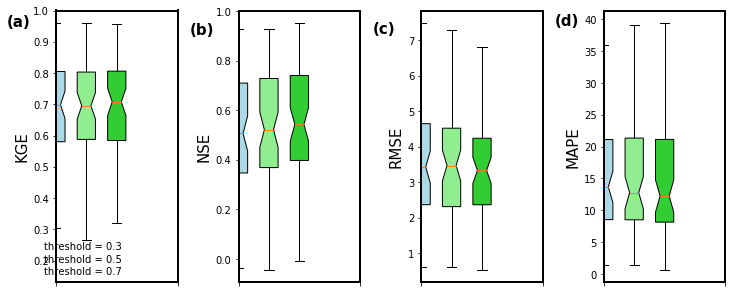

In [49]:
fig = plt.figure(figsize=(12,5))

#------------------------------------------------------------------------------------------------
ax1 = plt.subplot(1,4,1)

ax1.boxplot(df_7DD_threshold_3['KGE_CLSTM'].values, 
                    notch=True,
                    patch_artist=True, 
                    showfliers=False,
                    positions=[0],
                    boxprops=dict(facecolor='lightblue', color='black'))

ax1.boxplot(df_7DD['KGE_CLSTM'].values, 
            boxprops=dict(facecolor='lightgreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.25])

ax1.boxplot(df_7DD_threshold_7['KGE_CLSTM'].values, 
            boxprops=dict(facecolor='limegreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.5])

ax1.set_ylabel('KGE', fontsize=15)
ax1.text(-0.4,0.95,'(a)',fontsize=15, fontweight='bold')
#------------------------------------------------------------------------------------------------
ax2 = plt.subplot(1, 4, 2)

ax2.boxplot(df_7DD_threshold_3['R2_CLSTM'].values, 
                    notch=True,
                    patch_artist=True, 
                    showfliers=False,
                    positions=[0],
                    boxprops=dict(facecolor='lightblue', color='black'))

ax2.boxplot(df_7DD['R2_CLSTM'].values, 
            boxprops=dict(facecolor='lightgreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.25])

ax2.boxplot(df_7DD_threshold_7['R2_CLSTM'].values, 
            boxprops=dict(facecolor='limegreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.5])

ax2.set_ylabel('NSE', fontsize=15)
ax2.text(-0.4,0.905,'(b)',fontsize=15, fontweight='bold')

#------------------------------------------------------------------------------------------------
ax3 = plt.subplot(1, 4, 3)

ax3.boxplot(df_7DD_threshold_3['RMSE_CLSTM'].values, 
                    notch=True,
                    patch_artist=True, 
                    showfliers=False,
                    positions=[0],
                    boxprops=dict(facecolor='lightblue', color='black'))

ax3.boxplot(df_7DD['RMSE_CLSTM'].values, 
            boxprops=dict(facecolor='lightgreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.25])

ax3.boxplot(df_7DD_threshold_7['RMSE_CLSTM'].values, 
            boxprops=dict(facecolor='limegreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.5])

ax3.set_ylabel('RMSE', fontsize=15)
ax3.text(-0.4,7.2,'(c)',fontsize=15, fontweight='bold')

#------------------------------------------------------------------------------------------------
ax4 = plt.subplot(1, 4, 4)


ax4.boxplot(df_7DD_threshold_3['MAPE_CLSTM'].values, 
                    notch=True,
                    patch_artist=True, 
                    showfliers=False,
                    positions=[0],
                    boxprops=dict(facecolor='lightblue', color='black'))

ax4.boxplot(df_7DD['MAPE_CLSTM'].values, 
            boxprops=dict(facecolor='lightgreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.25])

ax4.boxplot(df_7DD_threshold_7['MAPE_CLSTM'].values, 
            boxprops=dict(facecolor='limegreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.5])

ax4.set_ylabel('MAPE', fontsize=15)
ax4.text(-0.4,39,'(d)',fontsize=15, fontweight='bold')

#------------------------------------------------------------------------------------------------
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xticks([0,1])
    ax.set_xticklabels(['',''])

    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    

ax1.plot([-0.4,-0.2], [0.25,0.25], color='lightblue', linewidth=10)
ax1.plot([-0.4,-0.2], [0.21, 0.21], color='lightgreen', linewidth=10)
ax1.plot([-0.4,-0.2], [0.17,0.17], color='limegreen', linewidth=10)

ax1.text(-0.1, 0.235, 'threshold = 0.3')
ax1.text(-0.1, 0.195, 'threshold = 0.5')
ax1.text(-0.1, 0.155, 'threshold = 0.7')

plt.subplots_adjust(wspace=0.5, hspace=0.05)

plt.savefig('figureS8.pdf')

# Different impact on inputs

In [63]:
path_output = '/hard/lilu/clstmcases/7DD_forcing/output/'
path_loss = '/hard/lilu/clstmcases/7DD_forcing/loss/'
path_info = '/hard/lilu/clstmcases/7DD_forcing/info/'

l = glob.glob(path_output + '*' + '_out.npy', recursive=True)
N_sites = len(site_name_list)

# init
r = np.full((N_sites,3), np.nan)
nse = np.full((N_sites,3), np.nan)
rmse = np.full((N_sites,3), np.nan)
nrmse = np.full((N_sites,3), np.nan)
mape = np.full((N_sites,3), np.nan)
kge = np.full((N_sites,3), np.nan)
bias = np.full((N_sites,3), np.nan)
ttest = np.full((N_sites,2), 0)
length = np.full((N_sites,), np.nan)
tac = np.full((N_sites,), np.nan)

for i,name_ in enumerate(site_name_list):
        
    output = np.load(path_output+name_+'_out.npy')
    length[i] = output.shape[0]
    
    # cal metrics
    r[i,0] = pearsonr(output[:,-1], output[:,0])[0]
    r[i,1] = pearsonr(output[:,-1], output[:,1])[0]
    r[i, 2] = pearsonr(output[:, -1], output[:, 2])[0]
    
    kge[i,0],beta[i,0], gamma[i,0]  = cal_kge(output[:,-1], output[:,0])
    kge[i,1],beta[i,1], gamma[i,1] = cal_kge(output[:,-1], output[:,1])
    kge[i, 2],beta[i,2], gamma[i,2] = cal_kge(output[:, -1], output[:, 2])    
    
    nse[i,0] = r2_score(output[:,-1], output[:,0])
    nse[i,1] = r2_score(output[:,-1], output[:,1])
    nse[i, 2] = r2_score(output[:, -1], output[:, 2])
    
    rmse[i,0] = np.sqrt(mean_squared_error(output[:,-1], output[:,0]))
    rmse[i,1] = np.sqrt(mean_squared_error(output[:,-1], output[:,1]))
    rmse[i, 2] = np.sqrt(mean_squared_error(output[:, -1], output[:, 2]))

    
    nrmse[i,0] = np.sqrt(mean_squared_error(output[:,-1], output[:,0]))/np.nanmean(output[:,-1])
    nrmse[i,1] = np.sqrt(mean_squared_error(output[:,-1], output[:,1]))/np.nanmean(output[:,-1])
    nrmse[i, 2] = np.sqrt(mean_squared_error(output[:, -1], output[:, 2]))/np.nanmean(output[:,-1])
    
    mape[i,0] = cal_mape(output[:,-1], output[:,0])
    mape[i,1] = cal_mape(output[:,-1], output[:,1])  
    mape[i, 2] = cal_mape(output[:, -1], output[:, 2])
    
    bias[i,0] = np.mean(output[:, -1])-np.mean(output[:, 0])
    bias[i,1] = np.mean(output[:, -1])-np.mean(output[:, 1])
    bias[i, 2] = np.mean(output[:, -1])-np.mean(output[:, 2])

    tac[i] = cal_autocorr(output[:, -1], t=7)[0, 1]

    t, p = stats.ttest_ind(np.abs(output[:,2]-output[:,-1]), np.abs(output[:,-1]-output[:,1]),alternative='less')
    if p<0.05:
        ttest[i,0] = 1
    
    t, p = stats.ttest_ind(np.abs(output[:,2]-output[:,-1]), np.abs(output[:,-1]-output[:,1]),alternative='greater')
    if p<0.05:
        ttest[i,1] = 1

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


In [64]:
output_dict = {
    'SITE_NAME': site_name_list, 
    'BIAS_LSTM': bias[:,1],
    'BIAS_CLSTM': bias[:,2],
    'KGE_LSTM': kge[:,1],
    'KGE_CLSTM': kge[:,2],
    'R_LSTM': r[:,1],
    'R_CLSTM': r[:,2],
    'BETA_LSTM': beta[:,1],
    'BETA_CLSTM': beta[:,2],
    'GAMMA_LSTM': gamma[:,1],
    'GAMMA_CLSTM': gamma[:,2],
    'R2_LSTM': nse[:,1],
    'R2_CLSTM': nse[:,2],
    'RMSE_LSTM': rmse[:,1],
    'RMSE_CLSTM': rmse[:,2],
    'MAPE_LSTM': mape[:,1],
    'MAPE_CLSTM': mape[:,2]
}

pd.set_option('precision', 2)

df_7DD_forcing = pd.DataFrame(data=output_dict)

In [65]:
path_output = '/hard/lilu/clstmcases/7DD_forcing_energy/output/'
path_loss = '/hard/lilu/clstmcases/7DD_forcing_energy/loss/'
path_info = '/hard/lilu/clstmcases/7DD_forcing_energy/info/'

l = glob.glob(path_output + '*' + '_out.npy', recursive=True)
N_sites = len(site_name_list)

# init
r = np.full((N_sites,3), np.nan)
nse = np.full((N_sites,3), np.nan)
rmse = np.full((N_sites,3), np.nan)
nrmse = np.full((N_sites,3), np.nan)
mape = np.full((N_sites,3), np.nan)
kge = np.full((N_sites,3), np.nan)
bias = np.full((N_sites,3), np.nan)
ttest = np.full((N_sites,2), 0)
length = np.full((N_sites,), np.nan)
tac = np.full((N_sites,), np.nan)

for i,name_ in enumerate(site_name_list):
        
    output = np.load(path_output+name_+'_out.npy')
    length[i] = output.shape[0]
    
    # cal metrics
    r[i,0] = pearsonr(output[:,-1], output[:,0])[0]
    r[i,1] = pearsonr(output[:,-1], output[:,1])[0]
    r[i, 2] = pearsonr(output[:, -1], output[:, 2])[0]
    
    kge[i,0],beta[i,0], gamma[i,0]  = cal_kge(output[:,-1], output[:,0])
    kge[i,1],beta[i,1], gamma[i,1] = cal_kge(output[:,-1], output[:,1])
    kge[i, 2],beta[i,2], gamma[i,2] = cal_kge(output[:, -1], output[:, 2])    
    
    nse[i,0] = r2_score(output[:,-1], output[:,0])
    nse[i,1] = r2_score(output[:,-1], output[:,1])
    nse[i, 2] = r2_score(output[:, -1], output[:, 2])
    
    rmse[i,0] = np.sqrt(mean_squared_error(output[:,-1], output[:,0]))
    rmse[i,1] = np.sqrt(mean_squared_error(output[:,-1], output[:,1]))
    rmse[i, 2] = np.sqrt(mean_squared_error(output[:, -1], output[:, 2]))

    
    nrmse[i,0] = np.sqrt(mean_squared_error(output[:,-1], output[:,0]))/np.nanmean(output[:,-1])
    nrmse[i,1] = np.sqrt(mean_squared_error(output[:,-1], output[:,1]))/np.nanmean(output[:,-1])
    nrmse[i, 2] = np.sqrt(mean_squared_error(output[:, -1], output[:, 2]))/np.nanmean(output[:,-1])
    
    mape[i,0] = cal_mape(output[:,-1], output[:,0])
    mape[i,1] = cal_mape(output[:,-1], output[:,1])  
    mape[i, 2] = cal_mape(output[:, -1], output[:, 2])
    
    bias[i,0] = np.mean(output[:, -1])-np.mean(output[:, 0])
    bias[i,1] = np.mean(output[:, -1])-np.mean(output[:, 1])
    bias[i, 2] = np.mean(output[:, -1])-np.mean(output[:, 2])

    tac[i] = cal_autocorr(output[:, -1], t=7)[0, 1]

    t, p = stats.ttest_ind(np.abs(output[:,2]-output[:,-1]), np.abs(output[:,-1]-output[:,1]),alternative='less')
    if p<0.05:
        ttest[i,0] = 1
    
    t, p = stats.ttest_ind(np.abs(output[:,2]-output[:,-1]), np.abs(output[:,-1]-output[:,1]),alternative='greater')
    if p<0.05:
        ttest[i,1] = 1

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


In [66]:
output_dict = {
    'SITE_NAME': site_name_list, 
    'BIAS_LSTM': bias[:,1],
    'BIAS_CLSTM': bias[:,2],
    'KGE_LSTM': kge[:,1],
    'KGE_CLSTM': kge[:,2],
    'R_LSTM': r[:,1],
    'R_CLSTM': r[:,2],
    'BETA_LSTM': beta[:,1],
    'BETA_CLSTM': beta[:,2],
    'GAMMA_LSTM': gamma[:,1],
    'GAMMA_CLSTM': gamma[:,2],
    'R2_LSTM': nse[:,1],
    'R2_CLSTM': nse[:,2],
    'RMSE_LSTM': rmse[:,1],
    'RMSE_CLSTM': rmse[:,2],
    'MAPE_LSTM': mape[:,1],
    'MAPE_CLSTM': mape[:,2]
}

pd.set_option('precision', 2)

df_7DD_forcing_energy = pd.DataFrame(data=output_dict)

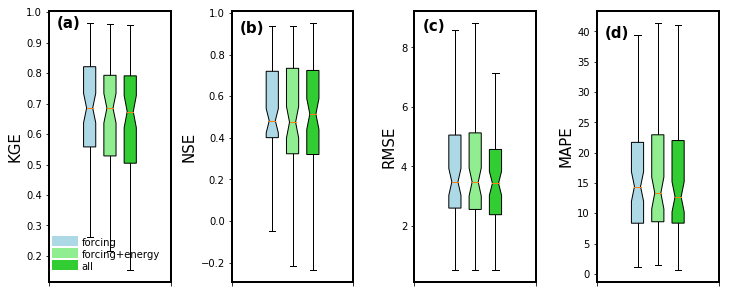

In [69]:
fig = plt.figure(figsize=(12,5))

#------------------------------------------------------------------------------------------------
ax1 = plt.subplot(1,4,1)

ax1.boxplot(df_7DD_forcing['KGE_CLSTM'].values, 
                    notch=True,
                    patch_artist=True, 
                    showfliers=False,
                    positions=[0],
                    boxprops=dict(facecolor='lightblue', color='black'))

ax1.boxplot(df_7DD_forcing_energy['KGE_CLSTM'].values, 
                    notch=True,
                    patch_artist=True, 
                    showfliers=False,
                    positions=[0.25],
                    boxprops=dict(facecolor='lightgreen', color='black'))

ax1.boxplot(df_7DD['KGE_CLSTM'].values, 
            boxprops=dict(facecolor='limegreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.5])

ax1.set_ylabel('KGE', fontsize=15)
ax1.text(-0.4,0.95,'(a)',fontsize=15, fontweight='bold')
#------------------------------------------------------------------------------------------------
ax2 = plt.subplot(1, 4, 2)

ax2.boxplot(df_7DD_forcing['R2_CLSTM'].values, 
                    notch=True,
                    patch_artist=True, 
                    showfliers=False,
                    positions=[0],
                    boxprops=dict(facecolor='lightblue', color='black'))

ax2.boxplot(df_7DD_forcing_energy['R2_CLSTM'].values, 
                    notch=True,
                    patch_artist=True, 
                    showfliers=False,
                    positions=[0.25],
                    boxprops=dict(facecolor='lightgreen', color='black'))


ax2.boxplot(df_7DD['R2_CLSTM'].values, 
            boxprops=dict(facecolor='limegreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.5])

ax2.set_ylabel('NSE', fontsize=15)
ax2.text(-0.4,0.905,'(b)',fontsize=15, fontweight='bold')

#------------------------------------------------------------------------------------------------
ax3 = plt.subplot(1, 4, 3)

ax3.boxplot(df_7DD_forcing['RMSE_CLSTM'].values, 
                    notch=True,
                    patch_artist=True, 
                    showfliers=False,
                    positions=[0],
                    boxprops=dict(facecolor='lightblue', color='black'))

ax3.boxplot(df_7DD_forcing_energy['RMSE_CLSTM'].values, 
                    notch=True,
                    patch_artist=True, 
                    showfliers=False,
                    positions=[0.25],
                    boxprops=dict(facecolor='lightgreen', color='black'))


ax3.boxplot(df_7DD['RMSE_CLSTM'].values, 
            boxprops=dict(facecolor='limegreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.5])


ax3.set_ylabel('RMSE', fontsize=15)
ax3.text(-0.4,8.55,'(c)',fontsize=15, fontweight='bold')

#------------------------------------------------------------------------------------------------
ax4 = plt.subplot(1, 4, 4)


ax4.boxplot(df_7DD_forcing['MAPE_CLSTM'].values, 
                    notch=True,
                    patch_artist=True, 
                    showfliers=False,
                    positions=[0],
                    boxprops=dict(facecolor='lightblue', color='black'))

ax4.boxplot(df_7DD_forcing_energy['MAPE_CLSTM'].values, 
                    notch=True,
                    patch_artist=True, 
                    showfliers=False,
                    positions=[0.25],
                    boxprops=dict(facecolor='lightgreen', color='black'))

ax4.boxplot(df_7DD['MAPE_CLSTM'].values, 
            boxprops=dict(facecolor='limegreen', color='black'),
            notch=True,
            patch_artist=True, 
            showfliers=False,
            positions=[0.5])

ax4.set_ylabel('MAPE', fontsize=15)
ax4.text(-0.4,39,'(d)',fontsize=15, fontweight='bold')

#------------------------------------------------------------------------------------------------
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xticks([-0.5,1])
    ax.set_xticklabels(['',''])

    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    

ax1.plot([-0.4,-0.2], [0.25,0.25], color='lightblue', linewidth=10)
ax1.plot([-0.4,-0.2], [0.21, 0.21], color='lightgreen', linewidth=10)
ax1.plot([-0.4,-0.2], [0.17,0.17], color='limegreen', linewidth=10)

ax1.text(-0.1, 0.235, 'forcing')
ax1.text(-0.1, 0.195, 'forcing+energy')
ax1.text(-0.1, 0.155, 'all') 

plt.subplots_adjust(wspace=0.5, hspace=0.05)

plt.savefig('figureS9.pdf')